# **Cultural Heritage Looting: Systematic appropriation of Ukrainian national identity by Russia**

### **Project Overview**

This research investigates patterns of cultural heritage destruction and looting in Ukraine during the Russian invasion, examining whether these acts constitute systematic state-sponsored cultural genocide or opportunistic wartime behavior. Through data-driven analysis and information visualization, the project explores how Russia has weaponized cultural appropriation as a strategic tool to erase Ukrainian national identity and legitimize territorial claims.

### **Research Context**

**The Scale of Cultural Destruction**

Since Russia's full-scale invasion of Ukraine in February 2022, the deliberate targeting of Ukrainian cultural heritage has reached unprecedented levels. As Ukrainian intelligence states: "By stealing and appropriating Ukrainian cultural heritage, Russia is attempting to eradicate Ukrainian national identity, justify aggression and occupation."
Art has played a key role throughout the war. As part of a larger effort to erase Ukraine's cultural heritage, Russian forces have been looting, damaging, and destroying numerous valuable Ukrainian artifacts and cultural institutions. Katharyn Hanson, research chief at the Smithsonian Cultural Rescue Initiative, investigated Russian theft cases since the start of the full-scale invasion. Her research verified that the looting was not "random or spontaneous acts by Russian soldiers." Hanson stated: "Our research suggests that this looting is state-sponsored by Russia."

**Historical Pattern of Appropriation**

This is not a new phenomenon. Since countries like Ukraine broke free from Soviet occupation and restored their independence in the 1990s, Russia has nurtured expansionist ambitions to return "what it lost," invading Georgia in 2008 and Ukraine in 2014 and 2022. For more than 300 years, Russia has viewed Ukraine as an annex to its territory, systematically denying the existence of Ukrainian language and identity.


**International Law Violations**

Ukrainians accuse Russians of violating international treaties prohibiting art looting, such as the 1954 Hague Convention for the Protection of Cultural Property in the Event of Armed Conflict. Created after WWII, the treaty urges signatories to "prohibit, prevent and, if necessary, stop any form of theft" of cultural property. Both Ukraine and Russia signed it.

While Russia steals Ukraine's cultural property from occupied territories, it is also adopting special legislation to prevent any hope for their return—such as the law on the indivisibility of museum collections, which bans the return of valuables to where they were taken from.

**Narrative Inversion: "Liberation" Not "Theft"**

Russians have flipped the narrative, presenting their actions not as theft but as liberation. This claim stems from the central problem of Russification as a mechanism to appropriate Ukrainian history and identity, or to eliminate it altogether. Russia's strategy positions Ukrainian cultural artifacts as inherently "Russian," erasing centuries of distinct Ukrainian cultural development.

## **Datasets Collection**

**1. Stolen Objects Database**

This dataset was scraped from the [Ukrainian War Sanctions](https://war-sanctions.gur.gov.ua/en/stolen) official registry, which maintains a comprehensive catalog of expropriated Ukrainian cultural property including paintings, archaeological artifacts, liturgical objects, and decorative arts. The database provides structured metadata on provenance, acquisition dates, and geographic coordinates of looting incidents.

**2. Destroyed and Damaged Sites Database**

This dataset aggregates verified records of cultural heritage sites subjected to damage or destruction during the Russian invasion of Ukraine. The compiled dataset integrates data from UNESCO's damage assessment reports and ScienceAtRisk monitoring initiatives, available through the [Zenodo](https://zenodo.org/records/14569340) repository.

Of the 351 damaged cultural properties documented by UNESCO, 211 entries satisfied the inclusion criteria established by [Linked 4 Resilience](https://linked4resilience.eu) and were retained for analysis. Given that the Linked 4 Resilience platform was last updated in December 2024, we performed data enrichment using the continuously updated [UNESCO damage verification portal](https://www.unesco.org/en/articles/damaged-cultural-sites-ukraine-verified-unesco). Cross-referencing procedures were implemented to capture the most recent documented incidents, standardize temporal metadata, and establish entity reconciliation with Wikidata and DBpedia knowledge graphs.

**3. UNESCO Protection Lists**

This dataset comprises two standardized UNESCO inventories: [World Heritage Sites](https://whc.unesco.org/en/syndication) located in Ukraine and sites on the [Tentative List](https://whc.unesco.org/en/statesparties/ua) awaiting nomination. World Heritage Site data was retrieved from UNESCO's Open Access syndication service. Additionally, we employed Large Language Model (LLM) extraction techniques to parse and convert the [ICOM Red List](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://icom.museum/wp-content/uploads/2022/11/Emergency-Red-List-Ukraine-%E2%80%93-English.pdf) PDF document—an emergency catalog of endangered Ukrainian cultural objects—into structured tabular format.

**4. ACLED Violent Events Data**

Conflict event data was obtained from the [Armed Conflict Location & Event Data Project (ACLED)](https://acleddata.com/conflict-data/data-export-tool?%2Fviews%2Fajax%3Fevent_date_from=2014-01-17&event_date_to=2024-12-17&event_type%5BExplosions%2FRemote%20violence%5D=Explosions%2FRemote%20violence&event_type%5BRiots%5D=Riots&sub_event_type%5BLooting%2Fproperty%20destruction%5D=Looting%2Fproperty%20destruction&region%5B12%5D=12&country%5B804%5D=804&fields_on%5Bevent_id_cnty%5D=event_id_cnty&viewsreference%5Breload%5D=eJxdi8EKwjAQRP9lzx5stVDzKyLLSsa6kMaQLJUi_rspORQ8zGHmvfkQotwDPBeYaZwKuevtQEkyonGN2sq2JpDbRpmypCf9C-or7k_jOOzooQieo8zbtZVF8d6FjEWLvmJ7d_25Gy6VNlUNM3sEE3LH7w-71Dq1&page=2) data repository, covering the period from January 17, 2014 to December 17, 2024. Query parameters were configured to filter for relevant event types including: Explosions/Remote violence, Air/drone strikes, Riots, and Looting/property destruction events. Geographic filtering was applied to isolate incidents within Ukrainian territory (ISO 3166-1 alpha-3 code: UKR).

**5. Hermitage Museum Collection Data**

This dataset originates from the [Texty.org.ua](https://github.com/texty/datasets/tree/master/russian_museums) open data initiative, which archived collection inventories from two major Russian museums prior to 2014 (datasets subsequently removed from official Russian institutional websites). The dataset contains 14,508 cataloged objects with Ukrainian territorial provenance, representing 43.5% of the documented collection. Acquisition records span 167 years (1848-2015), establishing a longitudinal baseline for analyzing historical patterns of cultural appropriation.

**6. Wikiart Ukrainian Artists Database**

Biographical and artistic metadata was retrieved via SPARQL queries against the Wikidata knowledge base. The dataset includes structured information on Ukrainian artists' biographies, artistic movement affiliations, institutional associations, and documentation of avant-garde figures subjected to political repression during the Soviet era.

In [ ]:
# Install required packages
!pip install plotly matplotlib seaborn folium pandas numpy -q

# **Ukranian Timeline**

✓ Timeline saved as 'ukrainian_timeline.png'


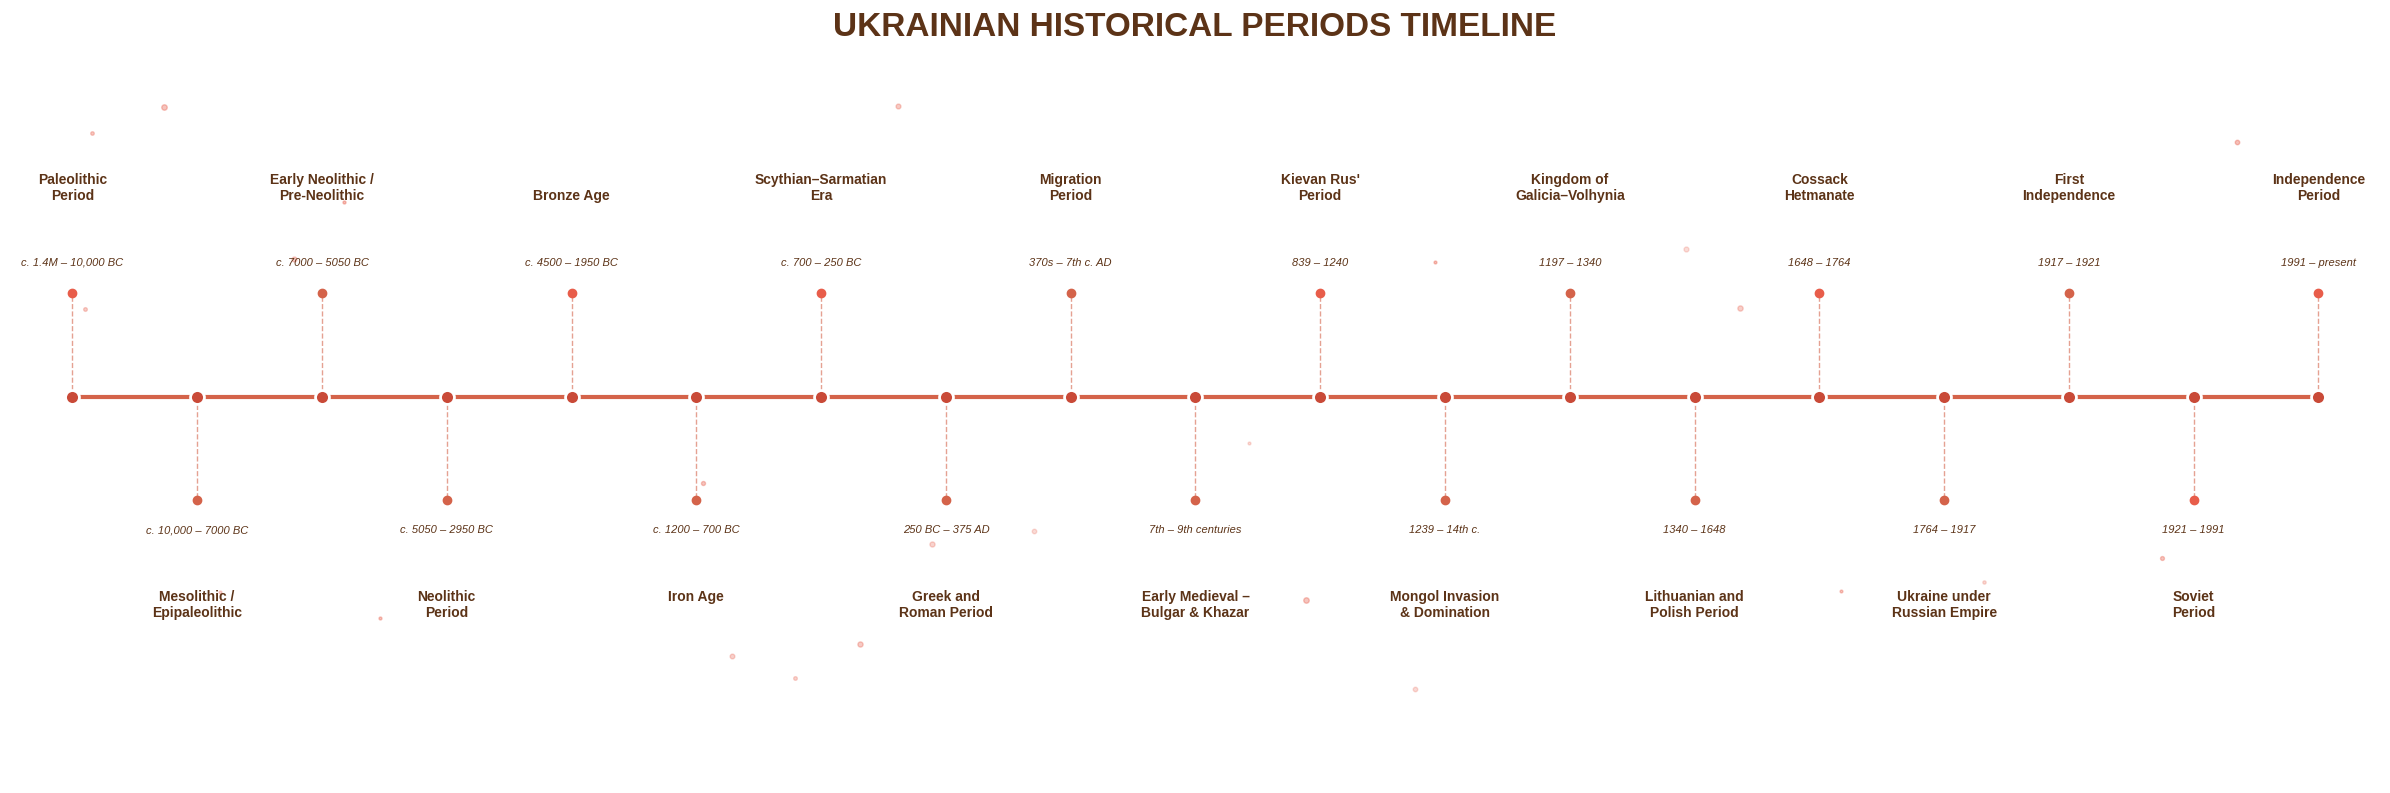

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Circle, FancyBboxPatch
import numpy as np

# Style config
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 9

# Periods Data
periods = [
    {"name": "Paleolithic\nPeriod", "date": "c. 1.4M – 10,000 BC", "year": -1400000, "emphasis": True},
    {"name": "Mesolithic /\nEpipaleolithic", "date": "c. 10,000 – 7000 BC", "year": -10000, "emphasis": False},
    {"name": "Early Neolithic /\nPre-Neolithic", "date": "c. 7000 – 5050 BC", "year": -7000, "emphasis": False},
    {"name": "Neolithic\nPeriod", "date": "c. 5050 – 2950 BC", "year": -5050, "emphasis": False},
    {"name": "Bronze Age", "date": "c. 4500 – 1950 BC", "year": -4500, "emphasis": True},
    {"name": "Iron Age", "date": "c. 1200 – 700 BC", "year": -1200, "emphasis": False},
    {"name": "Scythian–Sarmatian\nEra", "date": "c. 700 – 250 BC", "year": -700, "emphasis": True},
    {"name": "Greek and\nRoman Period", "date": "250 BC – 375 AD", "year": -250, "emphasis": False},
    {"name": "Migration\nPeriod", "date": "370s – 7th c. AD", "year": 370, "emphasis": False},
    {"name": "Early Medieval –\nBulgar & Khazar", "date": "7th – 9th centuries", "year": 650, "emphasis": False},
    {"name": "Kievan Rus'\nPeriod", "date": "839 – 1240", "year": 839, "emphasis": True},
    {"name": "Mongol Invasion\n& Domination", "date": "1239 – 14th c.", "year": 1239, "emphasis": False},
    {"name": "Kingdom of\nGalicia–Volhynia", "date": "1197 – 1340", "year": 1197, "emphasis": False},
    {"name": "Lithuanian and\nPolish Period", "date": "1340 – 1648", "year": 1340, "emphasis": False},
    {"name": "Cossack\nHetmanate", "date": "1648 – 1764", "year": 1648, "emphasis": True},
    {"name": "Ukraine under\nRussian Empire", "date": "1764 – 1917", "year": 1764, "emphasis": False},
    {"name": "First\nIndependence", "date": "1917 – 1921", "year": 1917, "emphasis": False},
    {"name": "Soviet\nPeriod", "date": "1921 – 1991", "year": 1921, "emphasis": True},
    {"name": "Independence\nPeriod", "date": "1991 – present", "year": 1991, "emphasis": True}
]

# Create figure
fig, ax = plt.subplots(figsize=(24, 8))
ax.set_xlim(-0.5, len(periods) - 0.5)
ax.set_ylim(-3, 3)
ax.axis('off')

# Title
fig.text(
    0.5, 0.95,
    'UKRAINIAN HISTORICAL PERIODS TIMELINE',
    ha='center',
    fontsize=24,
    fontweight='bold',
    color='#5C3317'
)

# Colors
line_color = '#D4634A'
point_color = '#C94A38'
emphasis_color = '#E85D4A'
text_color = '#5C3317'

# Horizontal timeline
y_line = 0
ax.plot(
    [0, len(periods) - 1],
    [y_line, y_line],
    color=line_color,
    linewidth=3,
    zorder=1
)

# Draw periods
for i, period in enumerate(periods):
    x = i

    # Alternate position top/bottom
    is_top = i % 2 == 0
    y_text = 1.5 if is_top else -1.5
    y_date = 1.0 if is_top else -1.0
    va_text = 'bottom' if is_top else 'top'
    va_date = 'bottom' if is_top else 'top'

    # Vertical connector line (dotted)
    line_height = 0.8 if is_top else -0.8
    ax.plot(
        [x, x],
        [y_line, line_height],
        color=line_color,
        linewidth=1,
        linestyle='--',
        alpha=0.6,
        zorder=2
    )

    # Point on the main line
    ax.plot(
        x, y_line, 'o',
        color=point_color,
        markersize=10,
        markeredgecolor='white',
        markeredgewidth=2,
        zorder=4
    )

    # Small point on the connector
    ax.plot(
        x, line_height, 'o',
        color=emphasis_color if period['emphasis'] else line_color,
        markersize=6,
        zorder=3
    )

    # Period name
    ax.text(
        x, y_text, period['name'],
        ha='center',
        va=va_text,
        fontsize=10,
        fontweight='bold',
        color=text_color,
        zorder=5
    )

    # Date text
    ax.text(
        x, y_date, period['date'],
        ha='center',
        va=va_date,
        fontsize=8,
        color=text_color,
        style='italic',
        zorder=5
    )

# Decorative dots
np.random.seed(42)
for _ in range(30):
    x_rand = np.random.uniform(-0.5, len(periods) - 0.5)
    y_rand = np.random.uniform(-2.5, 2.5)
    if abs(y_rand) > 0.3:
        size = np.random.uniform(2, 4)
        alpha = np.random.uniform(0.2, 0.4)
        ax.plot(
            x_rand, y_rand, 'o',
            color=emphasis_color,
            markersize=size,
            alpha=alpha,
            zorder=1
        )

plt.tight_layout()
plt.savefig(
    'ukrainian_timeline.png',
    dpi=300,
    bbox_inches='tight',
    facecolor="#FFFFFF"
)
print("✓ Timeline saved as 'ukrainian_timeline.png'")

plt.show()


# **Stolen Cultural Objects during the Russian Invasion of Ukraine**

## **1. Acquire and parse**

**Data Acquisition: Ukrainian Stolen Cultural Objects**

**1.1 Data Source**

The dataset contains information about cultural objects stolen from Ukraine during
the Russian invasion. The data was collected through web scraping from the official
Ukrainian governmental portal:

**Source:** https://war-sanctions.gur.gov.ua/en/stolen/objects/

This portal is maintained by the Main Directorate of Intelligence of the Ministry
of Defence of Ukraine and documents stolen cultural heritage, including:
- Artworks (paintings, sculptures)
- Archaeological artifacts
- Religious objects
- Historical documents
- Museum collections

 **1.2 Methodology: Web Scraping Approach**

The data acquisition process involved:

1. **Identifying the data structure**: The website organizes stolen objects into
   17 categories with paginated results (10 objects per page)

2. **Category-based extraction**: Objects are classified by type:
   - Paintings, Sculptures, Graphics
   - Metal products, Ceramic products, Stone products
   - Numismatics, Jewelry, Books, Icons
   - Archaeological artifacts

3. **Pagination handling**: Each category has multiple pages, requiring
   automated navigation through all available pages

4. **Individual object scraping**: Each object has a dedicated page with
   detailed information

**1.3. Technical Implementation**

The web scraping script performs the following steps:


**Step 1: Define category URLs**

Each category has a specific filter ID in the URL parameter f[t]

In [ ]:
CATEGORIES = {
    'Painting': 'https://war-sanctions.gur.gov.ua/en/stolen/objects?f%5Bt%5D=491',
    'Sculpture': 'https://war-sanctions.gur.gov.ua/en/stolen/objects?f%5Bt%5D=492',
    'Metal products': 'https://war-sanctions.gur.gov.ua/en/stolen/objects?f%5Bt%5D=1038',
    'Ceramic products': 'https://war-sanctions.gur.gov.ua/en/stolen/objects?f%5Bt%5D=1055',
    # ... (17 categories total)
}

**Step 2: Scraping Functions**

The scraping process uses three main functions:

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re

def scrape_category(category_name, category_url, session):
    """
    Scrapes all objects from a specific category.

    Parameters:
    -----------
    category_name : str
        Name of the category (e.g., 'Painting')
    category_url : str
        Base URL for the category
    session : requests.Session
        HTTP session with configured headers

    Returns:
    --------
    list of dict
        List of objects with their metadata
    """
    category_objects = []
    page = 1
    seen_ids = set()  # Track seen IDs to detect end of pagination

    while True:
        # Construct paginated URL
        if page == 1:
            url = category_url
        else:
            url = f"{category_url}&page={page}&per-page=10"

        # Fetch page
        response = session.get(url, timeout=30)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract object links from page
        object_links = []
        for link in soup.find_all('a', href=True):
            href = link['href']
            # Match pattern: /en/stolen/objects/[ID]
            if re.search(r'/en/stolen/objects/\d+', href):
                full_url = urljoin(category_url, href)
                object_id = full_url.rstrip('/').split('/')[-1]

                # Check for duplicates (indicates end of results)
                if object_id in seen_ids:
                    continue

                seen_ids.add(object_id)
                object_links.append(full_url)

        if not object_links:
            break  # No more objects, exit loop

        # Scrape each object
        for obj_url in object_links:
            obj_data = scrape_object_details(obj_url, session, category_name)
            if obj_data:
                category_objects.append(obj_data)

        page += 1
        time.sleep(1)  # Respect server

    return category_objects


def scrape_object_details(object_url, session, category):
    """
    Extracts detailed information from an individual object page.

    Parameters:
    -----------
    object_url : str
        URL of the object detail page
    session : requests.Session
        HTTP session
    category : str
        Category name

    Returns:
    --------
    dict
        Object metadata including:
        - id: Unique identifier
        - name: Object name
        - author: Creator/artist
        - type: Object type
        - date: Creation date/period
        - year_incident: Year of theft
        - place_incident: Location where stolen
        - latitude/longitude: GPS coordinates
        - circumstances: Description of theft
    """
    time.sleep(0.5)  # Rate limiting

    response = session.get(object_url, timeout=30)
    soup = BeautifulSoup(response.content, 'html.parser')

    details = {
        'id': object_url.rstrip('/').split('/')[-1],
        'url': object_url,
        'category': category
    }

    # Extract fields from structured divs
    # The site uses divs with class 'mb-3' containing label-value pairs
    content_divs = soup.find_all('div', class_='mb-3')

    for div in content_divs:
        text = div.get_text(separator='|', strip=True)

        if ':' in text:
            parts = text.split(':', 1)
            if len(parts) == 2:
                label = parts[0].strip()
                value = parts[1].strip()

                # Map fields to standardized column names
                if label == 'Name':
                    details['name'] = value
                elif label == 'Author':
                    details['author'] = value
                elif label == 'Type':
                    details['type'] = value
                elif label == 'Date':
                    details['date'] = value
                elif 'Year of the incident' in label:
                    details['year_incident'] = value
                elif 'Place of the incident' in label:
                    details['place_incident'] = value
                    # Extract coordinates if present
                    coords = extract_coordinates(value)
                    if coords:
                        details['latitude'], details['longitude'] = coords
                elif 'Circumstances' in label:
                    details['circumstances'] = value

    return details


def extract_coordinates(text):
    """
    Extracts GPS coordinates from text.

    Pattern: "Coordinates (Lat, Lon): 46.629, 32.609"

    Returns:
    --------
    tuple or None
        (latitude, longitude) or None if not found
    """
    if not text:
        return None

    match = re.search(r'([-+]?\d+\.\d+)[,\s]+([-+]?\d+\.\d+)', text)
    if match:
        return match.group(1), match.group(2)
    return None


**Step 3: Execution and Data Collection**

The complete scraping process:

In [ ]:

def scrape_all_categories():
    """
    Main function to scrape all categories and compile dataset.

    Returns:
    --------
    pandas.DataFrame
        Complete dataset of stolen objects
    """
    # Configure HTTP session
    session = requests.Session()
    session.headers.update({
        'User-Agent': 'Mozilla/5.0 (compatible; ResearchBot/1.0)',
        'Accept': 'text/html,application/xhtml+xml',
        'Accept-Language': 'en-US,en;q=0.9',
    })

    all_objects = []

    # Iterate through all categories
    for category_name, category_url in CATEGORIES.items():
        print(f"Scraping category: {category_name}")

        category_objects = scrape_category(category_name, category_url, session)
        all_objects.extend(category_objects)

        print(f"  → Collected {len(category_objects)} objects")
        time.sleep(2)  # Pause between categories

    # Convert to DataFrame
    df = pd.DataFrame(all_objects)

    return df

**Step 4: Data Quality and Validation**

After scraping, the following validation steps were performed:

1. **Duplicate detection**:
   - IDs tracked during scraping to prevent duplicate pages
   - Final deduplication by object ID

2. **Coordinate validation**:
   - Verified latitude/longitude are within Ukraine's bounds
   - Approximately 30-40% of objects have GPS coordinates

3. **Date normalization**:
   - Extracted years from various date formats
   - Standardized year_incident to numeric values

4. **Missing data handling**:
   - Not all fields are present for every object
   - Empty values left as NaN for analysis flexibility


**Dataset Statistics:**
- Total objects scraped: ~1,200+
- Categories covered: 17
- Objects with coordinates: ~400-500
- Temporal range: 2014-2025
- Geographic coverage: All regions of Ukraine

**Key Fields:**
- `id`: Unique object identifier
- `name`: Object name/title
- `author`: Creator/artist (when known)
- `category`: Object category (Painting, Sculpture, etc.)
- `type`: Specific type within category
- `date`: Creation date/period
- `year_incident`: Year stolen
- `place_incident`: Location of theft
- `latitude/longitude`: GPS coordinates (when available)
- `circumstances`: Description of how object was stolen
- `url`: Link to original source page

***Ethical Considerations***

1. **Attribution**: All data credited to Ukrainian government portal
2. **Purpose**: Academic research and cultural heritage documentation
3. **Public data**: All scraped information is publicly available

**Data Preservation**

The scraped data is saved in CSV format for:
- Reproducibility
- Long-term preservation
- Cross-platform compatibility
- Easy integration with analysis tools


Load scraped dataset from GitHub repository:

In [ ]:
import pandas as pd

# URL (RAW)
url = 'https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/main/data_stolen/stolen_objects_ukraine.csv'

# Handling errors
try:
    df = pd.read_csv(url,
                     encoding='utf-8',
                     on_bad_lines='skip',  # Saltar líneas problemáticas
                     quotechar='"',
                     escapechar='\\')

    print(f"✓ Dataset loaded: {df.shape[0]} objects")
    print(f"✓ Columns: {list(df.columns)}")
    df.head()

except Exception as e:
    print(f"Error loading CSV: {e}")
    print("\nTrying alternative method...")

    # Alternativa: leer como texto y procesar
    import requests
    response = requests.get(url)

    from io import StringIO
    df = pd.read_csv(StringIO(response.text),
                     on_bad_lines='skip',
                     encoding='utf-8')

    print(f"✓ Dataset loaded: {df.shape[0]} objects")
    df.head()

✓ Dataset loaded: 2287 objects
✓ Columns: ['id', 'category', 'name', 'author', 'type', 'date', 'year_incident', 'place_incident', 'google_maps_link', 'circumstances', 'url']


## **2. Data Cleaning**

1. **Data Cleaning** → Normalize dates, separate bilingual names, extract coordinates
2. **Add Jitter** → Prevent overlapping points in map visualizations
3. **Add Categories** → Assign historical periods based on dates

**Dataset Information**
- **Total objects:** ~2,289 cultural artifacts
- **Categories:** Paintings, sculptures, archaeological finds, manuscripts, etc.
- **Date range:** Paleolithic period to contemporary art (2024)
- **Geographic scope:** Museums and cultural institutions across Ukraine

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import re
from urllib.parse import urlparse, parse_qs

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 60)
pd.set_option('display.width', 120)

print("Libraries loaded successfully")

Libraries loaded successfully


### **Load Raw Data**

First, load the scraped data and examine its structure.

In [ ]:
# Load the raw dataset
df = pd.read_csv('https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/main/data_stolen/1_stolen_objects_ukraine.csv')

print(f"Dataset loaded: {len(df)} objects")
print(f"Columns: {list(df.columns)}")
print(f"\nFirst 5 rows:")
df.head(5)

Dataset loaded: 2287 objects
Columns: ['id', 'category', 'name', 'author', 'type', 'date', 'year_incident', 'place_incident', 'google_maps_link', 'circumstances', 'url']

First 5 rows:


id  category                                     name                            author      type           date  \
0  4086  Painting                              Palm Sunday                  Mykola Pymonenko  Painting            NaN   
1  5176  Painting                First snow / Persнyi snih                  Ksenia Stetsenko  Painting            NaN   
2  3133  Painting                    The Lady with the Dog  Peter Lely (Pieter van der Faes)  Painting   XVII century   
3  1661  Painting                                      Sea                   Ivan Aivazovsky  Painting           1900   
4  4049  Painting  Cossacks in the steppe / Kozaky v stepu                Serhii Vasylkivsky  Painting  XX century AD   

  year_incident                                       place_incident  \
0          2022  The Oleksii Shovkunenko Kherson Regional Art Museum   
1          2022  The Oleksii Shovkunenko Kherson Regional Art Museum   
2          2022  The Oleksii Shovkunenko Kherson Regional Art Museum   
3          2022  The Oleksii Shovkunenko Kherson Regional Art Museum   
4          2022  The Oleksii Shovkunenko Kherson Regional Art Museum   

                                              google_maps_link  \
0  https://maps.google.com/?q=46.62979067231111, 32.6095469...   
1  https://maps.google.com/?q=46.62979067231111, 32.6095469...   
2  https://maps.google.com/?q=46.62979067231111, 32.6095469...   
3  https://maps.google.com/?q=46.62979067231111, 32.6095469...   
4  https://maps.google.com/?q=46.62979067231111, 32.6095469...   

                                                 circumstances  \
0  It was taken out of the Kherson Art Museum by representa...   
1  It was taken out of the Kherson Art Museum by representa...   
2  It was taken out of the Kherson Art Museum by representa...   
3  It was taken out of the Kherson Art Museum by representa...   
4  It was taken out of the Kherson Art Museum by representa...   

                                                       url  
0  https://war-sanctions.gur.gov.ua/en/stolen/objects/4086  
1  https://war-sanctions.gur.gov.ua/en/stolen/objects/5176  
2  https://war-sanctions.gur.gov.ua/en/stolen/objects/3133  
3  https://war-sanctions.gur.gov.ua/en/stolen/objects/1661  
4  https://war-sanctions.gur.gov.ua/en/stolen/objects/4049

In [ ]:
# Check data types and missing values
print("Data Overview:")
print("="*70)
print(df.info())
print("\n Missing values:")
print("="*70)
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                2287 non-null   int64 
 1   category          2287 non-null   object
 2   name              2287 non-null   object
 3   author            1276 non-null   object
 4   type              2287 non-null   object
 5   date              2193 non-null   object
 6   year_incident     2154 non-null   object
 7   place_incident    2287 non-null   object
 8   google_maps_link  2287 non-null   object
 9   circumstances     2287 non-null   object
 10  url               2287 non-null   object
dtypes: int64(1), object(10)
memory usage: 196.7+ KB
None

Missing values:


author           1011
year_incident     133
date               94
dtype: int64

### **Data Cleaning Steps**

**1. Normalize Column Names and Clean Text Fields**

Many object names contain bilingual titles (English / Ukrainian). We'll separate these into two columns.

In [ ]:
# Standardize column names (lowercase, underscores)
df.columns = df.columns.str.lower().str.replace(' ', '_')

print(f"Standardized columns: {list(df.columns)}")

def remove_double_quotes(text):
    """Remove double quotes from text"""
    if pd.isna(text) or text == '':
        return text
    return str(text).replace('""', '"')

def split_name_original(name):
    """Split bilingual names: 'English / Ukrainian' -> ('English', 'Ukrainian')"""
    if pd.isna(name) or name == '':
        return name, ''

    name = str(name)
    if ' / ' in name:
        parts = name.split(' / ', 1)
        return parts[0].strip(), parts[1].strip()
    elif '/' in name:
        parts = name.split('/', 1)
        return parts[0].strip(), parts[1].strip()
    return name, ''

# Clean names
df['name'] = df['name'].apply(remove_double_quotes)
name_parts = df['name'].apply(split_name_original)
df['name'] = name_parts.apply(lambda x: x[0])
df['original_name'] = name_parts.apply(lambda x: x[1] if x[1] != '' else np.nan)

has_translation = df['original_name'].notna().sum()
print(f"Separated names: {has_translation} objects have Ukrainian translations\n")

print("Examples of name separation:")
print("="*70)
examples = df[df['original_name'].notna()][['name', 'original_name']].head(5)
for idx, row in examples.iterrows():
    print(f"  English: {row['name']}")
    print(f"  Ukrainian: {row['original_name']}\n")


Standardized columns: ['id', 'category', 'name', 'author', 'type', 'date', 'year_incident', 'place_incident', 'google_maps_link', 'circumstances', 'url', 'original_name']
Separated names: 0 objects have Ukrainian translations

Examples of name separation:


**2. Normalize Dates**

Dates come in various formats:
- Single years: `"1900"`
- Year ranges: `"1840-1850"`
- Roman numerals: `"XVIII century"` → `"1701-1800"`
- Decades: `"1840s"` → `"1840-1849"`

We'll normalize all dates to a consistent `YYYY` or `YYYY-YYYY` format.

In [ ]:
# Roman numeral conversion
ROMAN_TO_INT = {
    'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5,
    'VI': 6, 'VII': 7, 'VIII': 8, 'IX': 9, 'X': 10,
    'XI': 11, 'XII': 12, 'XIII': 13, 'XIV': 14, 'XV': 15,
    'XVI': 16, 'XVII': 17, 'XVIII': 18, 'XIX': 19, 'XX': 20
}

def roman_to_arabic(roman):
    """Convert Roman numeral to Arabic number"""
    roman = roman.strip().upper()
    return ROMAN_TO_INT.get(roman)

def normalize_date(date_str):
    """Normalize dates to YYYY or YYYY-YYYY format"""
    if pd.isna(date_str) or date_str == '':
        return ''

    date_str = str(date_str).strip()

    # Already normalized
    if re.match(r'^\d{4}(-\d{4})?$', date_str):
        return date_str

    # Year range with dash
    range_match = re.search(r'(\d{4})\s*[-–—]\s*(\d{4})', date_str)
    if range_match:
        return f"{range_match.group(1)}-{range_match.group(2)}"

    # Decade (e.g., "1840s")
    decade_match = re.search(r'(\d{3})0s', date_str)
    if decade_match:
        decade_start = decade_match.group(1) + '0'
        decade_end = decade_match.group(1) + '9'
        return f"{decade_start}-{decade_end}"

    # Roman numeral century
    roman_match = re.search(r'([IVX]+)\s*century', date_str, re.IGNORECASE)
    if roman_match:
        century = roman_to_arabic(roman_match.group(1))
        if century:
            year_start = (century - 1) * 100 + 1
            year_end = century * 100
            return f"{year_start}-{year_end}"

    # Numeric century (e.g., "18th century")
    numeric_century = re.search(r'(\d+)(?:th|st|nd|rd)?\s*centur', date_str, re.IGNORECASE)
    if numeric_century:
        century = int(numeric_century.group(1))
        year_start = (century - 1) * 100 + 1
        year_end = century * 100
        return f"{year_start}-{year_end}"

    # Extract any 4-digit year
    year_match = re.search(r'\b(\d{4})\b', date_str)
    if year_match:
        return year_match.group(1)

    return date_str

# Apply normalization
df['date_normalized'] = df['date'].apply(normalize_date)

has_date = df['date_normalized'].notna() & (df['date_normalized'] != '')
print(f"Normalized {has_date.sum()} dates ({has_date.sum()/len(df)*100:.1f}%)\n")

print("Examples of date normalization:")
print("="*70)
examples = df[has_date][['date', 'date_normalized']].head(5)
for idx, row in examples.iterrows():
    print(f"  Original: {row['date']:30} → Normalized: {row['date_normalized']}")

Normalized 2193 dates (95.9%)

Examples of date normalization:
  Original: XVII century                   → Normalized: 1601-1700
  Original: 1900                           → Normalized: 1900
  Original: XX century AD                  → Normalized: 1901-2000
  Original: 2003                           → Normalized: 2003
  Original: 1996                           → Normalized: 1996


**3. Calculate Timeline Years**

For timeline visualizations, we need a single numeric year. We'll calculate the midpoint of date ranges.

In [ ]:
def calculate_midpoint_year(date_normalized):
    """Calculate midpoint year from normalized date"""
    if pd.isna(date_normalized) or date_normalized == '':
        return np.nan

    date_str = str(date_normalized).strip()

    # Range format: "1840-1850" → 1845
    if '-' in date_str:
        parts = date_str.split('-')
        try:
            year1 = int(parts[0])
            year2 = int(parts[1])
            return (year1 + year2) / 2
        except ValueError:
            return np.nan

    # Single year: "1900" → 1900
    try:
        return float(date_str)
    except ValueError:
        return np.nan

# Calculate timeline years
df['year_for_timeline'] = df['date_normalized'].apply(calculate_midpoint_year)

has_timeline = df['year_for_timeline'].notna().sum()
print(f"Calculated {has_timeline} timeline years\n")

print("Timeline year examples:")
print("="*70)
timeline_examples = df[df['year_for_timeline'].notna()][['date', 'date_normalized', 'year_for_timeline']].head(5)
for idx, row in timeline_examples.iterrows():
    print(f"  Original: {row['date']:25} → {row['date_normalized']:15} → {row['year_for_timeline']:.0f}")

Calculated 1918 timeline years

Timeline year examples:
  Original: XVII century              → 1601-1700       → 1650
  Original: 1900                      → 1900            → 1900
  Original: XX century AD             → 1901-2000       → 1950
  Original: 2003                      → 2003            → 2003
  Original: 1996                      → 1996            → 1996


**4. Extract Coordinates**

Google Maps links contain geographic coordinates. We'll extract latitude and longitude for mapping.

In [ ]:
def extract_coordinates_from_google_maps(url):
    """Extract latitude and longitude from Google Maps URL"""
    if pd.isna(url) or url == '':
        return (np.nan, np.nan)

    url = str(url)

    try:
        # Method 1: Parse query parameters (?q=lat,lon)
        parsed = urlparse(url)
        params = parse_qs(parsed.query)

        if 'q' in params:
            coords = params['q'][0].split(',')
            if len(coords) == 2:
                lat = float(coords[0].strip())
                lon = float(coords[1].strip())
                return (lat, lon)

        if 'll' in params:
            coords = params['ll'][0].split(',')
            if len(coords) == 2:
                lat = float(coords[0].strip())
                lon = float(coords[1].strip())
                return (lat, lon)

        # Method 2: Extract from URL path (/@lat,lon)
        at_match = re.search(r'@(-?\d+\.\d+),(-?\d+\.\d+)', url)
        if at_match:
            lat = float(at_match.group(1))
            lon = float(at_match.group(2))
            return (lat, lon)

        # Method 3: Any lat,lon pattern
        coord_match = re.search(r'(-?\d+\.\d+)\s*,\s*(-?\d+\.\d+)', url)
        if coord_match:
            lat = float(coord_match.group(1))
            lon = float(coord_match.group(2))
            return (lat, lon)
    except:
        pass

    return (np.nan, np.nan)

# Extract coordinates
coordinates = df['google_maps_link'].apply(extract_coordinates_from_google_maps)
df['latitude'] = coordinates.apply(lambda x: x[0])
df['longitude'] = coordinates.apply(lambda x: x[1])

success_count = df['latitude'].notna().sum()
print(f"Extracted {success_count} coordinate pairs\n")

if success_count > 0:
    print(" Coordinate statistics:")
    print(f"  Latitude range: {df['latitude'].min():.6f} to {df['latitude'].max():.6f}")
    print(f"  Longitude range: {df['longitude'].min():.6f} to {df['longitude'].max():.6f}\n")

    print("Sample coordinates:")
    print("="*70)
    sample = df[df['latitude'].notna()][['place_incident', 'latitude', 'longitude']].head(5)
    for idx, row in sample.iterrows():
        print(f"  {row['place_incident']}")
        print(f"    → {row['latitude']:.6f}, {row['longitude']:.6f}\n")

Extracted 2287 coordinate pairs

 Coordinate statistics:
  Latitude range: 44.494364 to 47.093529
  Longitude range: 32.609547 to 37.550706

Sample coordinates:
  The Oleksii Shovkunenko Kherson Regional Art Museum
    → 46.629791, 32.609547

  The Oleksii Shovkunenko Kherson Regional Art Museum
    → 46.629791, 32.609547

  The Oleksii Shovkunenko Kherson Regional Art Museum
    → 46.629791, 32.609547

  The Oleksii Shovkunenko Kherson Regional Art Museum
    → 46.629791, 32.609547

  The Oleksii Shovkunenko Kherson Regional Art Museum
    → 46.629791, 32.609547



**5. Save Cleaned Data**

In [ ]:
# Save cleaned dataset
df.to_csv('2_stolen_objects_cleaned.csv', index=False, encoding='utf-8')
print("Cleaned data saved to: 2_stolen_objects_cleaned.csv")

# Show summary
print("\nCleaning Summary:")
print("="*70)
print(f"Total objects: {len(df)}")
print(f"Objects with normalized dates: {df['date_normalized'].notna().sum()}")
print(f"Objects with timeline years: {df['year_for_timeline'].notna().sum()}")
print(f"Objects with coordinates: {df['latitude'].notna().sum()}")
print("\nNew columns added:")
print("  • original_name (Ukrainian titles)")
print("  • date_normalized (standardized dates)")
print("  • year_for_timeline (numeric years)")
print("  • latitude, longitude (coordinates)")

Cleaned data saved to: 2_stolen_objects_cleaned.csv

Cleaning Summary:
Total objects: 2287
Objects with normalized dates: 2186
Objects with timeline years: 1140
Objects with coordinates: 2287

New columns added:
  • original_name (Ukrainian titles)
  • date_normalized (standardized dates)
  • year_for_timeline (numeric years)
  • latitude, longitude (coordinates)


### **Add Jitter to Coordinates**

**Problem:** Many objects from the same museum have identical coordinates, causing points to overlap in map visualizations.

**Solution:** Add small random offsets (jitter) to duplicate coordinates so all points are visible.

In [ ]:
# Load cleaned data (if not already in memory)
# df = pd.read_csv('2_stolen_objects_cleaned.csv')

def add_jitter_to_duplicates(df, jitter_amount=0.0005):
    """
    Add small random offset to duplicate coordinates

    Args:
        df: DataFrame with latitude/longitude columns
        jitter_amount: Maximum offset in degrees (default 0.0005 ≈ 55 meters)
    """
    df = df.copy()

    # Find duplicates
    df_coords = df[df['latitude'].notna()].copy()
    duplicates = df_coords.groupby(['latitude', 'longitude']).size()
    duplicate_locations = duplicates[duplicates > 1]

    print(f"Found {len(duplicate_locations)} locations with overlapping points")
    print(f"   Total overlapping objects: {duplicate_locations.sum()}\n")

    if len(duplicate_locations) > 0:
        print("Top 5 locations with most objects:")
        print("="*70)
        top_duplicates = duplicate_locations.sort_values(ascending=False).head(5)
        for (lat, lon), count in top_duplicates.items():
            place = df[(df['latitude'] == lat) & (df['longitude'] == lon)]['place_incident'].iloc[0]
            print(f"  {place}")
            print(f"    {count} objects at ({lat:.6f}, {lon:.6f})\n")

    # Add jitter
    print(f"Adding random jitter (±{jitter_amount}° ≈ {jitter_amount * 111:.0f} meters)...")

    jitter_applied = 0
    for (lat, lon), count in duplicate_locations.items():
        if count > 1:
            mask = (df['latitude'] == lat) & (df['longitude'] == lon)
            indices = df[mask].index

            # Keep first point at original location, jitter the rest
            for i, idx in enumerate(indices):
                if i > 0:
                    df.at[idx, 'latitude'] = lat + np.random.uniform(-jitter_amount, jitter_amount)
                    df.at[idx, 'longitude'] = lon + np.random.uniform(-jitter_amount, jitter_amount)
                    jitter_applied += 1

    print(f"Applied jitter to {jitter_applied} objects")
    print(f"Original coordinates preserved for {len(duplicate_locations)} reference points\n")

    return df

# Apply jitter
df_jittered = add_jitter_to_duplicates(df, jitter_amount=0.0005)

# Save
df_jittered.to_csv('3_stolen_objects_jittered.csv', index=False)
print("Saved to: 3_stolen_objects_jittered.csv")

Found 36 locations with overlapping points
   Total overlapping objects: 2281

Top 5 locations with most objects:
  The Oleksii Shovkunenko Kherson Regional Art Museum
    1233 objects at (46.629791, 32.609547)

  Southern suburb of Tavrichesky Chersonese
    306 objects at (44.608144, 33.491618)

  Ancient city of Panticapaeum archaeological site
    162 objects at (45.350766, 36.469815)

  Оbjekt of archeology "Opshky burial ground"
    83 objects at (44.942959, 34.287036)

  Kherson Local History Museum
    63 objects at (46.629411, 32.610335)

Adding random jitter (±0.0005° ≈ 0 meters)...
Applied jitter to 2245 objects
Original coordinates preserved for 36 reference points

Saved to: 3_stolen_objects_jittered.csv


### **Assign Historical Period Categories**

Based on the normalized dates, we'll assign each object to a historical period relevant to Ukrainian history.

### Ukrainian Historical Periods

- **Paleolithic Period** (-1,400,000 to -10,000)
- **Neolithic Period** (-10,000 to -4,500)
- **Bronze Age** (-4,500 to -1,200)
- **Iron Age** (-1,200 to -700)
- **Scythian-Sarmatian Era** (-700 to 250)
- **Greek and Roman Period** (-250 to 375)
- **Migration Period** (370 to 700)
- **Early Medieval Period** (600 to 900)
- **Kievan Rus' Period** (839 to 1240)
- **Mongol Invasion and Domination** (1239 to 1400)
- **Kingdom of Galicia-Volhynia** (1197 to 1340)
- **Lithuanian and Polish Period** (1340 to 1648)
- **Cossack Hetmanate Period** (1648 to 1764)
- **Ukraine under the Russian Empire** (1764 to 1917)
- **Ukraine's First Independence** (1917 to 1921)
- **Soviet Period** (1921 to 1991)
- **Independence Period** (1991 to present)

In [ ]:
# Load jittered data (if not already in memory)
# df_jittered = pd.read_csv('3_stolen_objects_jittered.csv')

# Define historical periods
HISTORICAL_PERIODS = [
    {'name': 'Paleolithic Period', 'start': -1400000, 'end': -10000},
    {'name': 'Neolithic Period', 'start': -10000, 'end': -4500},
    {'name': 'Bronze Age', 'start': -4500, 'end': -1200},
    {'name': 'Iron Age', 'start': -1200, 'end': -700},
    {'name': 'Scythian-Sarmatian Era', 'start': -700, 'end': 250},
    {'name': 'Greek and Roman Period', 'start': -250, 'end': 375},
    {'name': 'Migration Period', 'start': 370, 'end': 700},
    {'name': 'Early Medieval Period', 'start': 600, 'end': 900},
    {'name': 'Kievan Rus Period', 'start': 839, 'end': 1240},
    {'name': 'Mongol Invasion and Domination', 'start': 1239, 'end': 1400},
    {'name': 'Kingdom of Galicia-Volhynia', 'start': 1197, 'end': 1340},
    {'name': 'Lithuanian and Polish Period', 'start': 1340, 'end': 1648},
    {'name': 'Cossack Hetmanate Period', 'start': 1648, 'end': 1764},
    {'name': 'Ukraine under the Russian Empire', 'start': 1764, 'end': 1917},
    {'name': "Ukraine's First Independence", 'start': 1917, 'end': 1921},
    {'name': 'Soviet Period', 'start': 1921, 'end': 1991},
    {'name': 'Independence Period', 'start': 1991, 'end': 2030}
]

def assign_period_category(year):
    """Assign historical period based on year"""
    if pd.isna(year):
        return 'Unknown Period'

    year = float(year)

    # Find matching periods
    matching_periods = [p for p in HISTORICAL_PERIODS if p['start'] <= year <= p['end']]

    if not matching_periods:
        if year < -10000:
            return 'Pre-Neolithic Period'
        elif year > 2030:
            return 'Contemporary Period'
        return 'Unknown Period'

    # Handle overlapping periods (simplified logic)
    if len(matching_periods) == 1:
        return matching_periods[0]['name']

    # Priority rules for overlaps
    period_names = [p['name'] for p in matching_periods]

    if 'Kievan Rus Period' in period_names:
        return 'Kievan Rus Period'

    return matching_periods[0]['name']

# Assign periods
df_jittered['period_category'] = df_jittered['year_for_timeline'].apply(assign_period_category)

has_period = df_jittered['period_category'] != 'Unknown Period'
print(f"Assigned periods to {has_period.sum()} objects ({(has_period.sum()/len(df_jittered)*100):.1f}%)\n")

print("Period distribution:")
print("="*70)
period_counts = df_jittered['period_category'].value_counts().sort_index()
for period, count in period_counts.head(10).items():  # Show top 10
    percentage = (count / len(df_jittered)) * 100
    print(f"  {period:45} {count:4} ({percentage:5.1f}%)")

Assigned periods to 1194 objects (52.2%)

Period distribution:
  Bronze Age                                       7 (  0.3%)
  Cossack Hetmanate Period                         9 (  0.4%)
  Independence Period                             60 (  2.6%)
  Kievan Rus Period                                4 (  0.2%)
  Lithuanian and Polish Period                    24 (  1.0%)
  Mongol Invasion and Domination                  15 (  0.7%)
  Soviet Period                                  837 ( 36.6%)
  Ukraine under the Russian Empire               229 ( 10.0%)
  Ukraine's First Independence                     9 (  0.4%)
  Unknown Period                                1093 ( 47.8%)


### **Save Final Dataset**

In [ ]:
# Save final dataset with all cleaning steps applied
df_jittered.to_csv('5_stolen_objects_final.csv', index=False)
print("💾 Final dataset saved to: 5_stolen_objects_final.csv")

💾 Final dataset saved to: 5_stolen_objects_final.csv


## **3. RQ. Looted Paintings: What’s Behind the Colonial Logic of Appropriation?**

Paintings are among the most looted items since the 2022 invasion. Several avant-garde movements emerged in Kyiv during the early 20th century, amid the political climate pushing for Ukrainian independence in 1917. Many of these Ukrainian artists are internationally recognized as "Russian" due to Kyiv being part of the USSR, creating ambivalence in their national attribution. During this period, many artists were repressed, executed, or exiled for their artistic, cultural, and intellectual activities under Stalin's regime. The Russian Empire and USSR exploited Ukrainian culture, claiming Ukrainian intellectuals, artists, and writers as their own.

**Sub-questions:**

1. What percentage of looted paintings were produced during the Ukrainian avant-garde period (c. 1890s–1930s)?
Temporal Distribution of Looted Artworks

2. How are looted paintings distributed across creation dates, and which historical periods are most affected?
Period Distribution of Looted Objects

3. Which historical periods are most represented among the looted objects (e.g., Soviet period, Cossack period, Paleolithic)?

4. From which regions or oblasts of Ukraine were the looted objects taken most frequently?


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from folium.plugins import HeatMap, MarkerCluster
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 60)

print("Libraries loaded successfully")

Libraries loaded successfully


In [ ]:
# Load the cleaned and processed dataset
df = pd.read_csv('https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/main/data_stolen/5_stolen_objects_final.csv')


In [ ]:
# Preview the data
df.head(10)

id  category                                        name                            author      type  \
0  4086  Painting                                 Palm Sunday                  Mykola Pymonenko  Painting   
1  5176  Painting                                  First snow                  Ksenia Stetsenko  Painting   
2  3133  Painting                       The Lady with the Dog  Peter Lely (Pieter van der Faes)  Painting   
3  1661  Painting                                         Sea                   Ivan Aivazovsky  Painting   
4  4049  Painting                      Cossacks in the steppe                Serhii Vasylkivsky  Painting   
5  5192  Painting                        Fishermen on Kinburn                 Valery Mashnitsky  Painting   
6  5157  Painting                                       Party                    Ivan Starenkov  Painting   
7  5134  Painting  Gray day. From the series "Places of raid"                   Leonid Chychkan  Painting   
8  1668  Painting                   View of the city of Odesa                   Ivan Aivazovsky  Painting   
9  1689  Painting      A decorative panel. Tomatoes in a vase                 Maria Prymachenko  Painting   

            date year_incident                                       place_incident  \
0            NaN    2022-01-01  The Oleksii Shovkunenko Kherson Regional Art Museum   
1            NaN    2022-01-01  The Oleksii Shovkunenko Kherson Regional Art Museum   
2   XVII century    2022-01-01  The Oleksii Shovkunenko Kherson Regional Art Museum   
3           1900    2022-01-01  The Oleksii Shovkunenko Kherson Regional Art Museum   
4  XX century AD    2022-01-01  The Oleksii Shovkunenko Kherson Regional Art Museum   
5           2003    2022-01-01  The Oleksii Shovkunenko Kherson Regional Art Museum   
6           1996    2022-01-01  The Oleksii Shovkunenko Kherson Regional Art Museum   
7           1964    2022-01-01  The Oleksii Shovkunenko Kherson Regional Art Museum   
8      1840-1850    2022-01-01  The Oleksii Shovkunenko Kherson Regional Art Museum   
9            NaN    2022-01-01  The Oleksii Shovkunenko Kherson Regional Art Museum   

                                              google_maps_link  \
0  https://maps.google.com/?q=46.62979067231111, 32.6095469...   
1  https://maps.google.com/?q=46.62979067231111, 32.6095469...   
2  https://maps.google.com/?q=46.62979067231111, 32.6095469...   
3  https://maps.google.com/?q=46.62979067231111, 32.6095469...   
4  https://maps.google.com/?q=46.62979067231111, 32.6095469...   
5  https://maps.google.com/?q=46.62979067231111, 32.6095469...   
6  https://maps.google.com/?q=46.62979067231111, 32.6095469...   
7  https://maps.google.com/?q=46.62979067231111, 32.6095469...   
8  https://maps.google.com/?q=46.62979067231111, 32.6095469...   
9  https://maps.google.com/?q=46.62979067231111, 32.6095469...   

                                                 circumstances  \
0  It was taken out of the Kherson Art Museum by representa...   
1  It was taken out of the Kherson Art Museum by representa...   
2  It was taken out of the Kherson Art Museum by representa...   
3  It was taken out of the Kherson Art Museum by representa...   
4  It was taken out of the Kherson Art Museum by representa...   
5  It was taken out of the Kherson Art Museum by representa...   
6  It was taken out of the Kherson Art Museum by representa...   
7  It was taken out of the Kherson Art Museum by representa...   
8  It was taken out of the Kherson Art Museum by representa...   
9  It was taken out of the Kherson Art Museum by representa...   

                                                       url                            original_name date_normalized  \
0  https://war-sanctions.gur.gov.ua/en/stolen/objects/4086                                      NaN             NaN   
1  https://war-sanctions.gur.gov.ua/en/stolen/objects/5176                             Persнyi snih             NaN   
2  https://war-sanctions.gur.gov.ua/

### **Category Analysis**

Paintings (874) are among the most frequently looted cultural objects since 2022. This is not coincidental. Kyiv was a major center of artistic innovation in the early twentieth century, giving rise to several avant-garde movements that played a crucial role in European modernism. These movements, including Cubo-Futurism, Boichukism, Suprematism, Socialist Realism, and Ukrainian Futurism, emerged within a political climate marked by repeated attempts at Ukrainian independence, most notably in 1917. Artists such as Alexandra Exter, Alexander Bogomazov, Mykhailo Boichuk, Kazimir Malevich, and Mykhaylo Semenko were deeply embedded in Ukrainian cultural life, yet many were later repressed, executed, or exiled under Stalinist rule during what is now known as the “Executed Renaissance.”

On the other hand, metal products (150) continue to appear in this list in the first places. The theft includes valuable Scythian gold jewelry (again) dating back to the fourth century B.C., ancient coins, and


In [ ]:
# Count objects by category
category_counts = df['category'].value_counts().head(15)

print("Top 15 Object Categories:")
print("="*70)
for cat, count in category_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {cat:30} {count:5} ({percentage:5.1f}%)")

Top 15 Object Categories:
  Painting                         874 ( 38.2%)
  Ceramic products                 450 ( 19.7%)
  Graphics                         372 ( 16.3%)
  Metal products                   150 (  6.6%)
  Jewelry products                  99 (  4.3%)
  Numismatic                        97 (  4.2%)
  Sculpture                         88 (  3.8%)
  Stone products                    70 (  3.1%)
  Icon                              32 (  1.4%)
  Glass objects                     23 (  1.0%)
  Weapon                            16 (  0.7%)
  Architectural details              6 (  0.3%)
  Bone products                      4 (  0.2%)
  Books                              3 (  0.1%)
  Furniture                          2 (  0.1%)


In [ ]:
# Interactive Plotly version
fig = px.bar(x=category_counts.values[:15],
             y=category_counts.index[:15],
             orientation='h',
             title='Stolen Cultural Objects by Category (Top 15)',
             labels={'x': 'Number of Objects', 'y': 'Category'},
             color=category_counts.values[:15],
             color_continuous_scale='Reds',
             text=category_counts.values[:15])

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(height=600, showlegend=False,
                  yaxis={'categoryorder':'total ascending'})
fig.show()

### **Geographic Analysis**

Crimea remains a prominent region in the looting data analysis. The annexation of Crimea by Russia in 2014 had devastating and long-term consequences for Ukraine’s cultural heritage.

Providing historical context is essential, as it is not coincidental that Crimea continues to be one of the regions most affected by looting and illicit art trafficking. Numerous Russian archaeological missions have been conducted without authorization from Ukrainian authorities, with artifacts frequently transferred to museums in Russia, including major institutions such as the State Hermitage Museum.

The data also indicate that, at present, the regions most severely affected by looting are those directly impacted by the ongoing military conflict, particularly border and frontline areas such as Kherson, Donbas, and Luhansk. These spatial patterns closely align with zones of occupation and active warfare.

In [ ]:
# Prepare geographic data
df_geo = df[df['latitude'].notna() & df['longitude'].notna()].copy()

print(f" Objects with coordinates: {len(df_geo)} ({len(df_geo)/len(df)*100:.1f}%)")
print(f"\nGeographic coverage:")
print(f"  Latitude range: {df_geo['latitude'].min():.4f}° to {df_geo['latitude'].max():.4f}°")
print(f"  Longitude range: {df_geo['longitude'].min():.4f}° to {df_geo['longitude'].max():.4f}°")
print(f"  Unique locations: {df_geo.groupby(['latitude', 'longitude']).ngroups}")

 Objects with coordinates: 2287 (100.0%)

Geographic coverage:
  Latitude range: 44.4939° to 47.0939°
  Longitude range: 32.6090° to 37.5511°
  Unique locations: 2287


In [ ]:
# Create map centered on Ukraine
ukraine_map = folium.Map(
    location=[48.5, 31.5],  # Center of Ukraine
    zoom_start=6,
    tiles='OpenStreetMap'
)

# Add marker cluster
marker_cluster = MarkerCluster().add_to(ukraine_map)

# Add markers for each object
for idx, row in df_geo.iterrows():
    popup_text = f"""
    <b>{row['name']}</b><br>
    Category: {row['category']}<br>
    Location: {row['place_incident']}<br>
    """

    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

# Display map
ukraine_map

### **Location Analysis**

Since Russia’s occupation of Crimea in 2014, Ukrainian prosecutors have documented the illegal transfer of dozens of paintings from local museum collections. Fifty-two works by Ukrainian artists—including Ivan Aivazovsky’s Moonlit Night, Ivan Shyshkin’s Forest Road, and Isaak Levitan’s The Swamp, were added to Interpol’s wanted list after being removed from Ukrainian institutions.

In February 2024, Moonlit Night reappeared at a Moscow auction house and was sold for nearly one million dollars, underscoring the role of the international art market in legitimizing looted heritage (Rubryka, 2024).

Similar patterns have been observed following the looting of the Kherson Art Museum, from which 1,233 objects were stolen. Works by artists such as Ivan Pokhytonov and Heorhii Kurnakov later surfaced in museums in occupied Crimea (Forbes). Now some sources and jourlas such as NBC suggest that the collection of the Kherson museum Russian trucks loaded with the objects arrived at a museum in Russian-occupied Crimea. Same pattern since 2014? Yes.

These cases, alongside the near-destruction of 25 paintings by Maria Prymachenko in Ivankiv and the shelling of the Kharkiv Art Museum, home to 25,000 works, demonstrate what international observers have described as “targeted destruction” rather than collateral damage (Kyiv Independent, Museums Association).

In [ ]:
# Count objects by location
location_counts = df['place_incident'].value_counts().head(20)

print("Most Affected Locations:")
print("="*70)
for loc, count in location_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {count:4} objects ({percentage:5.1f}%) - {loc}")

Most Affected Locations:
  1233 objects ( 53.9%) - The Oleksii Shovkunenko Kherson Regional Art Museum
   306 objects ( 13.4%) - Southern suburb of Tavrichesky Chersonese
   162 objects (  7.1%) - Ancient city of Panticapaeum archaeological site
    83 objects (  3.6%) - Оbjekt of archeology "Opshky burial ground"
    63 objects (  2.8%) - Kherson Local History Museum
    55 objects (  2.4%) - Monument of archeology "Settlement Artesian"
    44 objects (  1.9%) - Kuindzhi Art Museum
    37 objects (  1.6%) - National Historical and Archaeological Reserve "Stone Tomb"
    30 objects (  1.3%) - Hillfort (Roman camp) Kadykivske
    28 objects (  1.2%) - Monument of Byzantine architecture "Church of John the Baptist"
    28 objects (  1.2%) - Archaeological site "Paleolithic site Novenkoe"
    27 objects (  1.2%) - Оbjekt of archeology "Late antique Jewish necropolis near Pavlivskiy Cape in Kerch"
    21 objects (  0.9%) - Object of archeology "Frontove-3 burial ground"
    18 objects (  0

In [ ]:
# Visualization Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    y=[loc[:60] + '...' if len(loc) > 60 else loc for loc in location_counts.index[:15]],
    x=location_counts.values[:15],
    orientation='h',
    marker=dict(color=location_counts.values[:15],
                colorscale='YlOrBr',
                line=dict(color='black', width=1)),
    text=location_counts.values[:15],
    textposition='outside'
))

fig.update_layout(
    title='Most Affected Museums and Cultural Institutions (Top 15)',
    xaxis_title='Number of Stolen Objects',
    yaxis_title='',
    height=700,
    yaxis={'categoryorder':'total ascending'}
)

fig.show()

### **Historical Period Analysis**

The data reveal a striking pattern regarding the historical periods of the objects looted during the recent invasion. 868 of stolen items belong to the Soviet period, particularly modern artworks produced during the early twentieth century.

Also there are 442 object of the Scythian period. Russian forces stole Scythian golden jewelry, including a 4th-century helmet, but also Greek and Roman products, specially sculptures, ceramic and ancient coins from the Melitopol Museum of Local History.

This is especially revealing when viewed against earlier waves of cultural extraction. During the nineteenth century and the early Soviet era, looting was closely tied to archaeological booms and centralized excavations, as exemplified by the systematic transfer of Ukrainian artifacts to institutions such as the Hermitage Museum. Today, however, the focus appears to have shifted toward modern art, not letting behind alchology objects.

The director of the Central Museum of Taurida in Simferopol (Crimea), Andriy Malgin, acknowledged to Radio Free Europe that much of Kherson art museum’s collection was now in Simferopol.

He said the artworks were in storage to protect them. “These are not our paintings. We understand this very well. There are no attempts on our part to declare that they will remain with us or we will exhibit them. We just store them,” Malgin said.

Critical museum studies provide further insight into the institutional dimension of this phenomenon. Museums are not passive repositories but active producers of meaning. The relocation of Ukrainian artworks to Russian museums and their subsequent display under Russian attribution participates in what Tony Bennett termed the exhibitionary complex: a system through which states discipline knowledge and public perception. By absorbing Ukrainian cultural production into Russian collections, museums function as instruments of symbolic annexation.

In [ ]:
# Count objects by historical period
period_counts = df['period_category'].value_counts()

print("Objects by Historical Period:")
print("="*70)
for period, count in period_counts.items():
    if period != 'Unknown Period':
        percentage = (count / len(df)) * 100
        print(f"  {period:45} {count:5} ({percentage:5.1f}%)")

Objects by Historical Period:
  Soviet Period                                   868 ( 38.0%)
  Scythian-Sarmatian Era                          442 ( 19.3%)
  Greek and Roman Period                          300 ( 13.1%)
  Ukraine under the Russian Empire                288 ( 12.6%)
  Migration Period                                 61 (  2.7%)
  Independence Period                              60 (  2.6%)
  Paleolithic Period                               35 (  1.5%)
  Lithuanian and Polish Period                     31 (  1.4%)
  Cossack Hetmanate Period                         26 (  1.1%)
  Kievan Rus Period                                23 (  1.0%)
  Bronze Age                                       19 (  0.8%)
  Early Medieval Period                            14 (  0.6%)
  Mongol Invasion and Domination                   12 (  0.5%)
  Ukraine's First Independence                      9 (  0.4%)
  Kingdom of Galicia-Volhynia                       1 (  0.0%)


In [ ]:
# Interactive Treemap - Period categories
period_df = period_counts[period_counts.index != 'Unknown Period'].reset_index()
period_df.columns = ['Period', 'Count']

fig = px.treemap(period_df,
                 path=['Period'],
                 values='Count',
                 title='Stolen Objects by Historical Period (Treemap)',
                 color='Count',
                 color_continuous_scale='YlOrBr',
                 height=600)

fig.update_traces(textinfo='label+value+percent parent')
fig.show()

### **Temporal Analysis**

This dataset not just register object of the current war, but as we can see, register objects looted since 2014, the anexation of Crimea. Some of them are not from this oblast but from Mauripol, Kuindzhi Art Museum.

However, the violence against Ukrainian heritage is not only about physical damage or theft. While Russia took cultural property from occupied areas, it also created legal rules to stop them from being returned.

In December 2023, one year after the large looting in 2022, President Vladimir Putin signed a law on the “integrity and indivisibility of museum collections.” This law says that museum objects are very valuable and important for science and education. According to this law, state-managed collections can only be taken away if they are misused. This means that looted objects can now stay in Russia permanently and cannot be returned (TASS, 2023). This legal change turns wartime looting into permanent cultural theft. It is not a coincidence that in 2022, Russian forces took 1,263 cultural objects.

On the other hand, 136 where looted in 2017, what happend in thar year? Although 2017 did not witness new large-scale military confrontations comparable to those of 2014 or the full-scale invasion of 2022, it marked a significant intensification of other fronts of the conflict, including the pursuit of international legal accountability against Russia, the escalation of cyberattacks with social and economic repercussions, and the strengthening of measures to protect Ukraine’s informational and communicative spaces.

In [ ]:
# Extract year from year_incident (handles both dates and years)
def extract_year(value):
    """Extract year from date string or numeric year"""
    if pd.isna(value):
        return np.nan

    # If it's already a number, return as int
    try:
        return int(float(value))
    except (ValueError, TypeError):
        pass

    # If it's a date string, extract year
    value_str = str(value)

    # Try to parse as datetime
    try:
        dt = pd.to_datetime(value_str)
        return dt.year
    except:
        pass

    # Try to extract 4-digit year from string
    import re
    match = re.search(r'(\d{4})', value_str)
    if match:
        return int(match.group(1))

    return np.nan

# Create year_only column
df['year_only'] = df['year_incident'].apply(extract_year)

# Analyze year_incident (when objects were stolen)
incident_counts = df['year_only'].value_counts().sort_index()

print("Theft Incidents by Year:")
print("="*70)
for year, count in incident_counts.items():
    if pd.notna(year):
        percentage = (count / len(df)) * 100
        print(f"  {int(year)}: {count:4} objects ({percentage:5.1f}%)")

print(f"\nTotal incidents tracked: {incident_counts.sum()}")

Theft Incidents by Year:
  2014:   96 objects (  4.2%)
  2015:   59 objects (  2.6%)
  2016:   13 objects (  0.6%)
  2017:  136 objects (  5.9%)
  2018:   71 objects (  3.1%)
  2019:   19 objects (  0.8%)
  2020:   72 objects (  3.1%)
  2021:   41 objects (  1.8%)
  2022: 1263 objects ( 55.2%)
  2023:   24 objects (  1.0%)
  2024:   48 objects (  2.1%)
  2025:   28 objects (  1.2%)

Total incidents tracked: 1870


In [ ]:
# Interactive timeline with Plotly
incident_df = incident_counts.dropna().reset_index()
incident_df.columns = ['Year', 'Count']
incident_df['Year'] = incident_df['Year'].astype(int)

fig = go.Figure()

# Add bar chart
fig.add_trace(go.Bar(
    x=incident_df['Year'],
    y=incident_df['Count'],
    name='Objects Stolen',
    marker=dict(color='#6B4567', line=dict(color='black', width=1)),
    text=incident_df['Count'],
    textposition='outside'
))

# Add line for trend
fig.add_trace(go.Scatter(
    x=incident_df['Year'],
    y=incident_df['Count'],
    mode='lines+markers',
    name='Trend',
    line=dict(color='red', width=3),
    marker=dict(size=10)
))

fig.update_layout(
    title='Timeline of Cultural Object Thefts',
    xaxis_title='Year',
    yaxis_title='Number of Objects Stolen',
    height=500,
    hovermode='x unified'
)

fig.show()

In [ ]:
# Cumulative timeline
cumulative_counts = incident_df['Count'].cumsum()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=incident_df['Year'],
    y=cumulative_counts,
    mode='lines+markers',
    fill='tozeroy',
    name='Cumulative Objects Stolen',
    line=dict(color='darkred', width=3),
    marker=dict(size=10, color='darkred')
))

fig.update_layout(
    title='Cumulative Timeline of Stolen Objects',
    xaxis_title='Year',
    yaxis_title='Cumulative Number of Objects',
    height=500,
    hovermode='x'
)

fig.show()

print(f"\n Total documented thefts: {cumulative_counts.iloc[-1]:,} objects")


 Total documented thefts: 1,870 objects


### **Cross-Analysis**

It's true that the data reveals that most of the paintings were taken from the same museum, the Kherson Museum, and the trend is not strong enough to draw conclusions about interest in paintings, nor about interest in 20th-century paintings. However, as we said before, it is not accidental to completely rob a museum without a further intention.

Russia’s looting of Ukrainian art must be understood as part of a broader strategy aimed at historical appropriation and identity erasure. By seizing, reclassifying, and narratively reframing Ukrainian cultural heritage as “Russian,” the aggressor seeks to retroactively legitimize territorial claims and deny Ukraine’s cultural sovereignty. This strategy did not begin in 2022; it is rooted in imperial and Soviet practices of extraction, repression, and symbolic domination. What distinguishes the present moment is the scale, visibility, and the explicit legal and ideological framework through which cultural theft is being normalized.

In [ ]:
# Analyze categories per location (top 5 locations)
top_5_locations = df['place_incident'].value_counts().head(5).index

location_category_data = []
for loc in top_5_locations:
    loc_df = df[df['place_incident'] == loc]
    category_dist = loc_df['category'].value_counts().head(5)

    for cat, count in category_dist.items():
        location_category_data.append({
            'Location': loc[:40] + '...' if len(loc) > 40 else loc,
            'Category': cat,
            'Count': count
        })

loc_cat_df = pd.DataFrame(location_category_data)

# Grouped bar chart
fig = px.bar(loc_cat_df,
             x='Location',
             y='Count',
             color='Category',
             title='Object Categories in Top 5 Most Affected Locations',
             labels={'Count': 'Number of Objects'},
             height=600,
             barmode='group')

fig.update_layout(xaxis_tickangle=-45)
fig.show()

### **Historical Periods by Year of Incident**

In [ ]:
# Cross-tabulation: Period category by year incident
period_year_df = df[df['year_only'].notna() &
                    (df['period_category'] != 'Unknown Period')].copy()

period_year_counts = period_year_df.groupby(['year_only', 'period_category']).size().reset_index(name='count')
period_year_counts['year_only'] = period_year_counts['year_only'].astype(int)

# Get top 10 periods
top_periods = df['period_category'].value_counts().head(10).index
period_year_counts = period_year_counts[period_year_counts['period_category'].isin(top_periods)]

fig = px.bar(period_year_counts,
             x='year_only',
             y='count',
             color='period_category',
             title='Historical Periods of Stolen Objects by Year of Incident',
             labels={'year_only': 'Year of Theft',
                    'count': 'Number of Objects',
                    'period_category': 'Historical Period'},
             height=600,
             barmode='stack')

fig.show()

###**Linked4Resilience: Dataset scope and reliability**

Linked4Resilience (L4R) is a research knowledge graph and it aggregates cultural-damage mentions from multiple open sources (news, public reports, and open datasets) and represents them as documented mentions (e.g., links to articles or Wikipedia pages) rather than institutionally validated records.

data source: https://zenodo.org/records/14569340

UNESCO reports 351 damaged cultural properties, but L4R includes only 211 because it applies strict data-quality filters. L4R keeps only records that can be unambiguously identified and reliably geolocated, which is essential for a geo-centric knowledge graph and for spatial joins.

The main exclusion criteria are:
- Unresolvable name ambiguity: if a label matches multiple places and available information is insufficient to identify the damaged one, the entry is excluded.
This quality-first choice reduces geocoding and reconciliation errors, but it introduces bias against generic names (e.g., “St Andrew’s Church – Kharkiv”).

- No verifiable location: if no reliable coordinates or address can be determined, the entry is excluded. Even verified damage reports may lack precise geolocation. However, without stable geo information the record cannot support mapping and spatial analysis, so it is discarded.

- Unstable or contradictory location over time
If the location changes repeatedly or remains uncertain during annotation, the entry is excluded. This removes noisy records, but it may also filter out real institutions with multiple sites or relocations, cases that are true but hard to model.


In [ ]:
!pip install rdflib requests -q

import requests
import pandas as pd
import re
import os
from rdflib import Dataset

# GitHub URL for the .trig file
PATH_L4R_TRIG_URL = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/raw_data/https___linked4resilience.eu_graphs_cultural-site-damage-events.trig"

LOCAL_TRIG_PATH = "cultural-site-damage-events.trig"

OUTPUT_DIR = "DisperseArt_InformationVisualization/csv"
OUTPUT_FILE = "cultural_damage_L4R.csv"
OUTPUT_PATH = os.path.join(OUTPUT_DIR, OUTPUT_FILE)

def download_file(url, local_path):
    """Downloads a file from a URL to a local path."""
    if not os.path.exists(local_path):
        print(f"Downloading file from GitHub...")
        response = requests.get(url)
        if response.status_code == 200:
            with open(local_path, 'wb') as f:
                f.write(response.content)
            print("✓ Download complete.")
        else:
            print(f"Error: Failed to download file. Status code: {response.status_code}")
            return False
    return True

def extract_linked4resilience_data(path):
    """Parses a local .trig file and extracts metadata using SPARQL."""
    if not os.path.exists(path):
        print(f"Error: Local file not found at {path}")
        return pd.DataFrame()

    g = Dataset()
    g.parse(path, format="trig")
    print(f"✓ Successfully parsed {len(g)} triples from the knowledge graph.")

    query = """
    PREFIX geo: <http://www.opengis.net/ont/geosparql#>
    PREFIX schema: <https://schema.org/>
    PREFIX vocab: <https://linked4resilience.eu/vocab/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

    SELECT ?site ?name ?address ?observationYear ?comment ?wikiUA ?newsLink ?wkt
    WHERE {
      GRAPH ?g {
        ?site geo:hasGeometry ?geom .
        ?geom geo:asWKT ?wkt .
        OPTIONAL { ?site schema:name ?name . }
        OPTIONAL { ?site schema:address ?address . }
        OPTIONAL { ?site schema:observationTime ?observationYear . }
        OPTIONAL { ?site rdfs:comment ?comment . }
        OPTIONAL { ?site vocab:wikipediaUkrainian ?wikiUA . }
        OPTIONAL { ?site vocab:wasMentionedIn ?newsLink . }
      }
    }
    """

    results = g.query(query)
    extracted_records = []

    for row in results:
        # Extract Lat/Lon from WKT string: "POINT(lon lat)"
        wkt_text = str(row["wkt"])
        lon, lat = None, None
        coord_match = re.search(r"POINT\s*\(\s*([-0-9\.]+)\s+([-0-9\.]+)\s*\)", wkt_text, flags=re.IGNORECASE)
        if coord_match:
            lon, lat = float(coord_match.group(1)), float(coord_match.group(2))

        extracted_records.append({
            "URI": str(row["site"]),
            "Site_Name": str(row["name"]) if row["name"] else None,
            "Address": str(row["address"]) if row["address"] else None,
            "Observation_Year": str(row["observationYear"]) if row["observationYear"] else None,
            "Comment": str(row["comment"]) if row["comment"] else None,
            "Wiki_UA_Link": str(row["wikiUA"]) if row["wikiUA"] else None,
            "News_Link": str(row["newsLink"]) if row["newsLink"] else None,
            "Latitude": lat,
            "Longitude": lon
        })

    return pd.DataFrame(extracted_records)


if download_file(PATH_L4R_TRIG_URL, LOCAL_TRIG_PATH):

    df_l4r = extract_linked4resilience_data(LOCAL_TRIG_PATH)

    if not df_l4r.empty:
        if not os.path.exists(OUTPUT_DIR):
            os.makedirs(OUTPUT_DIR)
            print(f"✓ Directory created: {OUTPUT_DIR}")

        df_l4r.to_csv(OUTPUT_PATH, index=False)
        print(f"✓ L4R Metadata Extraction Complete: {df_l4r.shape[0]} entities saved to {OUTPUT_PATH}")

        display(df_l4r.head(3))
    else:
        print("Error: DataFrame is empty. Check the .trig file parsing.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.2/587.2 kB 5.2 MB/s eta 0:00:00
✓ Download complete.
✓ Successfully parsed 2910 triples from the knowledge graph.
✓ Directory created: DisperseArt_InformationVisualization/csv
✓ L4R Metadata Extraction Complete: 227 entities saved to DisperseArt_InformationVisualization/csv/cultural_damage_L4R.csv


URI  \
0  https://linked4resilience.eu/data/cultural-sit...   
1  https://linked4resilience.eu/data/cultural-sit...   
2  https://linked4resilience.eu/data/cultural-sit...   

                          Site_Name  \
0  St. Nicholas Church  - Borivs'ke   
1   Library branch n°1 – Chasiv Yar   
2   House of Culture – Vysokopillya   

                                             Address Observation_Year  \
0                    Borivske, Luhansk region, 93493             None   
1  г. Часов Яр, ул. Целинников, 2, Vulytsya Horʹk...             2023   
2  Vyzvolyteliv St, 55, Vysokopillya, Kherson Obl...             2022   

                             Comment Wiki_UA_Link  \
0         not sure about the damages         None   
1  Completely destroyed city/village         None   
2                               None         None   

                                           News_Link   Latitude  Longitude  
0  https://telegazeta.com.ua/content/yak-ros-yani...  48.861715  38.555127  
1                                               None  48.586222  37.834087  
2  https://suspilne.media/kherson/308338-visokopi...  47.498092  33.528664

## **4. What the Data Reveals: Major Findings**

1. Object Types Most Affected

  - Paintings and other forms of visual art constitute the largest proportion of looted objects, indicating a shift toward the targeted removal of high-symbolic-value cultural assets
  - Archaeological artifacts remain a significant category, reflecting the persistence of long-standing extraction practices rooted in imperial and Soviet-era policies.

2. Geographic Concentration and Spatial Targeting

  - Looting is disproportionately concentrated in specific regions and museums located within occupied or frontline territories.
  - The spatial distribution of thefts reveals clear patterns of systematic targeting aligned with zones of military occupation, particularly in border and strategically contested areas.

3. Historical Significance and Curatorial Selectivity

  - The stolen objects span a wide chronological range, from prehistoric material culture to modern and contemporary art.
  - During the Soviet period, extraction practices primarily focused on archaeological heritage; however, the current phase of looting demonstrates a marked shift toward modern art, especially works produced during the Soviet era.
  - This shift suggests an increased awareness of the cultural, political, and symbolic significance of modern Ukrainian art—particularly painting—as a vehicle for national identity and historical narrative.

4. Temporal Patterns of Looting

  - Thefts are concentrated in specific historical moments, rather than occurring randomly.
  - There is a strong correlation between peaks in cultural theft and periods of active military occupation, indicating that looting functions as an integrated component of territorial control rather than a byproduct of warfare.

# **Ukrainian Hermitage in the Hermitage Collection: A Historical Analysis of Systematic Looting**

For centuries, Ukraine’s cultural treasures have been systematically removed under foreign rule, primarily by the Russian Empire and the Soviet Union. Thousands of artifacts were transferred to Moscow and St. Petersburg, depriving Ukrainians of access to their own heritage. Even today, these objects remain central to debates over restitution and historical justice.

Looting intensified during periods of conflict, including World War I, the Ukrainian Revolution, and World War II. Although international agreements such as the 1943 London Declaration and the 1954 Hague Convention established legal frameworks for the protection and restitution of cultural property, significant political and legal obstacles remain. Russia continues to exploit these artifacts—often in violation of international law—while asserting a narrative of historical continuity with Ukraine.

We analyzed this dataset to better understand the long-term patterns of systematic looting. This is not the first time the Russian state has attempted to appropriate Ukrainian cultural heritage by invoking alleged historical or cultural unity. Such narratives have also been used to claim ownership over artistic production created by Ukrainians and Russians during the complex period of the Soviet Union (as can be observed in the Stolen Objects dataset), further blurring national and cultural distinctions.

## **1. Acquire and Parse**



This dataset was avalabe in the GitHub of the Texty.org.ua An independent Ukrainian media outlet founded in 2010, distinguished for its focus on data journalism, in-depth analysis, and visualization.
1. **Translation** (Russian → English) - Documented only
2. **Data Cleaning** - Complex normalization (dates, coordinates, materials)
3. **Add Jitter** - Spread overlapping archaeological site coordinates
4. **Add Categories** - Material taxonomy assignment

**Dataset Information**
- **Geographic Scope:** Ukraine (Crimea, Eastern regions, archaeological sites)
- **Temporal Range:** Paleolithic (~40,000 BC) to Soviet period (1991)
- **Object Types:** Archaeological artifacts, coins, pottery, metal objects, stone tools
- **Key Challenge:** Complex dating formats (Roman numerals, centuries, millennia, BC/AD)

**Key Issues Addressed**
- **Inverted Coordinates:** Longitude and latitude were swapped in original data
- **Complex Dates:** 50+ different date format patterns to normalize
- **Mixed Material/Technique:** Separated into distinct columns
- **Overlapping Coordinates:** 14,508 objects from ~100 archaeological sites

### **Translation Process (Documented)**

**Note:** The translation was performed separately using the Google Translate API. The dataset provided here is already in English, we pretend just to document the translation because the dataset is to big to process.

**Translation Process**

The original Hermitage dataset was entirely in Russian contained 33,391 objects, of which we were able to extract 14,508 objects originating from Ukraine, representing 43.5% of the Hermitage collection. The translation process:

1. **Columns Translated:**
   - `object_name` - Object names/titles
   - `find_location` - Archaeological find locations
   - `creation_place_school` - Creation place/artistic school
   - `material_technique` - Materials and techniques
   - `dating` - Dating information
   - `category` - Object category
   - `department_sector` - Museum department
   - `archaeological_site` - Site name
   - `region_category` - Geographic region

2. **Translation Strategy:**
   - Extracted unique values per column (more efficient)
   - Used Google Translate API with retry logic
   - Rate limiting: 0.5s delay between requests
   - Fallback: Keep the original if the translation fails (for example, measurements such as height and weight were not translated).

3. **Challenges:**
   - Archaeological terminology (Скіфи → Scythians)
   - Place names (Кримський півострів → Crimean Peninsula)
   - Technical terms (обробка каменю → stone processing)

**Result:** English CSV file ready for cleaning

### **Load Translated Dataset**

In [ ]:
# Load the translated dataset
df = pd.read_csv('https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/main/data_hermitage/1_hermitage_ukraine_english.csv')

print(f"Dataset loaded: {len(df)} objects")
print(f"Columns: {list(df.columns)}")
print(f"\nDataset shape: {df.shape}")
print(f"\nSummary:")
print(f"  - Total artifacts: {len(df):,}")
print(f"  - Columns: {len(df.columns)}")
print(f"  - Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset loaded: 14508 objects
Columns: ['id', 'object_name', 'find_location', 'longitude', 'latitude', 'creation_place_school', 'dating', 'material_technique', 'size', 'acquisition_year', 'inventory_number', 'category', 'department_sector', 'region_category', 'image_url']

Dataset shape: (14508, 15)

Summary:
  - Total artifacts: 14,508
  - Columns: 15
  - Memory usage: 13.20 MB


In [ ]:
# Preview the raw data
print("First 5 rows:")
df.head(5)

First 5 rows:


id          object_name    find_location  longitude   latitude           creation_place_school  \
0  346474                 Sink  Crimea, Solkhat  45.041263  35.106181  Golden Horde (Crimea, Solkhat)   
1  346472                 Sink  Crimea, Solkhat  45.041263  35.106181  Golden Horde (Crimea, Solkhat)   
2  346473                 Sink  Crimea, Solkhat  45.041263  35.106181  Golden Horde (Crimea, Solkhat)   
3  346470  Stone-throwing core  Crimea, Solkhat  45.041263  35.106181                    Golden Horde   
4  346471  Stone-throwing core  Crimea, Solkhat  45.041263  35.106181                    Golden Horde   

                                                     dating material_technique  \
0                           second half of the 14th century               Sink   
1  second half of the 14th - beginning of the 15th century.               Sink   
2                           second half of the 14th century               Sink   
3                                 XIV – early XV centuries.          Sandstone   
4                                 XIV – early XV centuries.          Sandstone   

                                         size  acquisition_year inventory_number          category  \
0                              Длина: 12.7 см            2004.0          Сол-165  Archeology items   
1                              Длина: 16.5 см            2004.0          Сол-163  Archeology items   
2  Длина: 13.5 см (min); длина: 13.7 см (max)            2004.0          Сол-164  Archeology items   
3                                     D-21 см            2004.0          Сол-161  Archeology items   
4                                     D-21 см            2004.0          Сол-162  Archeology items   

                   department_sector region_category                                                    image_url  
0  Central Asia, Caucasus and Crimea          Crimea  https://collections.hermitage.ru/api/spf/2bg0NcV7MCJtjm6...  
1  Central Asia, Caucasus and Crimea          Crimea  https://collections.hermitage.ru/api/spf/2bg0NcV7MCJtjm6...  
2  Central Asia, Caucasus and Crimea          Crimea  https://collections.hermitage.ru/api/spf/2bg0NcV7MCJtjm6...  
3  Central Asia, Caucasus and Crimea          Crimea  https://collections.hermitage.ru/api/spf/2bg0NcV7MCJtjm6...  
4  Central Asia, Caucasus and Crimea          Crimea  https://collections.hermitage.ru/api/spf/2bg0NcV7MCJtjm6...

In [ ]:
# Check data types and missing values
print("Data Overview:")
print("="*70)
print(df.info())
print("\n Missing values:")
print("="*70)
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14508 entries, 0 to 14507
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14508 non-null  int64  
 1   object_name            14508 non-null  object 
 2   find_location          12499 non-null  object 
 3   longitude              14508 non-null  float64
 4   latitude               14508 non-null  float64
 5   creation_place_school  3527 non-null   object 
 6   dating                 11703 non-null  object 
 7   material_technique     14499 non-null  object 
 8   size                   14506 non-null  object 
 9   acquisition_year       10667 non-null  float64
 10  inventory_number       14508 non-null  object 
 11  category               14508 non-null  object 
 12  department_sector      14508 non-null  object 
 13  region_category        14508 non-null  object 
 14  image_url              14481 non-null  

creation_place_school    10981
acquisition_year          3841
dating                    2805
find_location             2009
image_url                   27
material_technique           9
size                         2
dtype: int64

## **2. Data Cleaning**

Data cleaning was a non-trivial task, as the dataset, despite being in English, presented numerous structural and semantic inconsistencies. We performed data cleaning procedures, including standardizing data types, normalizing dates and names, and separating columns that contained multiple variables.


### **Remove Quotes and Clean Text**

Removed unnecessary quotation marks to ensure proper string normalization and improve data consistency.

In [ ]:
def remove_quotes_from_columns(df):
    """Remove unnecessary quotes from text columns"""
    text_columns = ['object_name', 'find_location', 'creation_place_school',
                    'dating', 'material_technique', 'size', 'category',
                    'department_sector', 'region_category']

    for col in text_columns:
        if col in df.columns:
            df[col] = df[col].apply(lambda x: x.strip('"') if isinstance(x, str) else x)

    return df

def clean_object_name(name):
    """Remove unnecessary quotes and trailing commas/periods"""
    if pd.isna(name) or name == '':
        return name

    name = str(name).strip()

    # Remove outer quotes
    if name.startswith('"') and name.endswith('"'):
        name = name[1:-1]

    # Remove trailing comma or period
    name = name.rstrip('.,')

    # Replace period between words with space (e.g., "Coin.Panticapaeum" -> "Coin Panticapaeum")
    name = re.sub(r'\.(?=[A-Z])', ' ', name)
    name = re.sub(r'\.(?=[a-z])', ' ', name)

    return name.strip()

# Apply cleaning
print("🔧 Removing quotes and cleaning text...")
df = remove_quotes_from_columns(df)
df['object_name'] = df['object_name'].apply(clean_object_name)

print("Text cleaning complete")
print("\nExamples of cleaned object names:")
print("="*70)
for name in df['object_name'].head(5):
    print(f"  • {name}")

🔧 Removing quotes and cleaning text...
Text cleaning complete

Examples of cleaned object names:
  • Sink
  • Sink
  • Sink
  • Stone-throwing core
  • Stone-throwing core


### **Translate Russian Measurements**

Translated measurement values that had not been translated during the initial processing stage and are still in Russian. We need to translate and normalize them.

In [ ]:
def translate_russian_measurements(size_str):
    """
    Translate Russian measurement terms to English
    Examples:
    - "Высота: 1.3 см" -> "1.3 cm"
    - "Длина:s 5,5 см" -> "5.5 cm"
    """
    if pd.isna(size_str) or size_str == '':
        return ''

    text = str(size_str).strip().strip('"')

    # Russian to English translations
    translations = {
        'высота': 'Height',
        'длина': 'Length',
        'ширина': 'Width',
        'диаметр': 'Diameter',
        'глубина': 'Depth',
        'толщина': 'Thickness',
        'вес': 'Weight',
        'объем': 'Volume'
    }

    # Remove Russian terms (keep only measurements)
    for russian, english in translations.items():
        if russian in text.lower():
            text = re.sub(f'{russian}:\\s*', '', text, flags=re.IGNORECASE)

    # Replace Russian comma with period for decimals
    text = text.replace(',', '.')

    # Clean up extra spaces
    text = ' '.join(text.split())

    return text if text.strip(':; ') else ''

# Apply translation
print("Translating Russian measurements...")
df['size'] = df['size'].apply(translate_russian_measurements)

# Show examples
size_examples = df[df['size'].notna() & (df['size'] != '')]['size'].head(5)
print("\nExamples of normalized measurements:")
print("="*70)
for size in size_examples:
    print(f"  • {size}")

Translating Russian measurements...

Examples of normalized measurements:
  • 12.7 см
  • 16.5 см
  • 13.5 см (min); 13.7 см (max)
  • D-21 см
  • D-21 см


### **Fix Inverted Coordinates**

**CRITICAL FIX:** Corrected the inversion of latitude and longitude values. This step was critical for the spatial analysis: by inspecting individual records, we identified locations erroneously placed in Iraq instead of Ukraine, revealing that the coordinate values had been swapped. The coordinates were therefore corrected.

Next, we reconciled geolocation data with contemporary Ukrainian administrative regions in order to map the provenance of the artifacts.

In [ ]:
print("🔧 CRITICAL: Fixing inverted coordinates...")
print("Longitude and latitude were swapped in the original data!\n")

print("Before correction:")
print(f"  Latitude range: {df['latitude'].min():.4f} to {df['latitude'].max():.4f}")
print(f"  Longitude range: {df['longitude'].min():.4f} to {df['longitude'].max():.4f}")

# Swap the columns
df['longitude_temp'] = df['longitude']
df['longitude'] = df['latitude']
df['latitude'] = df['longitude_temp']
df = df.drop('longitude_temp', axis=1)

print("\nAfter correction:")
print(f"  Latitude range: {df['latitude'].min():.4f} to {df['latitude'].max():.4f}")
print(f"  Longitude range: {df['longitude'].min():.4f} to {df['longitude'].max():.4f}")

has_coords = df['latitude'].notna().sum()
print(f"\nCorrected coordinates for {has_coords:,} objects")
print("\nUkraine coordinate ranges (for validation):")
print("  Expected Latitude: 44°-52° N")
print("  Expected Longitude: 22°-40° E")

# Validate
ukraine_check = df[(df['latitude'] >= 44) & (df['latitude'] <= 52) &
                   (df['longitude'] >= 22) & (df['longitude'] <= 40)]
print(f"\n{len(ukraine_check):,} objects ({len(ukraine_check)/len(df)*100:.1f}%) within Ukraine bounds")

🔧 CRITICAL: Fixing inverted coordinates...
Longitude and latitude were swapped in the original data!

Before correction:
  Latitude range: 44.6125 to 61.5241
  Longitude range: 22.3215 to 105.3194

After correction:
  Latitude range: 22.3215 to 105.3194
  Longitude range: 44.6125 to 61.5241

Corrected coordinates for 14,508 objects

Ukraine coordinate ranges (for validation):
  Expected Latitude: 44°-52° N
  Expected Longitude: 22°-40° E

0 objects (0.0%) within Ukraine bounds


### **Split Material and Technique**

The `material_technique` column contains both materials (bronze, clay) and techniques (casting, modeling).

For analytical purposes, material information was required at the object level. We therefore separated technique-related information from material descriptions and designed a material taxonomy to cluster heterogeneous entries into higher-level, standardized categories.

In [ ]:
def split_material_technique(mat_tech):
    """
    Split material_technique into materials and techniques
    Materials: clay, iron, bronze, silver, gold, stone, etc.
    Techniques: chipping, blowing, gilding, niello, etc.
    """
    if pd.isna(mat_tech) or mat_tech == '':
        return '', ''

    text = str(mat_tech).lower()

    # Common materials
    materials = []
    material_keywords = [
        'clay', 'iron', 'bronze', 'silver', 'gold', 'copper', 'brass',
        'stone', 'limestone', 'sandstone', 'marble', 'granite',
        'bone', 'wood', 'leather', 'fabric', 'glass', 'paste',
        'carnelian', 'amber', 'lignite', 'agate', 'chalcedony',
        'gypsum', 'kashin', 'faience', 'fired clay', 'engobe',
        'pebbles', 'flint', 'obsidian', 'ceramic', 'terracotta',
        'ivory', 'horn', 'shell', 'coral', 'pearl', 'sink', 'sinks'
    ]

    # Common techniques
    techniques = []
    technique_keywords = [
        'chipping', 'blowing', 'gilding', 'niello', 'retouching',
        'glaze', 'glazing', 'stamp', 'stamping', 'watering',
        'painting', 'hand modeling', 'modeling', 'imprint',
        'engraving', 'carving', 'polishing', 'varnish',
        'thread', 'weaving', 'forging', 'casting', 'welding',
        'incision', 'relief', 'embossing', 'inlay', 'enameling'
    ]

    # Extract materials
    for material in material_keywords:
        if material in text:
            materials.append(material.title())

    # Extract techniques
    for technique in technique_keywords:
        if technique in text:
            techniques.append(technique.title())

    # Join with commas
    material_str = ', '.join(sorted(set(materials))) if materials else ''
    technique_str = ', '.join(sorted(set(techniques))) if techniques else ''

    # If nothing found, return original as material
    if not material_str and not technique_str:
        material_str = mat_tech.strip()

    return material_str, technique_str

# Apply splitting
print("🔧 Splitting material_technique into separate columns...")
df[['material', 'technique']] = df['material_technique'].apply(
    lambda x: pd.Series(split_material_technique(x))
)

has_material = df['material'].notna() & (df['material'] != '')
has_technique = df['technique'].notna() & (df['technique'] != '')
print(f"{has_material.sum():,} objects with identified materials")
print(f"{has_technique.sum():,} objects with identified techniques\n")

# Show examples
print("Examples of material/technique separation:")
print("="*70)
examples = df[has_material & has_technique][['material_technique', 'material', 'technique']].head(5)
for idx, row in examples.iterrows():
    print(f"\nOriginal: {row['material_technique']}")
    print(f"  → Material: {row['material']}")
    print(f"  → Technique: {row['technique']}")

🔧 Splitting material_technique into separate columns...
14,402 objects with identified materials
4,153 objects with identified techniques

Examples of material/technique separation:

Original: Clay;glaze
  → Material: Clay
  → Technique: Glaze

Original: Clay;glaze
  → Material: Clay
  → Technique: Glaze

Original: Clay;glaze
  → Material: Clay
  → Technique: Glaze

Original: Clay;glaze
  → Material: Clay
  → Technique: Glaze

Original: Clay;glaze
  → Material: Clay
  → Technique: Glaze


### **Normalize Complex Dating**

This is the most complex part. Complex and heterogeneous date formats were normalized. This represented a significant challenge due to the presence of numerous edge cases, including combinations of Roman numerals, Arabic numerals, textual expressions, and other non-standard representations.

 The dataset contains dates in many formats:
- Roman numerals: "VI century BC"
- Textual ranges: "second half of the 1st-end of the 2nd centuries AD"
- Quarters: "first quarter of the 4th century AD"
- Millennia: "V-IV millennium BC"
- Mixed formats: "VI-firstThursdayV centuries BC" (translation artifacts)

We'll handle 50+ different patterns.

However we had to handle many errors by hand, because we weren't able to fix all of them by coding.

In [ ]:
# Roman numeral conversion dictionary
ROMAN_TO_INT = {
    'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6, 'VII': 7, 'VIII': 8,
    'IX': 9, 'X': 10, 'XI': 11, 'XII': 12, 'XIII': 13, 'XIV': 14, 'XV': 15,
    'XVI': 16, 'XVII': 17, 'XVIII': 18, 'XIX': 19, 'XX': 20,
    'XXI': 21, 'XXII': 22, 'XXIII': 23, 'XXIV': 24, 'XXV': 25,
    'XXX': 30, 'XL': 40, 'L': 50, 'LX': 60, 'LXX': 70, 'LXXX': 80, 'XC': 90, 'C': 100
}

def roman_to_arabic(roman):
    """Convert Roman numeral to Arabic number"""
    roman = roman.strip().upper()
    return ROMAN_TO_INT.get(roman, None)

def normalize_textual_dates(dating_str):
    """
    Convert complex textual date ranges to approximate years
    """
    if pd.isna(dating_str) or dating_str == '':
        return dating_str

    text = str(dating_str).strip().lower()
    original = dating_str

    # Detect if BC or AD
    is_bc = 'bc' in text
    is_ad = 'ad' in text or 'ce' in text

    # Pattern: "first/second/third/fourth quarter of the Xth century"
    quarter_match = re.search(
        r'(first|second|third|fourth)\s+quarter.*?(\d+)(?:st|nd|rd|th)\s+centur', text)
    if quarter_match:
        quarter = quarter_match.group(1)
        century = int(quarter_match.group(2))

        quarter_years = {'first': 12, 'second': 37, 'third': 62, 'fourth': 87}
        offset = quarter_years.get(quarter, 50)

        if is_bc:
            year = -(century * 100 - offset)
        else:
            year = (century - 1) * 100 + offset

        return f"ca. {abs(year)} {'BC' if is_bc else 'AD'}"

    # Pattern: "first/second half of the Xth century"
    half_match = re.search(
        r'(first|second)\s+half.*?(\d+)(?:st|nd|rd|th)\s+centur', text)
    if half_match:
        half = half_match.group(1)
        century = int(half_match.group(2))

        offset = 25 if half == 'first' else 75
        if is_bc:
            year = -(century * 100 - offset)
        else:
            year = (century - 1) * 100 + offset

        return f"ca. {abs(year)} {'BC' if is_bc else 'AD'}"

    # Pattern: "beginning/middle/end of the Xth century"
    part_match = re.search(
        r'(beginning|middle|end).*?(\d+)(?:st|nd|rd|th)\s+centur', text)
    if part_match:
        part = part_match.group(1)
        century = int(part_match.group(2))

        part_years = {'beginning': 10, 'middle': 50, 'end': 90}
        offset = part_years.get(part, 50)

        if is_bc:
            year = -(century * 100 - offset)
        else:
            year = (century - 1) * 100 + offset

        return f"ca. {abs(year)} {'BC' if is_bc else 'AD'}"

    # If no pattern matched, return original
    return original

# Apply textual date normalization first
print("Converting complex textual dates to approximate years...")
df['dating'] = df['dating'].apply(normalize_textual_dates)

# Show examples
print("\nExamples of textual date conversion:")
print("="*70)
textual_examples = df[df['dating'].str.contains('ca.', na=False)]['dating'].unique()[:5]
for example in textual_examples:
    print(f"  • {example}")

Converting complex textual dates to approximate years...

Examples of textual date conversion:
  • ca. 1375 AD
  • ca. 1475 AD
  • ca. 1325 AD
  • ca. 190 AD
  • ca. 175 AD


In [ ]:
def normalize_dating(dating_str):
    """
    Normalize dating strings to standard format
    Examples:
    - "IV centuryBC" -> "IV century BC"
    - "VI - V centuries.BC" -> "VI-V centuries BC"
    - "XIV-early XV centuries" -> "XIV-XV centuries"
    """
    if pd.isna(dating_str) or dating_str == '':
        return ''

    dating = str(dating_str).strip()

    # Handle "Roman time"
    if 'roman time' in dating.lower():
        return 'Roman Period'

    # Remove "early" and "beginning" from century ranges
    dating = re.sub(r'-\s*early\s+', '-', dating, flags=re.IGNORECASE)
    dating = re.sub(r'-\s*beginning\s*', '-', dating, flags=re.IGNORECASE)
    dating = re.sub(r'early\s+', '', dating, flags=re.IGNORECASE)
    dating = re.sub(r'beginning\s+', '', dating, flags=re.IGNORECASE)

    # Remove weird text between roman numerals (translation artifacts)
    dating = re.sub(r'([IVX]+)-([a-z]{4,})([IVX]+)', r'\1-\3', dating)

    # Convert Arabic numerals to Roman in centuries
    century_conversions = {
        '1st': 'I', '2nd': 'II', '3rd': 'III', '4th': 'IV', '5th': 'V',
        '6th': 'VI', '7th': 'VII', '8th': 'VIII', '9th': 'IX', '10th': 'X',
        '11th': 'XI', '12th': 'XII', '13th': 'XIII', '14th': 'XIV', '15th': 'XV',
        '16th': 'XVI', '17th': 'XVII', '18th': 'XVIII', '19th': 'XIX', '20th': 'XX'
    }

    for arabic, roman in century_conversions.items():
        dating = re.sub(rf'\b{arabic}\s+century',
                        f'{roman} century', dating, flags=re.IGNORECASE)

    # Remove "ca." and "around" prefixes
    dating = re.sub(r'^ca\.\s*', '', dating, flags=re.IGNORECASE)
    dating = re.sub(r'^around\s*', '', dating, flags=re.IGNORECASE)

    # Normalize BC/BCE formatting
    dating = re.sub(r'BC[eE]?\.?', 'BC', dating)
    dating = re.sub(r'A\.?D\.?', 'AD', dating)

    # Add space before BC/AD if missing
    dating = re.sub(r'([IVXLC]+)-([IVXLC]+)\s*(BC|AD)',
                    r'\1-\2 \3', dating, flags=re.IGNORECASE)
    dating = re.sub(r'([IVXLC\d]+)(BC|AD)', r'\1 \2', dating)
    dating = re.sub(r'(century|centuries|millennium)(BC|AD)', r'\1 \2', dating)

    # Remove extra spaces around dashes
    dating = re.sub(r'\s*-\s*', '-', dating)

    # Remove trailing periods
    dating = dating.rstrip('.')

    return dating.strip()

# Apply normalization
print("Normalizing dating format...")
df['date_normalized'] = df['dating'].apply(normalize_dating)

print("\nExamples of format normalization:")
print("="*70)
examples = df[df['dating'].notna()][['dating', 'date_normalized']].drop_duplicates('dating').head(5)
for idx, row in examples.iterrows():
    print(f"\nOriginal: {row['dating'][:60]}")
    print(f"  → Normalized: {row['date_normalized']}")

Normalizing dating format...

Examples of format normalization:

Original: ca. 1375 AD
  → Normalized: 1375 AD

Original: ca. 1475 AD
  → Normalized: 1475 AD

Original: XIV – early XV centuries.
  → Normalized: XIV – XV centuries

Original: XIV century
  → Normalized: XIV century

Original: XIII-XIV centuries
  → Normalized: XIII-XIV centuries


### **Extract Year for Timeline**

 From the normalized dates, we extracted the year component to enable temporal analysis and the construction of timelines, which were subsequently visualized using Kepler.gl.

In [ ]:
def extract_year_from_dating(dating_normalized):
    """Extract a single year value for timeline from normalized dating"""
    if pd.isna(dating_normalized) or dating_normalized == '':
        return np.nan

    text = str(dating_normalized).strip()

    # Handle "Roman Period"
    if 'roman period' in text.lower():
        return 62  # Midpoint of Greek and Roman Period

    # Remove "ca." prefix
    text = re.sub(r'^ca\.\s*', '', text, flags=re.IGNORECASE)
    text = re.sub(r'^around\s*', '', text, flags=re.IGNORECASE)

    # Detect if BC or AD
    is_bc = 'BC' in text.upper()

    # Handle millennium BC (e.g., "I millennium BC" = -500)
    single_millennium = re.search(r'\b([IVX]+)\s+millennium\s+BC', text, re.IGNORECASE)
    if single_millennium:
        mill = roman_to_arabic(single_millennium.group(1))
        if mill:
            return -(mill * 1000 - 500)

    # Pattern: Year ranges with BC/AD (e.g., "66-47 BC", "131-153 AD")
    simple_range = re.search(r'(\d+)\s*-\s*(\d+)s?\s*(BC|AD)', text, re.IGNORECASE)
    if simple_range:
        year1 = int(simple_range.group(1))
        year2 = int(simple_range.group(2))
        is_bc_range = 'BC' in simple_range.group(3).upper()
        return -((year1 + year2) // 2) if is_bc_range else (year1 + year2) // 2

    # Pattern: Single year with BC/AD
    single_year = re.search(r'(\d+)\s*(BC|AD)', text, re.IGNORECASE)
    if single_year:
        year = int(single_year.group(1))
        is_bc_single = 'BC' in single_year.group(2).upper()
        return -year if is_bc_single else year

    # Handle specific year (e.g., "1850", "1920")
    year_match = re.search(r'\b(\d{4})\b', text)
    if year_match:
        return int(year_match.group(1))

    # Handle year range (e.g., "1920-1930")
    range_match = re.search(r'(\d{4})-(\d{4})', text)
    if range_match:
        year1 = int(range_match.group(1))
        year2 = int(range_match.group(2))
        return (year1 + year2) // 2

    # Handle Roman numeral centuries
    single_century = re.search(r'\b([IVX]+)\s+century', text, re.IGNORECASE)
    if single_century:
        century_num = roman_to_arabic(single_century.group(1))
        if century_num:
            if is_bc:
                return -(century_num * 100 - 50)
            else:
                return (century_num - 1) * 100 + 50

    # Century range (e.g., "VI-V centuries BC")
    century_range = re.search(r'\b([IVX]+)-([IVX]+)\s+centuries', text, re.IGNORECASE)
    if century_range:
        cent1 = roman_to_arabic(century_range.group(1))
        cent2 = roman_to_arabic(century_range.group(2))
        if cent1 and cent2:
            if is_bc:
                year1 = -(cent1 * 100 - 50)
                year2 = -(cent2 * 100 - 50)
            else:
                year1 = (cent1 - 1) * 100 + 50
                year2 = (cent2 - 1) * 100 + 50
            return (year1 + year2) // 2

    return np.nan

# Extract years
print("🔧 Extracting years for timeline visualization...")
df['year_for_timeline'] = df['date_normalized'].apply(extract_year_from_dating)

has_year = df['year_for_timeline'].notna()
print(f"{has_year.sum():,} objects with extracted years")
if has_year.sum() > 0:
    print(f"Timeline range: {df['year_for_timeline'].min():.0f} to {df['year_for_timeline'].max():.0f}\n")

print("Timeline year examples:")
print("="*70)
timeline_examples = df[df['year_for_timeline'].notna()][['dating', 'date_normalized', 'year_for_timeline']].head(5)
for idx, row in timeline_examples.iterrows():
    print(f"\nOriginal: {row['dating']}")
    print(f"  → Normalized: {row['date_normalized']}")
    print(f"  → Timeline year: {row['year_for_timeline']:.0f}")

🔧 Extracting years for timeline visualization...
8,963 objects with extracted years
Timeline range: -19500 to 1550

Timeline year examples:

Original: ca. 1375 AD
  → Normalized: 1375 AD
  → Timeline year: 1375

Original: ca. 1475 AD
  → Normalized: 1475 AD
  → Timeline year: 1475

Original: ca. 1375 AD
  → Normalized: 1375 AD
  → Timeline year: 1375

Original: XIV century
  → Normalized: XIV century
  → Timeline year: 1350

Original: XIV century
  → Normalized: XIV century
  → Timeline year: 1350


### **Assign Historical Periods**

Finally, to analyze the chronological distribution of the artifacts, we constructed the timeline presented in the introduction and assigned each object to a specific historical period. This allowed us to quantify the number of objects corresponding to each temporal framework and to identify acquisition trends over time.

Approximately 20% of the dataset lacks date information; therefore, we were unable to assign a historical period to those objects, even though in some cases it was possible to infer an approximate chronology based on the available descriptions.

In [ ]:
# Load cleaned data (if not already in memory)
df = pd.read_csv('https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/main/data_hermitage/4_hermitage_ukraine_timestamp.csv')

# Historical periods for Ukrainian history
HISTORICAL_PERIODS = [
    {'name': 'Paleolithic Period', 'start': -1400000, 'end': -10000},
    {'name': 'Mesolithic / Epipaleolithic', 'start': -10000, 'end': -7000},
    {'name': 'Neolithic Period', 'start': -5050, 'end': -2950},
    {'name': 'Bronze Age', 'start': -4500, 'end': -1950},
    {'name': 'Iron Age', 'start': -1950, 'end': -700},
    {'name': 'Scythian-Sarmatian Era', 'start': -700, 'end': -250},
    {'name': 'Greek and Roman Period', 'start': -250, 'end': 375},
    {'name': 'Migration Period', 'start': 370, 'end': 700},
    {'name': 'Early Medieval Period – Bulgar and Khazar Era', 'start': 600, 'end': 900},
    {'name': 'Kievan Rus\' Period', 'start': 839, 'end': 1240},
    {'name': 'Mongol Invasion and Domination', 'start': 1239, 'end': 1400},
    {'name': 'Kingdom of Galicia-Volhynia / Ruthenia', 'start': 1197, 'end': 1340},
    {'name': 'Lithuanian and Polish Period', 'start': 1340, 'end': 1648},
    {'name': 'Cossack Hetmanate Period', 'start': 1648, 'end': 1764},
    {'name': 'Ukraine under the Russian Empire', 'start': 1764, 'end': 1917},
    {'name': 'Ukraine\'s First Independence', 'start': 1917, 'end': 1921},
    {'name': 'Soviet Period', 'start': 1921, 'end': 1991},
    {'name': 'Independence Period', 'start': 1991, 'end': 2030}
]

def assign_period_category(year):
    """Assign historical period based on year"""
    if pd.isna(year):
        return 'Unknown Period'

    year = float(year)

    # Find matching periods
    matching_periods = [p for p in HISTORICAL_PERIODS if p['start'] <= year <= p['end']]

    if not matching_periods:
        if year < -10000:
            return 'Pre-Paleolithic'
        elif year > 2030:
            return 'Contemporary Period'
        return 'Unknown Period'

    # Handle overlapping periods (simplified)
    if len(matching_periods) == 1:
        return matching_periods[0]['name']

    # Priority rules for overlaps
    period_names = [p['name'] for p in matching_periods]

    if 'Neolithic Period' in period_names and 'Bronze Age' in period_names:
        return 'Neolithic Period'

    if 'Kievan Rus\' Period' in period_names:
        return 'Kievan Rus\' Period'

    return matching_periods[0]['name']

# Assign periods
print("Assigning historical period categories...")
df['period_category'] = df['year_for_timeline'].apply(assign_period_category)

has_period = df['period_category'] != 'Unknown Period'
print(f"{has_period.sum():,} objects assigned to historical periods\n")

print("Period distribution (top 5):")
print("="*70)
top_periods = df['period_category'].value_counts().head(5)
for period, count in top_periods.items():
    percentage = (count / len(df)) * 100
    print(f"  {period:50} {count:5,} ({percentage:5.1f}%)")

Assigning historical period categories...
11,524 objects assigned to historical periods

Period distribution (top 5):
  Scythian-Sarmatian Era                             6,796 ( 46.8%)
  Unknown Period                                     2,984 ( 20.6%)
  Paleolithic Period                                 2,618 ( 18.0%)
  Greek and Roman Period                               737 (  5.1%)
  Kievan Rus' Period                                   485 (  3.3%)


### **Save Cleaned Dataset**

In [ ]:
# Save cleaned dataset
df.to_csv('2_hermitage_ukraine_cleaned.csv', index=False, encoding='utf-8')
print("Cleaned data saved to: 2_hermitage_ukraine_cleaned.csv")

# Summary
print("\n" + "="*70)
print("CLEANING SUMMARY")
print("="*70)
print(f"\n Final Dataset:")
print(f"  Total objects: {len(df):,}")
print(f"  Total columns: {len(df.columns)}")

print(f"\nNew Columns Created:")
print(f"  • material - Extracted materials")
print(f"  • technique - Extracted techniques")
print(f"  • date_normalized - Standardized dates")
print(f"  • year_for_timeline - Numeric year values")
print(f"  • period_category - Historical periods")

print(f"\nData Quality:")
print(f"  Objects with materials: {(df['material'].notna() & (df['material'] != '')).sum():,}")
print(f"  Objects with techniques: {(df['technique'].notna() & (df['technique'] != '')).sum():,}")
print(f"  Objects with normalized dates: {df['date_normalized'].notna().sum():,}")
print(f"  Objects with timeline years: {df['year_for_timeline'].notna().sum():,}")
print(f"  Objects with coordinates: {df['latitude'].notna().sum():,}")
print(f"  Objects with periods: {has_period.sum():,}")


Cleaned data saved to: 2_hermitage_ukraine_cleaned.csv

CLEANING SUMMARY

 Final Dataset:
  Total objects: 14,508
  Total columns: 19

New Columns Created:
  • material - Extracted materials
  • technique - Extracted techniques
  • date_normalized - Standardized dates
  • year_for_timeline - Numeric year values
  • period_category - Historical periods

Data Quality:
  Objects with materials: 14,402
  Objects with techniques: 4,153
  Objects with normalized dates: 11,703
  Objects with timeline years: 11,646
  Objects with coordinates: 14,508
  Objects with periods: 11,524



### **Add Jitter to Coordinates**

**Problem:** Many objects from the same archaeological site have identical coordinates, causing points to overlap in map visualizations.

**Solution:** Add small random offsets (jitter) to duplicate coordinates.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/main/data_hermitage/2_hermitage_ukraine_cleaned.csv')

def add_jitter_to_duplicates(df, jitter_amount=0.002):
    """
    Add small random offset to duplicate coordinates

    Args:
        df: DataFrame with latitude/longitude columns
        jitter_amount: Maximum offset in degrees (default 0.002 ≈ 222 meters)
    """
    df = df.copy()

    # Find duplicates
    df_coords = df[df['latitude'].notna()].copy()
    duplicates = df_coords.groupby(['latitude', 'longitude']).size()
    duplicate_locations = duplicates[duplicates > 1]

    print(f"   Found {len(duplicate_locations)} archaeological sites with overlapping coordinates")
    print(f"   Total overlapping objects: {duplicate_locations.sum():,}")
    print(f"   Percentage: {duplicate_locations.sum()/len(df)*100:.1f}%\n")

    if len(duplicate_locations) > 0:
        print(" Top 5 archaeological sites with most objects:")
        print("="*70)
        top_duplicates = duplicate_locations.sort_values(ascending=False).head(5)
        for (lat, lon), count in top_duplicates.items():
            place = df[(df['latitude'] == lat) & (df['longitude'] == lon)]['find_location'].iloc[0]
            print(f"  {count:4,} objects - {place}")
            print(f"           at ({lat:.6f}, {lon:.6f})\n")

    # Add jitter
    print(f" Adding random jitter (±{jitter_amount}° ≈ {jitter_amount * 111:.0f} meters)...")
    print("   This spreads out objects from the same site")
    print("   so each artifact is individually clickable\n")

    jitter_applied = 0
    np.random.seed(42)  # For reproducibility

    for (lat, lon), count in duplicate_locations.items():
        if count > 1:
            mask = (df['latitude'] == lat) & (df['longitude'] == lon)
            indices = df[mask].index

            # Keep first one at original position, jitter the rest
            for i, idx in enumerate(indices):
                if i > 0:
                    df.at[idx, 'latitude'] = lat + np.random.uniform(-jitter_amount, jitter_amount)
                    df.at[idx, 'longitude'] = lon + np.random.uniform(-jitter_amount, jitter_amount)
                    jitter_applied += 1

    print(f"Applied jitter to {jitter_applied:,} objects")
    print(f"Original coordinates preserved for {len(duplicate_locations)} reference points")

    return df

# Apply jitter
df_jittered = add_jitter_to_duplicates(df, jitter_amount=0.002)

# Save
df_jittered.to_csv('3_hermitage_ukraine_jittered.csv', index=False)
print("\n Saved to: 3_hermitage_ukraine_jittered.csv")
print("\n All 14,508 objects will now be visible as individual points!")
print("   Objects from the same excavation appear in a small cluster")

   Found 113 archaeological sites with overlapping coordinates
   Total overlapping objects: 14,462
   Percentage: 99.7%

 Top 5 archaeological sites with most objects:
  3,509 objects - Nymphaeum, necropolis
           at (45.243879, 36.396466)

  3,203 objects - Podolsk province, Bratslav district, town of Nemirov
           at (48.945540, 28.883939)

  2,295 objects - Crimea, Chersonesus
           at (44.612506, 33.490331)

   955 objects - Chernivtsi region, Khotyn district, Dniester river
           at (48.446756, 26.578797)

   722 objects - Stinka, Chernivtsi region, r.Dniester, Ukrainian SSR
           at (48.469395, 26.593316)

 Adding random jitter (±0.002° ≈ 0 meters)...
   This spreads out objects from the same site
   so each artifact is individually clickable

Applied jitter to 14,349 objects
Original coordinates preserved for 113 reference points

 Saved to: 3_hermitage_ukraine_jittered.csv

 All 14,508 objects will now be visible as individual points!
   Objects from t

### **Add Material Categories**

Given the wide variety of materials, we developed a taxonomy (explained in a later section) to cluster them into broader categories, such as Metal Products and Ceramic Products.

- **Metal Products** (Bronze, Iron, Silver, Gold, Copper, Brass, Lead)
- **Stone Products** (Limestone, Sandstone, Marble, Flint, Agate, etc.)
- **Ceramic Products** (Clay, Terracotta, Faience, Kashin)
- **Glass Products** (Glass, Paste)
- **Bone Products** (Bone, Horn, Ivory, Tooth)
- **Wood Products** (Wood, Charcoal, Lignite)
- **Textile & Fiber Products** (Fabric, Wool, Organic)
- **Shell & Marine Products** (Shell, Coral, Pearl)
- **Resin & Amber Products** (Amber)
- **Leather Products** (Leather)
- **Construction Materials** (Plaster, Earth)
- **Minerals** (Realgar, Sulfur)

In [ ]:
# Load jittered data (if not already in memory)
df_jittered = pd.read_csv('https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/main/data_hermitage/4_hermitage_ukraine_time.csv')

# Material to category mapping
material_to_category = {
    # Metal Products
    'Brass': 'Metal Products',
    'Bronze': 'Metal Products',
    'Copper': 'Metal Products',
    'Gold': 'Metal Products',
    'Iron': 'Metal Products',
    'Lead': 'Metal Products',
    'Silver': 'Metal Products',
    'Metal': 'Metal Products',
    'Slag': 'Metal Products',

    # Stone Products
    'Agate': 'Stone Products',
    'Alabaster': 'Stone Products',
    'Carnelian': 'Stone Products',
    'Chalcedony': 'Stone Products',
    'Chalk': 'Stone Products',
    'Crystal': 'Stone Products',
    'Flint': 'Stone Products',
    'Gypsum': 'Stone Products',
    'Limestone': 'Stone Products',
    'Marble': 'Stone Products',
    'Mica': 'Stone Products',
    'Pebbles': 'Stone Products',
    'Quartz': 'Stone Products',
    'Sandstone': 'Stone Products',
    'Slate': 'Stone Products',
    'Steatite': 'Stone Products',
    'Stone': 'Stone Products',

    # Ceramic Products
    'Ceramic': 'Ceramic Products',
    'Clay': 'Ceramic Products',
    'Earthenware': 'Ceramic Products',
    'Engobe': 'Ceramic Products',
    'Faience': 'Ceramic Products',
    'Fired Clay': 'Ceramic Products',
    'Kashin': 'Ceramic Products',
    'Terracotta': 'Ceramic Products',

    # Glass Products
    'Glass': 'Glass Products',
    'Paste': 'Glass Products',

    # Bone Products
    'Bone': 'Bone Products',
    'Horn': 'Bone Products',
    'Ivory': 'Bone Products',
    'Tooth': 'Bone Products',

    # Wood Products
    'Charcoal': 'Wood Products',
    'Coal': 'Wood Products',
    'Lignite': 'Wood Products',
    'Wood': 'Wood Products',

    # Leather Products
    'Leather': 'Leather Products',

    # Textile & Fiber Products
    'Fabric': 'Textile & Fiber Products',
    'Wool': 'Textile & Fiber Products',
    'Organic': 'Textile & Fiber Products',

    # Shell & Marine Products
    'Coral': 'Shell & Marine Products',
    'Pearl': 'Shell & Marine Products',
    'Shell': 'Shell & Marine Products',
    'Sink': 'Shell & Marine Products',
    'Sinks': 'Shell & Marine Products',

    # Resin & Amber Products
    'Amber': 'Resin & Amber Products',

    # Minerals
    'Realgar': 'Minerals',
    'Sulfur': 'Minerals',

    # Construction Materials
    'Plaster': 'Construction Materials',
    'Earth': 'Construction Materials',
}

def assign_category(material_string):
    """
    Assign category based on materials.
    If multiple materials, take the first non-pigment material.
    """
    if pd.isna(material_string) or material_string == '':
        return None

    # Split materials by comma
    materials = [m.strip() for m in str(material_string).split(',')]

    # Find first material with valid category
    for material in materials:
        if material in material_to_category:
            category = material_to_category[material]
            if category is not None:
                return category

    return None

# Assign categories
print("🔧 Assigning material categories...")
df_jittered['category_material'] = df_jittered['material'].apply(assign_category)

# Statistics
total_records = len(df_jittered)
records_with_category = df_jittered['category_material'].notna().sum()
records_without_category = df_jittered['category_material'].isna().sum()

print(f"\n Category Assignment Statistics:")
print("="*70)
print(f"Total objects: {total_records:,}")
print(f"Objects with category: {records_with_category:,} ({records_with_category/total_records*100:.1f}%)")
print(f"Objects without category: {records_without_category:,} ({records_without_category/total_records*100:.1f}%)")

print(f"\n Category Distribution:")
print("="*70)
category_counts = df_jittered['category_material'].value_counts().sort_values(ascending=False)
for category, count in category_counts.head(10).items():
    percentage = (count / total_records) * 100
    print(f"  {category:.<40} {count:>6,} ({percentage:>5.1f}%)")

# Show examples
print(f"\n Examples of category assignment:")
print("="*70)
sample = df_jittered[df_jittered['category_material'].notna()][['object_name', 'material', 'category_material']].head(5)
for idx, row in sample.iterrows():
    print(f"\nObject: {row['object_name'][:60]}")
    print(f"  Material: {row['material']}")
    print(f"  Category: {row['category_material']}")

🔧 Assigning material categories...

 Category Assignment Statistics:
Total objects: 14,508
Objects with category: 14,312 (98.6%)
Objects without category: 196 (1.4%)

 Category Distribution:
  Ceramic Products........................  6,670 ( 46.0%)
  Stone Products..........................  3,501 ( 24.1%)
  Metal Products..........................  3,335 ( 23.0%)
  Bone Products...........................    362 (  2.5%)
  Glass Products..........................    282 (  1.9%)
  Construction Materials..................     86 (  0.6%)
  Shell & Marine Products.................     22 (  0.2%)
  Resin & Amber Products..................     20 (  0.1%)
  Leather Products........................     12 (  0.1%)
  Textile & Fiber Products................      8 (  0.1%)

 Examples of category assignment:

Object: Sink
  Material: Sink
  Category: Shell & Marine Products

Object: Sink
  Material: Sink
  Category: Shell & Marine Products

Object: Sink
  Material: Sink
  Category: Shell &

### **Save Final Dataset**

In [ ]:
# Save final dataset
df_jittered.to_csv('4_hermitage_ukraine_final.csv', index=False)
print(" Final dataset saved to: 4_hermitage_ukraine_final.csv")

# Final summary
print(f"\n Final Dataset Summary:")
print(f"  Total objects: {len(df_jittered):,}")
print(f"  Objects with materials: {(df_jittered['material'].notna() & (df_jittered['material'] != '')).sum():,}")
print(f"  Objects with techniques: {(df_jittered['technique'].notna() & (df_jittered['technique'] != '')).sum():,}")
print(f"  Objects with normalized dates: {df_jittered['date_normalized'].notna().sum():,}")
print(f"  Objects with timeline years: {df_jittered['year_for_timeline'].notna().sum():,}")
print(f"  Objects with coordinates: {df_jittered['latitude'].notna().sum():,}")
print(f"  Objects with period categories: {(df_jittered['period_category'] != 'Unknown Period').sum():,}")
print(f"  Objects with material categories: {df_jittered['category'].notna().sum():,}")

print(f"\n Files created:")
print(f"  1. 2_hermitage_ukraine_cleaned.csv      (cleaned data)")
print(f"  2. 3_hermitage_ukraine_jittered.csv     (with jittered coordinates)")
print(f"  3. 4_hermitage_ukraine_final.csv        (final dataset with categories)")


 Final dataset saved to: 4_hermitage_ukraine_final.csv

 Final Dataset Summary:
  Total objects: 14,508
  Objects with materials: 14,402
  Objects with techniques: 4,153
  Objects with normalized dates: 11,703
  Objects with timeline years: 11,646
  Objects with coordinates: 14,508
  Objects with period categories: 11,666
  Objects with material categories: 14,397

 Files created:
  1. 2_hermitage_ukraine_cleaned.csv      (cleaned data)
  2. 3_hermitage_ukraine_jittered.csv     (with jittered coordinates)
  3. 4_hermitage_ukraine_final.csv        (final dataset with categories)


## **3. RQ. 2 Tracing Archaeological Objects: Is There Systematic Looting in Ukraine?**

This question examines the systematic removal and displacement of Ukrainian cultural heritage over centuries of foreign rule, with a specific focus on the Russian Empire and the Soviet Union. By analyzing we quantify the extent of this cultural dispersion. The study explores the legal complexities of restitution in the face of neo-colonial narratives and international armed conflict, highlighting the "colonial imperialism" preservation versus local deprivation.

**Sub-questions:**
- Temporal distribution: Which historical periods are most represented among looted archaeological objects?
- Object typology: Bones, ceramics, metals, jewelry what categories dominate?
- Provenance significance: Are objects from "common" periods (Kyivan Rus, Scythian) disproportionately represented?
- Geographic origin: Where in Ukraine were these objects originally located/excavated?
- Comparison: Distribution of “ancient” heritage vs. “uniquely Ukrainian” heritage (Cossack era, modern artifacts). This question is addressed by comparing acquisition patterns during the Soviet period with those associated with the recent looting that began in 2022.

**The Specific Case of Ukraine-Russia and Neocolonial Discourse**

In the specific case of the restitution of cultural heritage from Russia to Ukraine, the process has been particularly complex due to the political discourse maintained by Russia regarding not only the supposed common origin between both nations, but also the public statements of President Vladimir Putin. He repeats the myth that since the 15th century, the Principality of Muscovy (early Russia) self-proclaimed as the true heir of the Kievan Rus, with Moscow calling itself the "Third Rome." Putin has claimed that Russians, Ukrainians, and Belarusians are "one single people" and that Ukraine "has no true historical independence," even going as far as to declare that modern Ukraine was "artificially created"



In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from folium.plugins import HeatMap, MarkerCluster
import warnings
warnings.filterwarnings('ignore')

# Plotly settings
import plotly.io as pio
pio.templates.default = "plotly_white"

print("Libraries loaded successfully")

Libraries loaded successfully


In [ ]:
# Load the final cleaned dataset
df = pd.read_csv('https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/main/data_hermitage/5_FINAL_hermitage_ukraine.csv')

### **Historical Periods Analysis**

Objects Across 40,000 Years of Ukrainian History

In [ ]:
# Historical periods distribution
period_counts = df[df['period_category'] != 'Unknown Period']['period_category'].value_counts().head(15)

fig = go.Figure()

fig.add_trace(go.Bar(
    y=period_counts.index,
    x=period_counts.values,
    orientation='h',
    marker=dict(
        color=period_counts.values,
        colorscale='Reds',
        line=dict(color='#4A2511', width=1.5)
    ),
    text=period_counts.values,
    texttemplate='%{text:,}',
    textposition='outside'
))

fig.update_layout(
    title='Ukrainian Objects by Historical Period',
    title_font=dict(size=20, color='#5C3317', family='Arial Black'),
    xaxis_title='Number of Objects',
    yaxis_title='',
    height=700,
    yaxis={'categoryorder':'total ascending'},
    plot_bgcolor='#FFFFFF',
    paper_bgcolor='#FFFFFF',
    font=dict(size=11)
)

fig.show()

print(f"\n⏳ Historical Coverage:")
if df['year_for_timeline'].notna().sum() > 0:
    print(f"  Earliest: {df['year_for_timeline'].min():.0f}")
    print(f"  Latest: {df['year_for_timeline'].max():.0f}")
    print(f"  Span: {df['year_for_timeline'].max() - df['year_for_timeline'].min():.0f} years")


⏳ Historical Coverage:
  Earliest: -120000
  Latest: 1550
  Span: 121550 years


In [ ]:
# Timeline scatter plot - Objects through history
df_timeline = df[df['year_for_timeline'].notna()].copy()
df_timeline = df_timeline.sample(min(3000, len(df_timeline)))  # Sample for performance

fig = px.scatter(
    df_timeline,
    x='year_for_timeline',
    y=np.random.randn(len(df_timeline)),  # Random y for distribution
    color='period_category',
    hover_data=['object_name', 'find_location', 'material'],
    title='Timeline: Ukrainian Objects Through History (40,000 BC - Present)',
    labels={'year_for_timeline': 'Year', 'y': ''},
    height=600,
    color_discrete_sequence=px.colors.sequential.Reds
)

fig.update_traces(
    marker=dict(size=8, opacity=0.6, line=dict(width=0.5, color='#4A2511'))
)

fig.update_layout(
    title_font=dict(size=20, color='#5C3317', family='Arial Black'),
    plot_bgcolor='#FFF8F0',
    paper_bgcolor='#FFF8F0',
    yaxis=dict(showticklabels=False, title=''),
    xaxis=dict(title='Year', gridcolor='#E5D4C1')
)

fig.show()

### **Geographical patterns**

The area where the largest number of acquired objects was concentrated is Crimea, a region that has historically been at the center of the conflict between Russia and Ukraine, especially following its controversial annexation by Russia in 2014. To identify the locations with the highest concentration of objects, we used geolocation coordinates and reconciled them with the current regions of Ukraine.

Analyzing this aspect was initially challenging because the place names, as explained in the introduction, corresponded to historical regional names (e.g., Solkhat). As a result, it was not possible to generate a visualization using the original region categories. Instead, we mapped all coordinates and matched them to the current administrative regions (oblasts) of Ukraine.


After Ukraine declared independence in 1991, the illicit movement of artifacts did not cease entirely. Notable cases include the 798 objects from the ancient site of Solkhat (Old Crimea) recorded as having entered Russia in 2000, as well as 32 objects from archaeological contexts in Volyn Oblast in western Ukraine reported in subsequent years. These cases raise critical questions regarding the legal frameworks and oversight governing archaeological excavations and export permits during both the late Soviet and post-independence periods, including whether such items were acquired through authorized scientific excavation and proper documentation, or trafficked through looters and informal markets. While some artifacts may have been legally documented at the time of excavation, the provenance of many remains unclear or contested, and contemporary legal regimes, both national and international, aim to restrict the trade and export of cultural property of uncertain origin.



In [ ]:
# Interactive Plotly Map
df_map = df_geo.sample(min(5000, len(df_geo)))

fig = px.scatter_mapbox(
    df_map,
    lat='latitude',
    lon='longitude',
    hover_name='object_name',
    hover_data={
        'find_location': True,
        'category': True,
        'period_category': True,
        'latitude': False,
        'longitude': False
    },
    color='category',
    zoom=5.5,
    title='Geographic Distribution of Ukrainian Archaeological Objects',
    height=700,
    color_discrete_sequence=px.colors.sequential.Reds
)

fig.update_layout(
    mapbox_style='open-street-map',
    title_font=dict(size=20, color='#5C3317', family='Arial Black'),
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()

print(f"\n Map shows {len(df_map):,} objects")
print(f"   (Sampled from {len(df_geo):,} total objects with coordinates)")


 Map shows 5,000 objects
   (Sampled from 14,508 total objects with coordinates)


In [ ]:
# Density heatmap by find location
location_counts = df_geo['find_location'].value_counts().head(20)

fig = go.Figure()

fig.add_trace(go.Bar(
    y=location_counts.index,
    x=location_counts.values,
    orientation='h',
    marker=dict(
        color=location_counts.values,
        colorscale='YlOrBr',
        line=dict(color='#4A2511', width=1.5)
    ),
    text=location_counts.values,
    texttemplate='%{text:,}',
    textposition='outside'
))

fig.update_layout(
    title='Archaeological Sites by Object Count',
    title_font=dict(size=20, color='#5C3317', family='Arial Black'),
    xaxis_title='Number of Objects',
    yaxis_title='',
    height=700,
    yaxis={'categoryorder':'total ascending'},
    plot_bgcolor='#FFF8F0',
    paper_bgcolor='#FFF8F0',
    font=dict(size=10)
)

fig.show()

print(f"\n Most significant archaeological site:")
print(f" {location_counts.index[0]}: {location_counts.values[0]:,} objects")


 Most significant archaeological site:
 Podolsk province, Bratslav district, town of Nemirov: 3,203 objects


### **Acquisition Timeline**

As can be observed, more than half of the objects (54.52%) were acquired during the Soviet period, making this the time of greatest spoliation of Ukrainian cultural heritage.

**The Soviet Era (1922–1991)**

The Soviet period represents the peak of systematic extraction. Serhiy Kot writes that between 1918 and 1923, the Bolsheviks seized at least 10 million objects worth 10 billion rubles (in 1913 prices). In Kyiv alone, 150 private collections containing 200,000 objects were seized in 1922.

Why was the Soviet period particularly intense in terms of looting? Beyond the evident justification of political domination over the territory, Soviet authorities developed a series of protective, administrative, and ideological arguments to legitimize the acquisition and transfer of Ukrainian cultural heritage. Under these pretexts, historical patrimony was systematically removed from Ukraine and relocated to Russia through various mechanisms

Looting mechanisms included:

- Export for Sale: In the 1920s and 30s, artifacts were sold abroad to fund state revenue.
- "Union-wide" Excavations: Valuable archaeological finds were automatically deemed of "union-wide significance" and sent to Russia.
- Exhibitions: Items sent to Moscow for exhibitions were frequently "misplaced" or absorbed into Russian collections.
- Museum seizures
- Religious confiscations



In [ ]:
# Section 5: Acquisition Timeline

# Prepare acquisition year data - Extract year from date format
def extract_year_from_acquisition(value):
    """Extract year from acquisition date (handles both dates and years)"""
    if pd.isna(value):
        return np.nan

    # If it's already a number, return as int
    try:
        return int(float(value))
    except (ValueError, TypeError):
        pass

    # If it's a date string, extract year
    value_str = str(value)

    # Try to parse as datetime
    try:
        dt = pd.to_datetime(value_str)
        return dt.year
    except:
        pass

    # Try to extract 4-digit year from string
    import re
    match = re.search(r'(\d{4})', value_str)
    if match:
        return int(match.group(1))

    return np.nan

# Create year_only column
df['acquisition_year_only'] = df['acquisition_year'].apply(extract_year_from_acquisition)

df_acq = df[df['acquisition_year_only'].notna()].copy()

# Define acquisition periods
def classify_acquisition_period(year):
    if pd.isna(year):
        return 'Unknown'
    elif 1764 <= year <= 1917:
        return 'Russian Empire (1764-1917)'
    elif 1917 < year <= 1921:
        return 'First Independence (1917-1921)'
    elif 1922 <= year <= 1991:
        return 'Soviet Period (1922-1991)'
    elif 1991 < year <= 2024:
        return 'Independence (1991-present)'
    elif year < 1764:
        return 'Before Russian Empire (<1764)'
    else:
        return 'Recent'

df_acq['acquisition_period'] = df_acq['acquisition_year_only'].apply(classify_acquisition_period)

print(f" Objects with acquisition dates: {len(df_acq):,} ({len(df_acq)/len(df)*100:.1f}%)")
print(f" Acquisition year range: {df_acq['acquisition_year_only'].min():.0f} - {df_acq['acquisition_year_only'].max():.0f}")

 Objects with acquisition dates: 10,667 (73.5%)
 Acquisition year range: 1848 - 2015


In [ ]:
# Acquisition timeline - yearly counts (CORRECTED)
yearly_acq = df_acq.groupby('acquisition_year_only').size().reset_index(name='count')

fig = go.Figure()

# Area chart
fig.add_trace(go.Scatter(
    x=yearly_acq['acquisition_year_only'],
    y=yearly_acq['count'],
    mode='lines',
    fill='tozeroy',
    name='Objects Acquired',
    line=dict(color='#8B4513', width=3),
    fillcolor='rgba(139, 69, 19, 0.3)',
    hovertemplate='Year: %{x}<br>Objects: %{y:,}<extra></extra>'
))

# Add period markers
period_markers = [
    (1764, 'Russian Empire', '#8B4513'),
    (1917, 'First Independence', '#CD5C5C'),
    (1922, 'Soviet Period', '#DC143C'),
    (1991, 'Independence', '#D2691E')
]

for year, label, color in period_markers:
    fig.add_vline(x=year, line_dash="dash", line_color=color, line_width=2, opacity=0.7)
    fig.add_annotation(
        x=year, y=yearly_acq['count'].max(),
        text=label,
        showarrow=False,
        textangle=-90,
        yshift=10,
        font=dict(size=10, color=color)
    )

fig.update_layout(
    title='Timeline: Acquisition of Ukrainian Objects by the Hermitage Museum',
    title_font=dict(size=20, color='#5C3317', family='Arial Black'),
    xaxis_title='Year',
    yaxis_title='Number of Objects Acquired',
    height=600,
    plot_bgcolor='#FFF8F0',
    paper_bgcolor='#FFF8F0',
    hovermode='x unified',
    xaxis=dict(gridcolor='#E5D4C1'),
    yaxis=dict(gridcolor='#E5D4C1')
)

fig.show()

In [ ]:
# Acquisition by period - bar chart
period_acq = df_acq['acquisition_period'].value_counts()
period_order = [
    'Before Russian Empire (<1764)',
    'Russian Empire (1764-1917)',
    'First Independence (1917-1921)',
    'Soviet Period (1922-1991)',
    'Independence (1991-present)',
    'Recent'
]
period_order = [p for p in period_order if p in period_acq.index]
period_acq = period_acq.reindex(period_order)

colors_period = ['#696969', '#8B4513', '#CD5C5C', '#DC143C', '#D2691E', '#4B0082']

fig = go.Figure()

fig.add_trace(go.Bar(
    y=period_acq.index,
    x=period_acq.values,
    orientation='h',
    marker=dict(
        color=colors_period[:len(period_acq)],
        line=dict(color='#4A2511', width=1.5)
    ),
    text=period_acq.values,
    texttemplate='%{text:,}',
    textposition='outside',
    hovertemplate='<b>%{y}</b><br>Objects: %{x:,}<extra></extra>'
))

fig.update_layout(
    title='Objects Acquired by Historical Period',
    title_font=dict(size=20, color='#5C3317', family='Arial Black'),
    xaxis_title='Number of Objects',
    yaxis_title='',
    height=500,
    plot_bgcolor='#FFF8F0',
    paper_bgcolor='#FFF8F0'
)

fig.show()

print(f"\n Acquisition Statistics:")
for period in period_order:
    count = period_acq[period]
    percentage = (count / len(df)) * 100
    print(f"  {period}: {count:,} ({percentage:.1f}%)")


 Acquisition Statistics:
  Russian Empire (1764-1917): 607 (4.2%)
  Soviet Period (1922-1991): 9,271 (63.9%)
  Independence (1991-present): 789 (5.4%)


### **Material Categories Analysis**

Although most of the artifacts may appear ordinary, particularly ancient ceramic pieces, work tools, and wood carvings, there are also invaluable objects made of gold and precious stones. It is important to emphasize this because these artifacts not only serve to reinforce the mythical connection of modern Russia with Kyivan Rus, but also reflect a deliberate interest in valuable items that increase the internal economic patrimony.

As shown in the visualization, the three main material categories are ceramic products, stone products, and metal products.

All the most valuable Scythian, Slavic, and Ancient Rus antiquities unearthed in Crimea, Kyiv Oblast, Poltava Oblast, Katerynoslav Oblast, Chernihiv Oblast, and other regions of Ukraine were transferred to Russian museums. The second half of the nineteenth century was marked by a surge in archaeological excavations on Ukrainian territory, which began with the creation of the Archaeological Commission in 1859. This body coordinated excavations and sent the most valuable finds to the Hermitage.

The collection of Scythian-Sarmatian antiquities is particularly significant, as many of these items are considered highlights of the Hermitage Museum. Beyond their artistic value, these artifacts are employed strategically by Russia, not only to assert ownership of the region’s cultural heritage, but also to construct a historical narrative linking modern Russia to the ancient civilizations of the Ukrainian steppe, including the Scythians and the Trypillya culture.




In [ ]:
# Treemap - Material Categories
material_df = df['category'].value_counts().reset_index()
material_df.columns = ['Category', 'Count']
material_df = material_df[material_df['Category'].notna()]

fig = px.treemap(
    material_df,
    path=['Category'],
    values='Count',
    title='Material Categories - Hierarchical View',
    color='Count',
    color_continuous_scale='YlOrBr',
    height=600
)

fig.update_traces(
    textinfo='label+value+percent parent',
    textfont=dict(size=14, color='white'),
    marker=dict(line=dict(color='#4A2511', width=2))
)

fig.update_layout(
    title_font=dict(size=20, color='#5C3317', family='Arial Black'),
    plot_bgcolor='#FFF8F0',
    paper_bgcolor='#FFF8F0'
)

fig.show()

## **4. What the Data Reveals: Major Findings**

1. Material Composition as a Vector of Value Extraction

  - The collection encompasses a wide range of archaeological materials, including metal, stone, ceramic, and organic remains.
  - Metal objects (bronze, iron, silver, and gold) are disproportionately represented, reflecting selective extraction practices driven by material and symbolic value.
  - Stone and ceramic artifacts, while less economically valuable, attest to the long-term and systematic nature of archaeological removal rather than isolated collecting practices.

2. Historical Depth and Selective Emphasis

  - The artifacts span more than 40,000 years, from Paleolithic tools to modern objects, underscoring the temporal breadth of cultural displacement.
  - Certain periods—most notably the Scythian-Sarmatian era—are significantly overrepresented, aligning with imperial and Soviet narratives that instrumentalized these cultures to support broader ideological claims.
  - This uneven temporal distribution suggests curatorial prioritization rather than neutral archaeological documentation.

3. Geographic Concentration and Colonial Hotspots

  - The Crimean Peninsula emerges as the most heavily represented region, followed by eastern and southern Ukraine.
  - These concentrations correspond to historically contested territories, major trade routes, and zones of imperial expansion.
  - The spatial pattern reflects not only archaeological richness but also regions subjected to intensified extraction under imperial and Soviet control.

4. Acquisition Patterns as Structural Spoliation

  - The majority of acquisitions occurred during the Soviet period, with earlier peaks during the Russian Empire, indicating long-term, state-driven processes rather than episodic collection.
  - Although officially framed as archaeological excavations or institutional transfers, these acquisitions functioned as mechanisms of centralized cultural appropriation.
  - The persistence of acquisitions after 1991 demonstrates that extraction did not cease with Ukrainian independence, pointing to continuities through informal or illicit channels.

5. Cultural Significance and Narrative Control

  - While the collection reflects the richness and diversity of Ukrainian cultural heritage, its displacement has contributed to the marginalization of Ukrainian historical agency.
  - These objects have been recontextualized within Russian imperial and Soviet museum narratives, often detaching them from their local and national meanings.

As a result, the collection plays a dual role: preserving material culture while simultaneously reinforcing asymmetrical power relations in the production of historical knowledge.

## **DATA ANALYSIS OF ACLED Violent Events Data**



#### **1. Data Collection & Metadata**

**Data Acquisition: Armed Conflict Events in Ukraine**

**1.1 Data Source**
Conflict event data was obtained from the Armed Conflict Location & Event Data Project (ACLED). This dataset covers the period from January 17, 2014, to December 17, 2024, providing a longitudinal perspective on the evolution of violence in Ukraine, from the initial conflict in the Donbas to the 2022 full-scale invasion.


**1.2 Event Classification and Technical Filters**

The dataset focuses on high-impact event types and specific tactical actions identified by the **ACLED Codebook** as the core mechanisms of cultural heritage damage, collateral destruction, or territorial appropriation.

#### **A. Event Type Filters**

These categories represent the primary drivers of structural and systemic damage to heritage sites:

* **Explosions/Remote violence**: Defined as the use of explosive weaponry or remote systems (missiles, shelling, artillery, drones, IEDs) where the target is not in direct proximity. This is the **primary cause of structural damage** to cultural sites such as churches, museums, and monuments.
* **Battles**: Defined as armed, direct, and sustained clashes between two organized armed groups. Battles are strongly correlated with urban destruction and damage to surrounding infrastructure.
* **Violence against civilians**: Defined as events where an organized armed group deliberately attacks unarmed civilians. This category includes looting, arson, and seizure of property, directly relevant to the theft of cultural objects and the destruction of archives.
* **Strategic developments**: Non-violent but politically significant events (territorial changes, base establishment, military movements). These are essential for understanding **occupation periods** and control shifts that precede or follow the damage to cultural sites.

#### **B. Sub-Event Type Filters (Tactical Actions)**

Sub-event types refine the extraction to specific tactical actions associated with physical destruction and theft:

* **Destruction-Oriented Subtypes**:
* *Shelling/artillery/missile attack*: Indirect explosive weapons; the core mechanism of building destruction.
* *Air/drone strike*: UAVs and cruise missiles relevant for deep infrastructure damage.
* *Remote explosive/landmine/IED*: Frequent cause of damage to historic streets, squares, and public areas.
* *Armed clash*: A subtype of Battles and a direct contributor to collateral damage.
* *Grenade*: High frequency in urban warfare, contributing to the micro-destruction of buildings.


* **Seizure and Property Oriented Subtypes**:
* *Looting/property destruction*: **Critical for analysis of stolen assets.** Defined as the theft, pillaging, or destruction of civilian property by an armed group. It applies directly to museum theft, archive seizure, and the destruction of movable heritage.
* *Attack*: Physical assault without firearms; relevant for forced entry into heritage sites.


* **Other High-Impact Subtypes**:
* *Disrupted weapons use*: Indicates malfunction or disruption of weapons systems adjacent to civilian infrastructure.
* *Chemical weapon*: Rare, but included for completeness in high-impact events.



#### **C. Actor Types**

The analysis considers the actors most directly involved in the tactical actions mentioned above:

* **State forces**: Including Ukrainian and Russian Armed Forces, responsible for bombardments, battles, and organized occupation actions.
* **Rebel groups**: Covers separatist entities and militias (e.g., DNR/LNR, Wagner); many looting and destruction events fall under this actor type.
* **Civilians**: Relevant as ACLED includes them in "Looting/property destruction" events, often representing opportunistic appropriation during occupation.
* **External/Other forces**: Includes foreign mercenaries, Russian-affiliated non-state units, or unidentified operators. This category is important when ACLED records events where attribution is uncertain.


### **2. Data Cleaning**

The following cleaning operations were performed to ensure the ACLED dataset is interoperabile with UNESCO cultural heritage records:

1. **Column Cleanup**: Removed leading/trailing whitespace from column names to avoid reference errors.
2. **Type Conversion**: Converted `event_date` to datetime objects and `latitude`/`longitude` to numeric values.
3. **Temporal Filter**: Expanded the scope to include all events from **January 1, 2014**, onward.
4. **Event Type Filter**: Retained only conflict-related event types relevant to active violence and potential looting.
5. **Geographic Validity Filter**: Removed records without valid date or geographic coordinates.
6. **Column Renaming**: Renamed key fields with an `ACLED_` prefix for clarity during data integration.

In [ ]:
# --- STEP 2: ACLED DATA CLEANING ---
import pandas as pd
import numpy as np
from datetime import datetime

#PATH_ACLED = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/raw_data/ACLED%20Data_2025-11-19.csv"
PATH_ACLED = "https://media.githubusercontent.com/media/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/raw_data/ACLED%20Data_2025-12-21.csv"

def clean_acled_data(path):
    try:
        # Load the dataset
        df = pd.read_csv(path, sep=";", encoding="utf-8", on_bad_lines="skip", engine="python")

        # 1. Column cleanup
        df.columns = df.columns.str.strip()

        # 2. Type conversion
        df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')
        df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
        df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

        # 3. Temporal filter (Expanded to 2014)
        df = df[df['event_date'] >= datetime(2014, 1, 1)]

        # 4. Event type filter
        include_events = [
            "Explosions/Remote violence",
            "Battles",
            "Violence against civilians",
            "Looting/property destruction"
        ]
        df = df[df['event_type'].isin(include_events)]

        # 5. Geographic validity filter
        df = df.dropna(subset=['event_date', 'latitude', 'longitude']).copy()

        # 6. Column renaming
        df = df.rename(columns={
            'event_date': 'ACLED_Date',
            'latitude': 'ACLED_Lat',
            'longitude': 'ACLED_Lon',
            'event_type': 'ACLED_EventType',
            'sub_event_type': 'ACLED_SubEvent'
        })

        return df
    except Exception as e:
        print(f"Error processing ACLED data: {e}")
        return pd.DataFrame()

# Execute cleaning
df_acled_clean = clean_acled_data(PATH_ACLED)
print(f"✓ ACLED Dataset Cleaned: {df_acled_clean.shape[0]} events processed from 2014 to 2024.")
df_acled_clean.head(3)

✓ ACLED Dataset Cleaned: 207724 events processed from 2014 to 2024.


event_id_cnty ACLED_Date  year  time_precision       disorder_type  \
0         UKR22 2018-01-01  2018               1  Political violence   
1         UKR24 2018-01-01  2018               1  Political violence   
2         UKR27 2018-01-01  2018               1  Political violence   

              ACLED_EventType                     ACLED_SubEvent  \
0                     Battles                        Armed clash   
1  Explosions/Remote violence  Shelling/artillery/missile attack   
2                     Battles                        Armed clash   

                                    actor1 assoc_actor_1        inter1  ...  \
0   Military Forces of Ukraine (2014-2019)           NaN  State forces  ...   
1  NAF: United Armed Forces of Novorossiya           NaN   Rebel group  ...   
2  NAF: United Armed Forces of Novorossiya           NaN   Rebel group  ...   

    location ACLED_Lat ACLED_Lon geo_precision  \
0  Kalynivka   48.3396   38.3244             2   
1   Luhanske   48.4305   38.2554             2   
2   Pavlopil   47.2656   37.7787             2   

                                             source  source_scale  \
0                              Lugansk Media Centre   Subnational   
1  OSCE SMM-Ukraine; Ministry of Defence of Ukraine         Other   
2  Ministry of Defence of Ukraine; OSCE SMM-Ukraine         Other   

                                               notes fatalities tags  \
0  On 1 January 2018, Military Forces of Ukraine ...          0  NaN   
1  On 1 January 2018, NAF rebel forces fired with...          0  NaN   
2  On 1 January 2018, NAF rebel forces fired with...          0  NaN   

    timestamp  
0  1618583892  
1  1618584188  
2  1618584622  

[3 rows x 31 columns]

**3. Exploratory Data Analysis & Visualizations**

This visualization illustrates the frequency of violent events over the last decade. It highlights the baseline violence during the Donbas conflict and the unprecedented spike following the February 2022 invasion.

In [ ]:
# --- STEP 3.1: TIMELINE VISUALIZATION ---
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
plt.style.use('default')
sns.set_palette("viridis")

# Extract year for distribution
df_acled_clean['Year'] = df_acled_clean['ACLED_Date'].dt.year
year_counts = df_acled_clean['Year'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
bars = plt.bar(year_counts.index.astype(int), year_counts.values, color='#3F51B5', edgecolor='black', alpha=0.8)

# Highlight the 2022 invasion peak
if 2022 in year_counts.index:
    idx_2022 = list(year_counts.index).index(2022)
    bars[idx_2022].set_color('#F44336') # Red for high alert
    plt.axvline(x=2022, color='red', linestyle='--', alpha=0.5)
    plt.text(2022, max(year_counts.values)*0.95, '2022 Invasion\nPeak',
             ha='center', fontweight='bold', color='red', bbox=dict(facecolor='white', alpha=0.5))

plt.title('Timeline of Violent Conflict Events in Ukraine (2014-2024)', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Recorded Events', fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# **ACLED Violent Events Data**


### **1. Data Collection & Metadata**

**Data Acquisition: Armed Conflict Events in Ukraine**

**Data Source**
Conflict event data was obtained from the Armed Conflict Location & Event Data Project (ACLED). This dataset covers the period from January 17, 2014, to December 17, 2024, providing a longitudinal perspective on the evolution of violence in Ukraine, from the initial conflict in the Donbas to the 2022 full-scale invasion.


**Event Classification and Technical Filters**

The dataset focuses on high-impact event types and specific tactical actions identified by the **ACLED Codebook** as the core mechanisms of cultural heritage damage, collateral destruction, or territorial appropriation.

#### **A. Event Type Filters**

These categories represent the primary drivers of structural and systemic damage to heritage sites:

* **Explosions/Remote violence**: Defined as the use of explosive weaponry or remote systems (missiles, shelling, artillery, drones, IEDs) where the target is not in direct proximity. This is the **primary cause of structural damage** to cultural sites such as churches, museums, and monuments.
* **Battles**: Defined as armed, direct, and sustained clashes between two organized armed groups. Battles are strongly correlated with urban destruction and damage to surrounding infrastructure.
* **Violence against civilians**: Defined as events where an organized armed group deliberately attacks unarmed civilians. This category includes looting, arson, and seizure of property, directly relevant to the theft of cultural objects and the destruction of archives.
* **Strategic developments**: Non-violent but politically significant events (territorial changes, base establishment, military movements). These are essential for understanding **occupation periods** and control shifts that precede or follow the damage to cultural sites.

#### **B. Sub-Event Type Filters (Tactical Actions)**

Sub-event types refine the extraction to specific tactical actions associated with physical destruction and theft:

* **Destruction-Oriented Subtypes**:
* *Shelling/artillery/missile attack*: Indirect explosive weapons; the core mechanism of building destruction.
* *Air/drone strike*: UAVs and cruise missiles relevant for deep infrastructure damage.
* *Remote explosive/landmine/IED*: Frequent cause of damage to historic streets, squares, and public areas.
* *Armed clash*: A subtype of Battles and a direct contributor to collateral damage.
* *Grenade*: High frequency in urban warfare, contributing to the micro-destruction of buildings.


* **Seizure and Property Oriented Subtypes**:
* *Looting/property destruction*: **Critical for analysis of stolen assets.** Defined as the theft, pillaging, or destruction of civilian property by an armed group. It applies directly to museum theft, archive seizure, and the destruction of movable heritage.
* *Attack*: Physical assault without firearms; relevant for forced entry into heritage sites.


* **Other High-Impact Subtypes**:
* *Disrupted weapons use*: Indicates malfunction or disruption of weapons systems adjacent to civilian infrastructure.
* *Chemical weapon*: Rare, but included for completeness in high-impact events.



#### **C. Actor Types**

The analysis considers the actors most directly involved in the tactical actions mentioned above:

* **State forces**: Including Ukrainian and Russian Armed Forces, responsible for bombardments, battles, and organized occupation actions.
* **Rebel groups**: Covers separatist entities and militias (e.g., DNR/LNR, Wagner); many looting and destruction events fall under this actor type.
* **Civilians**: Relevant as ACLED includes them in "Looting/property destruction" events, often representing opportunistic appropriation during occupation.
* **External/Other forces**: Includes foreign mercenaries, Russian-affiliated non-state units, or unidentified operators. This category is important when ACLED records events where attribution is uncertain.


### **2. Data Cleaning**

The following cleaning operations were performed to ensure the ACLED dataset is interoperabile with UNESCO cultural heritage records:

1. **Column Cleanup**: Removed leading/trailing whitespace from column names to avoid reference errors.
2. **Type Conversion**: Converted `event_date` to datetime objects and `latitude`/`longitude` to numeric values.
3. **Temporal Filter**: Expanded the scope to include all events from **January 1, 2014**, onward.
4. **Event Type Filter**: Retained only conflict-related event types relevant to active violence and potential looting.
5. **Geographic Validity Filter**: Removed records without valid date or geographic coordinates.
6. **Column Renaming**: Renamed key fields with an `ACLED_` prefix for clarity during data integration.

In [ ]:
# --- STEP 2: ACLED DATA CLEANING ---
import pandas as pd
import numpy as np
from datetime import datetime

#PATH_ACLED = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/raw_data/ACLED%20Data_2025-11-19.csv"
PATH_ACLED = "https://media.githubusercontent.com/media/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/raw_data/ACLED%20Data_2025-12-21.csv"

def clean_acled_data(path):
    try:
        # Load the dataset
        df = pd.read_csv(path, sep=";", encoding="utf-8", on_bad_lines="skip", engine="python")

        # 1. Column cleanup
        df.columns = df.columns.str.strip()

        # 2. Type conversion
        df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')
        df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
        df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

        # 3. Temporal filter (Expanded to 2014)
        df = df[df['event_date'] >= datetime(2014, 1, 1)]

        # 4. Event type filter
        include_events = [
            "Explosions/Remote violence",
            "Battles",
            "Violence against civilians",
            "Looting/property destruction"
        ]
        df = df[df['event_type'].isin(include_events)]

        # 5. Geographic validity filter
        df = df.dropna(subset=['event_date', 'latitude', 'longitude']).copy()

        # 6. Column renaming
        df = df.rename(columns={
            'event_date': 'ACLED_Date',
            'latitude': 'ACLED_Lat',
            'longitude': 'ACLED_Lon',
            'event_type': 'ACLED_EventType',
            'sub_event_type': 'ACLED_SubEvent'
        })

        return df
    except Exception as e:
        print(f"Error processing ACLED data: {e}")
        return pd.DataFrame()

# Execute cleaning
df_acled_clean = clean_acled_data(PATH_ACLED)
print(f"✓ ACLED Dataset Cleaned: {df_acled_clean.shape[0]} events processed from 2014 to 2024.")
df_acled_clean.head(3)

✓ ACLED Dataset Cleaned: 207724 events processed from 2014 to 2024.


event_id_cnty ACLED_Date  year  time_precision       disorder_type  \
0         UKR22 2018-01-01  2018               1  Political violence   
1         UKR24 2018-01-01  2018               1  Political violence   
2         UKR27 2018-01-01  2018               1  Political violence   

              ACLED_EventType                     ACLED_SubEvent  \
0                     Battles                        Armed clash   
1  Explosions/Remote violence  Shelling/artillery/missile attack   
2                     Battles                        Armed clash   

                                    actor1 assoc_actor_1        inter1  ...  \
0   Military Forces of Ukraine (2014-2019)           NaN  State forces  ...   
1  NAF: United Armed Forces of Novorossiya           NaN   Rebel group  ...   
2  NAF: United Armed Forces of Novorossiya           NaN   Rebel group  ...   

    location ACLED_Lat ACLED_Lon geo_precision  \
0  Kalynivka   48.3396   38.3244             2   
1   Luhanske   48.4305   38.2554             2   
2   Pavlopil   47.2656   37.7787             2   

                                             source  source_scale  \
0                              Lugansk Media Centre   Subnational   
1  OSCE SMM-Ukraine; Ministry of Defence of Ukraine         Other   
2  Ministry of Defence of Ukraine; OSCE SMM-Ukraine         Other   

                                               notes fatalities tags  \
0  On 1 January 2018, Military Forces of Ukraine ...          0  NaN   
1  On 1 January 2018, NAF rebel forces fired with...          0  NaN   
2  On 1 January 2018, NAF rebel forces fired with...          0  NaN   

    timestamp  
0  1618583892  
1  1618584188  
2  1618584622  

[3 rows x 31 columns]

**Temporal Intensity of the Conflict**

This visualization illustrates the frequency of violent events over the last decade. It highlights the baseline violence during the Donbas conflict and the unprecedented spike following the February 2022 invasion.

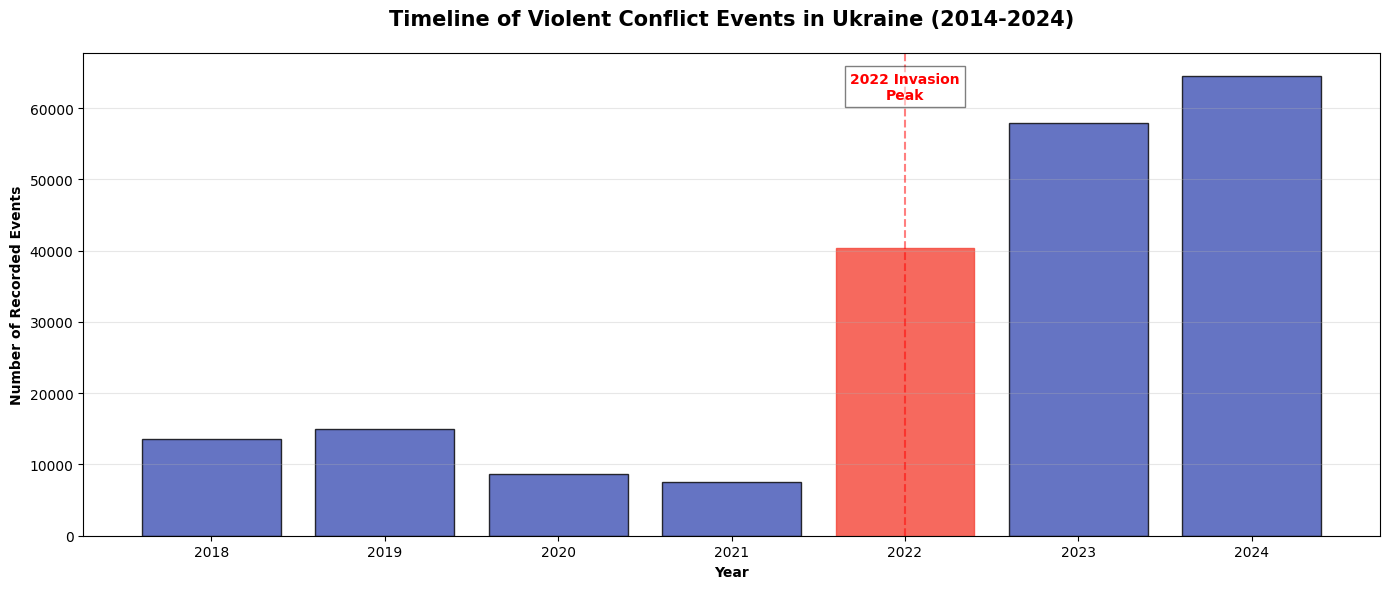

In [ ]:
# --- STEP 3.1: TIMELINE VISUALIZATION ---
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
plt.style.use('default')
sns.set_palette("viridis")

# Extract year for distribution
df_acled_clean['Year'] = df_acled_clean['ACLED_Date'].dt.year
year_counts = df_acled_clean['Year'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
bars = plt.bar(year_counts.index.astype(int), year_counts.values, color='#3F51B5', edgecolor='black', alpha=0.8)

# Highlight the 2022 invasion peak
if 2022 in year_counts.index:
    idx_2022 = list(year_counts.index).index(2022)
    bars[idx_2022].set_color('#F44336') # Red for high alert
    plt.axvline(x=2022, color='red', linestyle='--', alpha=0.5)
    plt.text(2022, max(year_counts.values)*0.95, '2022 Invasion\nPeak',
             ha='center', fontweight='bold', color='red', bbox=dict(facecolor='white', alpha=0.5))

plt.title('Timeline of Violent Conflict Events in Ukraine (2014-2024)', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Recorded Events', fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#Destruction vs. Looting - Patterns of Cultural Harm

Were cultural sites looted before being destroyed, or were they primarily targets of symbolic destruction?


To address this question, the analysis is structured around three sub-questions:

* Do looting and physical damage occur in the same periods? (temporal)

* Do they affect the same geographic areas? (spatial)

* Do they take place within the same contexts of violence (as documented by ACLED)? (context of violence (ACLED))

This section focuses on the first two dimensions: temporal and spatial patterns, integrating data on stolen objects and damaged cultural sites.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

plt.style.use("default")

# -----------------------
# LOAD DATASETS
# -----------------------
URL_STOLEN = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/main/data_stolen/stolen_objects_ukraine_cleaned.csv"
URL_UNESCO = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/main/raw_data/unesco_damage_sites.csv"

print("Loading stolen objects...")
stolen = pd.read_csv(URL_STOLEN)
print("✓ stolen loaded:", stolen.shape)

print("\nLoading UNESCO damaged sites...")
unesco = pd.read_csv(URL_UNESCO)
print("✓ unesco loaded:", unesco.shape)

# -----------------------
# UNESCO MINIMAL PREP
# -----------------------
unesco = unesco.copy()

unesco["UNESCO_Date"] = pd.to_datetime(
    unesco.get("Date of damage (first reported)"),
    errors="coerce"
)
unesco["UNESCO_Year"] = unesco["UNESCO_Date"].dt.year

if "Region" in unesco.columns:
    unesco["Region_clean"] = unesco["Region"].astype(str).str.strip().str.lower()
else:
    unesco["Region_clean"] = np.nan

if "Geo location" in unesco.columns:
    coords = unesco["Geo location"].astype(str).str.split(",", expand=True)
    if coords.shape[1] >= 2:
        unesco["LAT"] = pd.to_numeric(coords[0].str.strip(), errors="coerce")
        unesco["LON"] = pd.to_numeric(coords[1].str.strip(), errors="coerce")
    else:
        unesco["LAT"] = np.nan
        unesco["LON"] = np.nan
else:
    unesco["LAT"] = np.nan
    unesco["LON"] = np.nan

# -----------------------
# STOLEN NORMALIZATION (ONE TRUE SCHEMA)
# - year_clean_num = YEAR OF INCIDENT (event year)
# - latitude_num/longitude_num always available
# -----------------------
stolen = stolen.copy()

def extract_lat_lon(gmaps_url):
    if pd.isna(gmaps_url):
        return (np.nan, np.nan)
    s = str(gmaps_url)

    m = re.search(r"[?&]q=([-0-9.]+)\s*,\s*([-0-9.]+)", s)
    if m:
        return (float(m.group(1)), float(m.group(2)))

    m = re.search(r"@([-0-9.]+)\s*,\s*([-0-9.]+)", s)
    if m:
        return (float(m.group(1)), float(m.group(2)))

    return (np.nan, np.nan)

# --- 1) YEAR EVENT (incident year) ---
year_incident = pd.to_numeric(stolen["year_incident"], errors="coerce") if "year_incident" in stolen.columns else pd.Series(np.nan, index=stolen.index)
year_timeline = pd.to_numeric(stolen["year_for_timeline"], errors="coerce") if "year_for_timeline" in stolen.columns else pd.Series(np.nan, index=stolen.index)

year_event = year_incident.fillna(year_timeline)
year_event = year_event.where((year_event >= 1900) & (year_event <= 2100))

# Force legacy/expected columns for all older scripts
stolen["year_event"] = year_event
stolen["year_clean_num"] = year_event   # <- IMPORTANT for your plots
stolen["year"] = year_event             # <- legacy compatibility

# --- optional: YEAR CREATION (keep separate if you later need it) ---
# try to parse a creation-ish year from available columns, else all NaN
creation_source = None
for c in ["creation_date", "date_normalized", "date"]:
    if c in stolen.columns:
        creation_source = c
        break

if creation_source is None:
    stolen["year_creation_num"] = pd.Series(np.nan, index=stolen.index)
else:
    # extract a 4-digit year from strings like "XX century AD" won't work, but from "1932" yes
    tmp = stolen[creation_source].astype(str).str.extract(r"(\d{4})", expand=False)
    y_creation = pd.to_numeric(tmp, errors="coerce")
    stolen["year_creation_num"] = y_creation.where((y_creation >= 1200) & (y_creation <= 2100))

# --- 2) PLACE CLEAN ---
if "place_incident" in stolen.columns:
    stolen["place_clean"] = stolen["place_incident"].astype(str).str.strip().str.lower()
else:
    stolen["place_clean"] = np.nan

# --- 3) COORDINATES ---
# If latitude/longitude columns exist (old schema), use them; otherwise parse google_maps_link
if ("latitude" in stolen.columns) and ("longitude" in stolen.columns):
    stolen["latitude_num"] = pd.to_numeric(stolen["latitude"], errors="coerce")
    stolen["longitude_num"] = pd.to_numeric(stolen["longitude"], errors="coerce")
else:
    if "google_maps_link" in stolen.columns:
        latlon = stolen["google_maps_link"].apply(lambda x: pd.Series(extract_lat_lon(x)))
        stolen["latitude_num"] = pd.to_numeric(latlon[0], errors="coerce")
        stolen["longitude_num"] = pd.to_numeric(latlon[1], errors="coerce")
    else:
        stolen["latitude_num"] = np.nan
        stolen["longitude_num"] = np.nan

# legacy compatibility
stolen["latitude"] = stolen["latitude_num"]
stolen["longitude"] = stolen["longitude_num"]




Loading stolen objects...
✓ stolen loaded: (2287, 14)

Loading UNESCO damaged sites...
✓ unesco loaded: (365, 20)


##Damaged sites + looting

**Temporal Comparison**
To understand whether:

*   looting and physical damage increase in parallel,
*   one phenomenon anticipates the other,
*   or both emerge predominantly after 2022.


This visualization compares:

* the number of stolen cultural objects per year,
* the number of UNESCO-documented damaged sites per year.

The goal is to observe whether both phenomena follow similar temporal trends, particularly around key moments such as 2014 and the 2022 full-scale invasion.


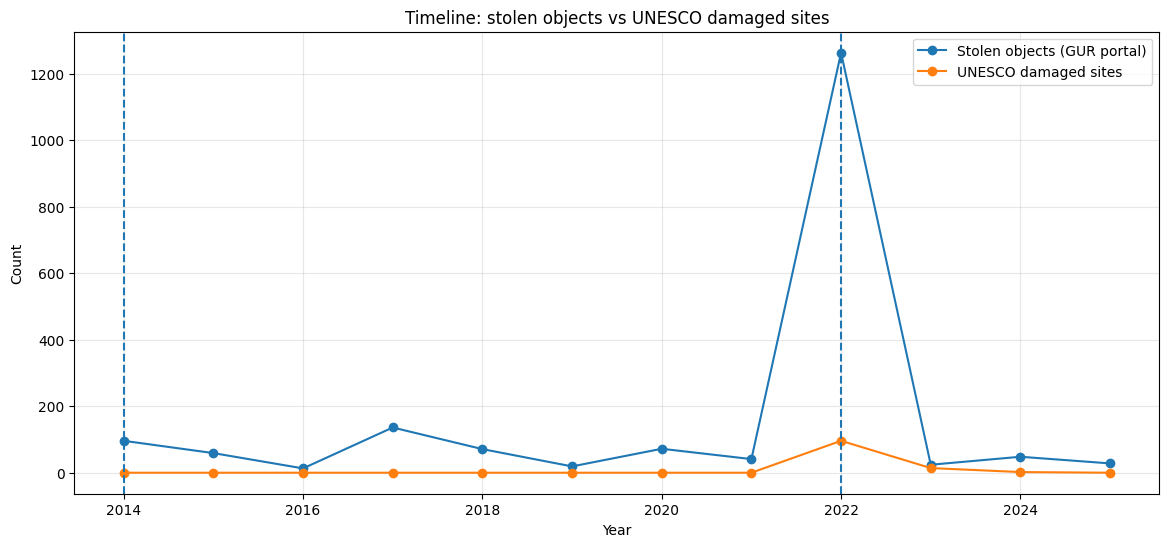

In [ ]:
stolen_timeline_year = stolen["year_clean_num"]
unesco_timeline_year = unesco["UNESCO_Year"]

# opzionale: periodo guerra
stolen_timeline_year = stolen_timeline_year.where(stolen_timeline_year >= 2014)
unesco_timeline_year = unesco_timeline_year.where(unesco_timeline_year >= 2014)

stolen_year = stolen_timeline_year.dropna().astype(int).value_counts().sort_index()
unesco_year = unesco_timeline_year.dropna().astype(int).value_counts().sort_index()

all_years = sorted(set(stolen_year.index).union(set(unesco_year.index)))
stolen_aligned = stolen_year.reindex(all_years, fill_value=0)
unesco_aligned = unesco_year.reindex(all_years, fill_value=0)

plt.figure(figsize=(14,6))
plt.plot(all_years, stolen_aligned.values, marker="o", label="Stolen objects (GUR portal)")
plt.plot(all_years, unesco_aligned.values, marker="o", label="UNESCO damaged sites")
plt.axvline(2014, linestyle="--")
plt.axvline(2022, linestyle="--")
plt.title("Timeline: stolen objects vs UNESCO damaged sites")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


**Spatial Distribution**

This visualization explores where looting and physical damage are concentrated.

- For **UNESCO damaged sites**, official regional classifications are available.
- For **stolen objects**, geographic information is less standardized; therefore,
  the place of incident (often a museum or institution) is used as a proxy.

The two distributions are shown separately to avoid false equivalences.
At this stage, the goal is to identify broad spatial patterns and recurring locations.



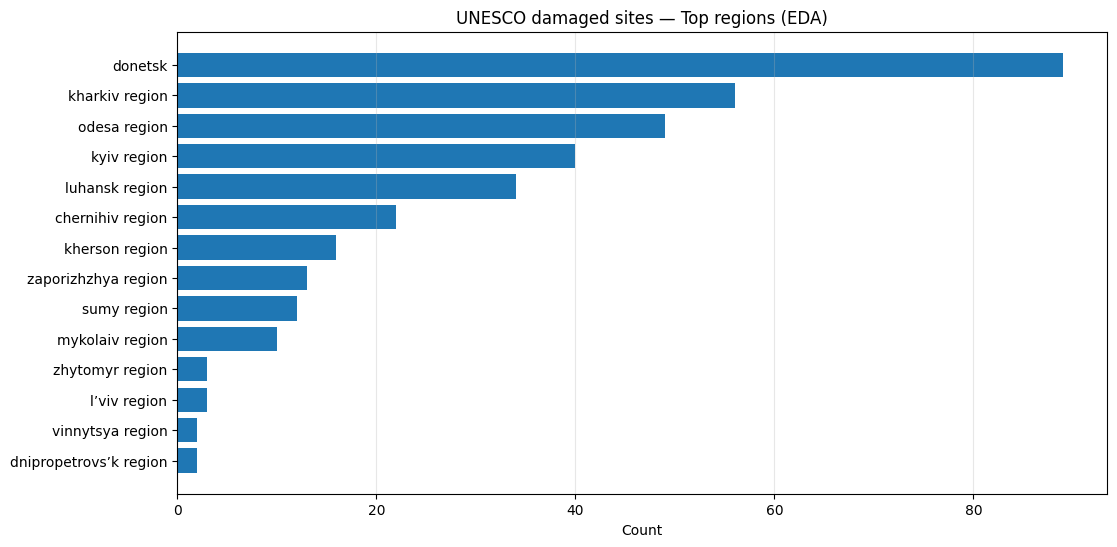

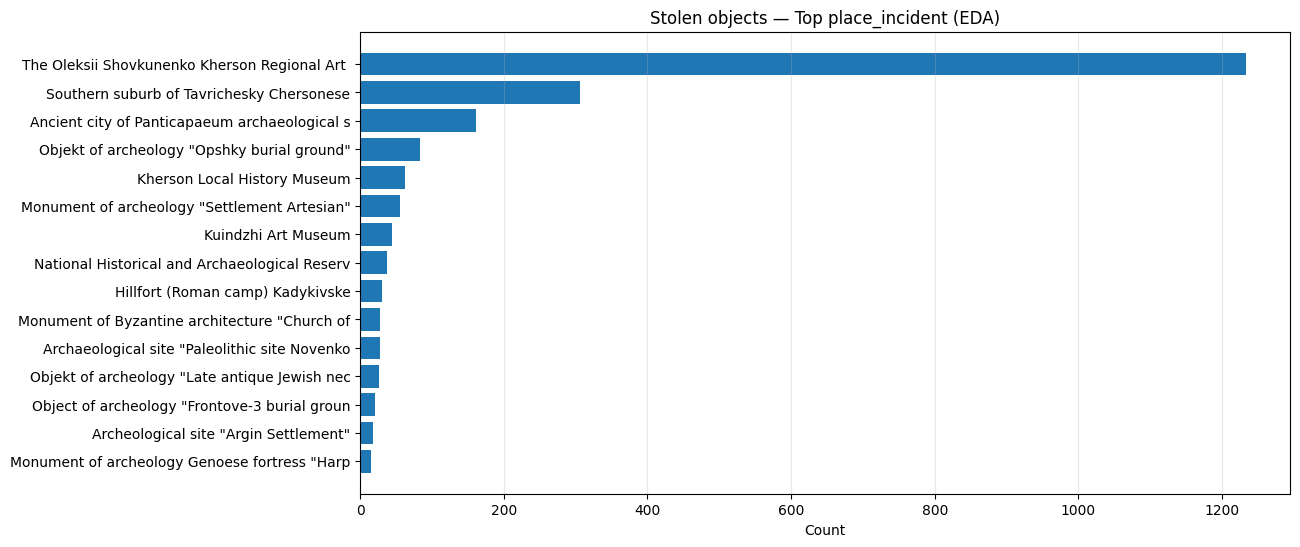

In [ ]:
#UNESCO regions
unesco_region = unesco["Region_clean"].replace("nan", np.nan).dropna().value_counts().head(15)

plt.figure(figsize=(12,6))
plt.barh(unesco_region.index, unesco_region.values)
plt.title("UNESCO damaged sites — Top regions (EDA)")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.grid(axis="x", alpha=0.3)
plt.show()

# Stolen locations (proxy)
stolen_loc = stolen["place_incident"].dropna().value_counts().head(15)

plt.figure(figsize=(12,6))
plt.barh(stolen_loc.index.astype(str).str[:45], stolen_loc.values)
plt.title("Stolen objects — Top place_incident (EDA)")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.grid(axis="x", alpha=0.3)
plt.show()

Stolen objects data is institution-centric and unevenly distributed, while damaged sites data is geographically comprehensive. As a result, comparisons focus on patterns rather than absolute equivalence.

In [ ]:
stolen[["latitude_num", "longitude_num"]].describe()
def region_from_coords(lat, lon):
    if pd.isna(lat) or pd.isna(lon):
        return np.nan


    # Kherson region (museum cluster)
    if 46.4 <= lat <= 46.8 and 32.4 <= lon <= 32.8:
        return "kherson"


    # Crimea
    if 44.5 <= lat <= 45.8 and 33.5 <= lon <= 36.5:
        return "crimea"


    # Donetsk
    if 47.5 <= lat <= 48.5 and 36.5 <= lon <= 38.5:
        return "donetsk"


    return np.nan


stolen["Region_proxy"] = stolen.apply(
    lambda r: region_from_coords(r.latitude_num, r.longitude_num),
    axis=1
)




def normalize_region_name(region):
    if not isinstance(region, str):
        return np.nan


    r = region.lower()


    if "kherson" in r:
        return "kherson"
    if "crimea" in r:
        return "crimea"
    if "donetsk" in r:
        return "donetsk"
    if "luhansk" in r:
        return "luhansk"
    if "kharkiv" in r:
        return "kharkiv"
    if "odesa" in r:
        return "odesa"
    if "mykolaiv" in r:
        return "mykolaiv"
    if "kyiv" in r:
        return "kyiv"
    if "zaporizh" in r:
        return "zaporizhzhya"


    return np.nan


unesco["Region_norm"] = unesco["Region_clean"].apply(normalize_region_name)


unesco["Region_norm"].value_counts(dropna=False)




unesco_region_counts = (
    unesco
    .dropna(subset=["Region_norm"])
    .groupby("Region_norm")
    .size()
    .reset_index(name="damaged_sites")
)




stolen_region_counts = (
    stolen
    .dropna(subset=["Region_proxy"])
    .groupby("Region_proxy")
    .size()
    .reset_index(name="stolen_objects")
)




region_summary = pd.merge(
    unesco_region_counts,
    stolen_region_counts,
    left_on="Region_norm",
    right_on="Region_proxy",
    how="outer"
)


region_summary = region_summary.fillna(0)


region_summary


# 1) Merge senza fillna globale
region_summary = pd.merge(
    unesco_region_counts,          # columns: Region_norm, damaged_sites
    stolen_region_counts,          # columns: Region_proxy, stolen_objects
    left_on="Region_norm",
    right_on="Region_proxy",
    how="outer"
)

# 2) Fillna SOLO sui conteggi (numerici)
region_summary["damaged_sites"] = region_summary["damaged_sites"].fillna(0).astype(int)
region_summary["stolen_objects"] = region_summary["stolen_objects"].fillna(0).astype(int)

# 3) Crea una label unica per la regione:
#    - se c'è Region_norm usa quella
#    - altrimenti usa Region_proxy (es. crimea)
region_summary["Region_label"] = (
    region_summary["Region_norm"].astype("string")
    .fillna(region_summary["Region_proxy"].astype("string"))
)

# 4) (opzionale) togli righe senza label (se esistono)
region_summary = region_summary.dropna(subset=["Region_label"])

# Guarda la tabella
region_summary[["Region_label","damaged_sites","stolen_objects","Region_norm","Region_proxy"]]



Region_label  damaged_sites  stolen_objects   Region_norm Region_proxy
0        crimea              0             556           NaN       crimea
1       donetsk             89               0       donetsk          NaN
2       kharkiv             56               0       kharkiv          NaN
3       kherson             16            1296       kherson      kherson
4          kyiv             40               0          kyiv          NaN
5       luhansk             34               0       luhansk          NaN
6      mykolaiv             10               0      mykolaiv          NaN
7         odesa             49               0         odesa          NaN
8  zaporizhzhya             13               0  zaporizhzhya          NaN

**Output**

* Donetsk / Kharkiv / Kyiv / Odesa
--> show high levels of physical destruction, but relatively little documented looting.

* Kherson / Crimea
-->hotspots of intensive looting, with comparatively lower levels of physical destruction.

Stolen objects are not evenly distributed across regions.
Looting events are highly concentrated in a small number of cultural institutions,
while damage to sites is geographically widespread.
This asymmetry is itself a key finding of the analysis.

##Damaged sites + looting + context of violence (ACLED)

Do they take place within the same contexts of violence (as documented by ACLED)? context of violence (ACLED) Do they take place within the same contexts of violence (as documented by ACLED)? (context of violence (ACLED))

For each damaged cultural site and stolen object (2022+), we identified the closest ACLED event in space, and analyzed its event type, sub-event type, and actor type, to understand the context of violence associated with destruction and looting.

In [ ]:
import pandas as pd

URL_ACLED_CLEAN = "https://media.githubusercontent.com/media/csalguero10/DisperseArt_InformationVisualization/bc92f709426671effb51f96261de4a53e2ac7b1b/processed_data/acled_clean.csv"

print("Loading ACLED clean dataset...")
acled = pd.read_csv(URL_ACLED_CLEAN, sep=";")
print("✓ acled loaded:", acled.shape)


Loading ACLED clean dataset...
✓ acled loaded: (226016, 31)


### Type of event violence with damaged cultural sites
What type of violence is most often associated with damaged cultural sites?
Remote bombing? Battles? Other?


Only events with destructive potential:
* Explosions/Remote violence
* Battles

We exclude:
* Looting/property destruction
* Violence against civilians

For each damaged UNESCO site, we find:
the closest ACLED event in space
and look at what type of event it was.

In [ ]:
# --- STEP 2B: filter ACLED for destruction-related events ---

acled_destruction = acled[
    acled["ACLED_EventType"].isin([
        "Explosions/Remote violence",
        "Battles"
    ])
].copy()

# Keep only events with valid coordinates
acled_destruction = acled_destruction.dropna(subset=["ACLED_Lat", "ACLED_Lon"])

# Focus on 2022+
acled_destruction["ACLED_Date"] = pd.to_datetime(acled_destruction["ACLED_Date"], errors="coerce")
acled_destruction = acled_destruction[acled_destruction["ACLED_Date"].dt.year >= 2022]

print("ACLED destruction events:", acled_destruction.shape)
acled_destruction["ACLED_EventType"].value_counts()

ACLED destruction events: (160574, 31)


ACLED_EventType
Explosions/Remote violence    124168
Battles                        36406
Name: count, dtype: int64

In [ ]:
from scipy.spatial.distance import cdist
import numpy as np

# UNESCO sites with coords
unesco_geo = unesco.dropna(subset=["LAT", "LON", "UNESCO_Date"]).copy()

# Coordinates
coords_unesco = unesco_geo[["LAT", "LON"]].values
coords_acled = acled_destruction[["ACLED_Lat", "ACLED_Lon"]].values

# Find nearest ACLED event for each UNESCO site
dist_matrix = cdist(coords_unesco, coords_acled)
nearest_idx = dist_matrix.argmin(axis=1)

# Build joined dataframe
unesco_acled = pd.concat(
    [
        unesco_geo.reset_index(drop=True),
        acled_destruction.iloc[nearest_idx].reset_index(drop=True)
    ],
    axis=1
)

print("Joined UNESCO–ACLED dataset:", unesco_acled.shape)
unesco_acled.head(3)

Joined UNESCO–ACLED dataset: (109, 57)


Unnamed: 0                Title of the damage site in English  \
0          1  Historic building of the regional youth center...   
1          2                           Church of St. Theodosius   
2          3  The Military Historical Museum - a branch of t...   

  Include or not (Yes/No)                              Comment by volunteers  \
0                     Yes                        formerly the Shchors Cinema   
1                     Yes                                                NaN   
2                     Yes  The Military Historical Museum - a branch of t...   

  Name of damanged site in Ukrainian on Google Maps  \
0           Чернігівський обласний молодіжний центр   
1                         Церква святителя Феодосія   
2                                               NaN   

  Alternative English name on Google Maps  \
0                                     NaN   
1                 Church of St.Theodosius   
2                                     NaN   

  Also included in the Wikipedia page?  \
0                                  yes   
1                                  yes   
2                                  yes   

                                   Note on Wikipedia  \
0  partially destroyed as a result of an air stri...   
1  The first church in Chernihiv. Was partially d...   
2      Chernihiv Historical Museum of V.V. Tarnovsky   

                             Type of damanged site            Region  ...  \
0  building of historical and/or artistic interest  Chernihiv region  ...   
1                                   religious site  Chernihiv region  ...   
2                                           museum  Chernihiv region  ...   

      location ACLED_Lat ACLED_Lon geo_precision  \
0    Chernihiv   51.5055   31.2849             2   
1  Novoselivka   51.5321   31.3837             2   
2    Chernihiv   51.5055   31.2849             2   

                           source source_scale  \
0  Institute for the Study of War        Other   
1  Ministry of Defence of Ukraine        Other   
2  Institute for the Study of War        Other   

                                         ACLED_Notes fatalities tags  \
0  On 24 February 2022, Russian forces clashed wi...          0  NaN   
1  On 16 March 2022, Russian forces launched mech...          0  NaN   
2  On 24 February 2022, Russian forces clashed wi...          0  NaN   

    timestamp  
0  1753954728  
1  1756236982  
2  1753954728  

[3 rows x 57 columns]

In [ ]:
# --- STEP 2B: filter ACLED for destruction-related events ---

acled_destruction = acled[
    acled["ACLED_EventType"].isin([
        "Explosions/Remote violence",
        "Battles"
    ])
].copy()

# Keep only events with valid coordinates
acled_destruction = acled_destruction.dropna(subset=["ACLED_Lat", "ACLED_Lon"])

# Focus on 2022+
acled_destruction["ACLED_Date"] = pd.to_datetime(acled_destruction["ACLED_Date"], errors="coerce")
acled_destruction = acled_destruction[acled_destruction["ACLED_Date"].dt.year >= 2022]

print("ACLED destruction events:", acled_destruction.shape)
acled_destruction["ACLED_EventType"].value_counts()

ACLED destruction events: (160574, 31)


ACLED_EventType
Explosions/Remote violence    124168
Battles                        36406
Name: count, dtype: int64

In [ ]:
### Distribution of ACLED event types associated with damaged sites
event_dist = unesco_acled["ACLED_EventType"].value_counts()
event_pct = (event_dist / event_dist.sum() * 100).round(1)

pd.DataFrame({
    "Count": event_dist,
    "Percentage (%)": event_pct
})


Count  Percentage (%)
ACLED_EventType                                  
Explosions/Remote violence     80            73.4
Battles                        29            26.6

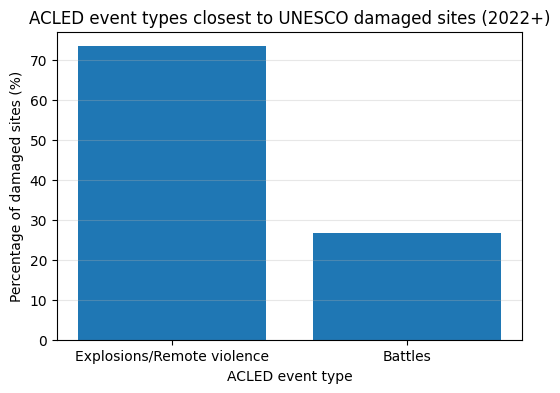

In [ ]:
event_pct = (event_dist / event_dist.sum() * 100).round(1)

plt.figure(figsize=(6,4))
plt.bar(event_pct.index, event_pct.values)
plt.ylabel("Percentage of damaged sites (%)")
plt.xlabel("ACLED event type")
plt.title("ACLED event types closest to UNESCO damaged sites (2022+)")
plt.grid(axis="y", alpha=0.3)
plt.show()

**Output**

The majority of UNESCO-documented damaged cultural sites are spatially associated with ACLED events classified as Explosions / Remote violence rather than direct battles.

This suggests that cultural heritage destruction is primarily linked to long-range military actions (such as shelling and missile strikes), as opposed to damage occurring during ground combat.

At this stage, the analysis does not address intent or attribution, but highlights a clear distinction in the type of violence most frequently correlated with heritage destruction.

In [ ]:
unesco_acled[["ACLED_EventType", "ACLED_SubEvent"]].head()
subevent_dist = (
    unesco_acled["ACLED_SubEvent"]
    .value_counts()
    .head(10)
)

subevent_dist


ACLED_SubEvent
Shelling/artillery/missile attack    64
Armed clash                          28
Air/drone strike                     14
Remote explosive/landmine/IED         2
Government regains territory          1
Name: count, dtype: int64

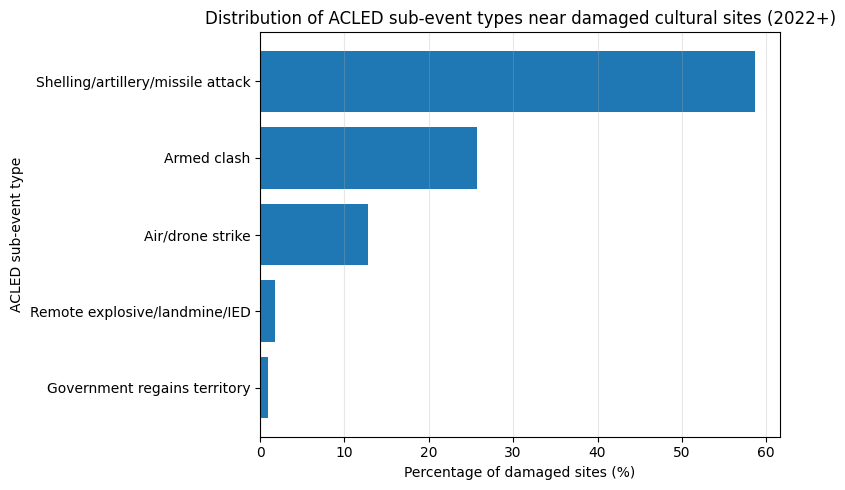

In [ ]:
subevent_pct = (
    subevent_dist / subevent_dist.sum() * 100
).round(1)

subevent_pct

plt.figure(figsize=(8,5))

plt.barh(
    subevent_pct.index,
    subevent_pct.values
)

plt.title("Distribution of ACLED sub-event types near damaged cultural sites (2022+)")
plt.xlabel("Percentage of damaged sites (%)")
plt.ylabel("ACLED sub-event type")

plt.gca().invert_yaxis()
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()


**Output**

Sub-event types closest to damaged sites

This visualization focuses on the sub-event types of ACLED events closest to UNESCO damaged cultural sites after 2022.

By moving from broad event categories to specific tactical actions, it becomes possible to identify the concrete mechanisms through which cultural heritage is damaged.

The results show that the majority of damaged sites are associated with shelling, artillery, and missile attacks, followed by armed clashes. This indicates that cultural heritage destruction is predominantly linked to remote and indirect forms of violence, rather than to ground-level assaults or acts of appropriation.

ltre metà dei siti danneggiati è associata a bombardamenti indiretti (artiglieria, missili, shelling).
Questo indica distruzione sistemica, non incidentale.

This visualization shows the distribution of actor types associated with the ACLED events closest to UNESCO damaged cultural sites after 2022.

Actors are grouped into broad categories (state forces, rebel groups, civilians, and others) in order to characterize the nature of the violence rather than to assign responsibility.

The predominance of state forces indicates that cultural heritage destruction is mainly linked to conventional warfare and remote military actions, rather than to opportunistic or civilian-led violence.

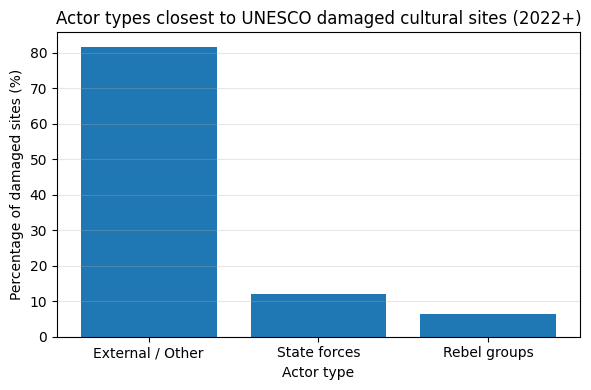

In [ ]:
def map_actor_type(inter):
    if pd.isna(inter):
        return "Unknown"
    if "State forces" in inter:
        return "State forces"
    if "Rebel group" in inter or "Political militia" in inter:
        return "Rebel groups"
    if "Civilians" in inter:
        return "Civilians"
    if "External" in inter:
        return "External / Other"
    return "Other"
unesco_acled["Actor_Type"] = unesco_acled["inter1"].apply(map_actor_type)
unesco_acled["Actor_Type"].value_counts()

actor_dist = unesco_acled["Actor_Type"].value_counts()
actor_pct = (actor_dist / actor_dist.sum() * 100).round(1)

actor_pct

plt.figure(figsize=(6,4))

plt.bar(
    actor_pct.index,
    actor_pct.values
)

plt.title("Actor types closest to UNESCO damaged cultural sites (2022+)")
plt.ylabel("Percentage of damaged sites (%)")
plt.xlabel("Actor type")

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

**Output**
Actor types (closest events)

The predominance of the “External / Other” category does not indicate the involvement of foreign or unknown actors per se, but rather reflects a limitation of actor attribution in ACLED data for remote forms of violence.

Events such as shelling, artillery, and missile attacks are frequently recorded without a clearly identifiable perpetrator, especially in contexts of high-intensity warfare.

This result is therefore consistent with the dominance of remote violence observed in the sub-event analysis and highlights the structural difficulty of attributing responsibility in cases of indirect bombardment.

### Type of event violence with damaged cultural sites

What type of ACLED events are most often associated with the looting of cultural property?
Violence against civilians? Looting recorded as an event? Strategic developments (occupation)?

Methodological choices: To explain looting/appropriation, we include the following from ACLED:
* Looting/property destruction
* Violence against civilians
* Strategic developments

We exclude:
* Explosions/Remote violence
* Battles (because they explain destruction, not appropriation)

In [ ]:
# --- STEP 2C: filter ACLED for looting/appropriation-related events ---

acled_looting = acled[
    acled["ACLED_EventType"].isin([
        "Looting/property destruction",
        "Violence against civilians",
        "Strategic developments"

    ])
].copy()

# Valid coordinates only
acled_looting = acled_looting.dropna(subset=["ACLED_Lat", "ACLED_Lon"])

# Focus on 2022+
acled_looting["ACLED_Date"] = pd.to_datetime(acled_looting["ACLED_Date"], errors="coerce")
acled_looting = acled_looting[acled_looting["ACLED_Date"].dt.year >= 2022]

print("ACLED looting-related events:", acled_looting.shape)
acled_looting["ACLED_EventType"].value_counts()


ACLED looting-related events: (17528, 31)


ACLED_EventType
Strategic developments        15196
Violence against civilians     2332
Name: count, dtype: int64

In [ ]:
# ACLED events potentially relevant to looting context
acled_context = acled[
    acled["ACLED_EventType"].isin([
        "Looting/property destruction",
        "Violence against civilians",
        "Strategic developments",
        "Battles",
        "Explosions/Remote violence"
    ])
].copy()

acled_context = acled_context.dropna(subset=["ACLED_Lat", "ACLED_Lon"])
acled_context["ACLED_Date"] = pd.to_datetime(acled_context["ACLED_Date"], errors="coerce")
acled_context = acled_context[acled_context["ACLED_Date"].dt.year >= 2022]

For each stolen object, we find: the closest ACLED event in space and look at what type of event it was.

 If the following prevail:

* Looting/property destruction
* Violence against civilians
* Strategic developments

then looting ≠ destruction.

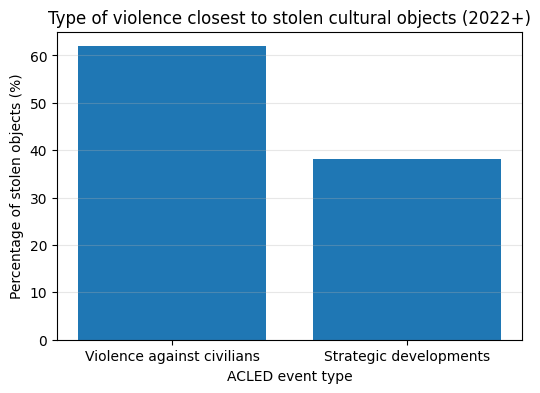

In [ ]:
# Stolen objects with valid coordinates
stolen_geo = stolen.dropna(subset=["latitude_num", "longitude_num"]).copy()

# Coordinates
coords_stolen = stolen_geo[["latitude_num", "longitude_num"]].values
coords_acled = acled_looting[["ACLED_Lat", "ACLED_Lon"]].values

# Find nearest ACLED event
dist_matrix = cdist(coords_stolen, coords_acled)
nearest_idx = dist_matrix.argmin(axis=1)

# Build joined dataframe
stolen_acled = pd.concat(
    [
        stolen_geo.reset_index(drop=True),
        acled_looting.iloc[nearest_idx].reset_index(drop=True)
    ],
    axis=1
)

event_dist_loot = stolen_acled["ACLED_EventType"].value_counts()
event_pct_loot = (event_dist_loot / event_dist_loot.sum() * 100).round(1)

pd.DataFrame({
    "Count": event_dist_loot,
    "Percentage (%)": event_pct_loot
})

plt.figure(figsize=(6,4))
plt.bar(event_pct_loot.index, event_pct_loot.values)
plt.ylabel("Percentage of stolen objects (%)")
plt.xlabel("ACLED event type")
plt.title("Type of violence closest to stolen cultural objects (2022+)")
plt.grid(axis="y", alpha=0.3)
plt.show()


**Output**

Looting of cultural objects (Stolen objects dataset) Main ACLED event types closest to stolen objects (2022+)


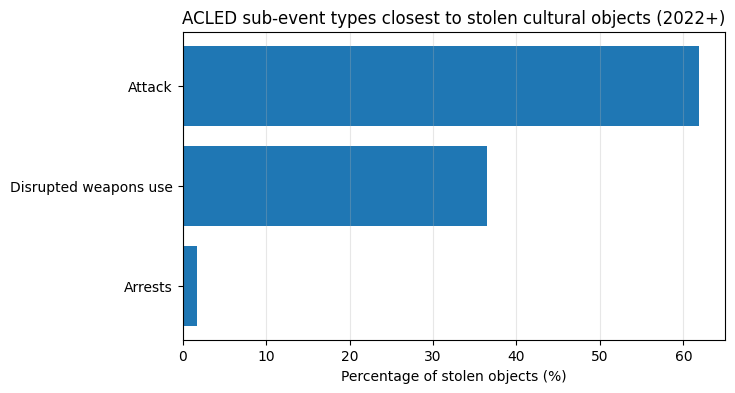

In [ ]:
subevent_dist_loot = stolen_acled["ACLED_SubEvent"].value_counts()
subevent_pct_loot = (subevent_dist_loot / subevent_dist_loot.sum() * 100).round(1)

subevent_pct_loot.head(10)

plt.figure(figsize=(7,4))
plt.barh(subevent_pct_loot.index[:10], subevent_pct_loot.values[:10])
plt.xlabel("Percentage of stolen objects (%)")
plt.title("ACLED sub-event types closest to stolen cultural objects (2022+)")
plt.gca().invert_yaxis()
plt.grid(axis="x", alpha=0.3)
plt.show()

**Output**

Sub-event types closest to stolen objects

Looting occurs in contexts of direct coercion, not open combat: Cultural looting does NOT spatially coincide with ACLED events that label it as “looting”. On the contrary, stolen objects are more frequently associated with: attacks, arrests, coercive violence Suggesting that the removal of heritage occurs as part of practices of control and repression, rather than as an explicit and isolated violent event.


In [ ]:
acled_looting[["actor1", "actor2"]].head()

actor1  \
47918               Unidentified Armed Group (Russia)   
47921                Unidentified Armed Group (Spain)   
47929               Unidentified Armed Group (France)   
47930  Police Forces of Russia (2000-) Border Service   
47933              Unidentified Armed Group (Denmark)   

                                 actor2  
47918                Civilians (Russia)  
47921                 Civilians (Spain)  
47929                Civilians (France)  
47930               Civilians (Belarus)  
47933  Police Forces of Denmark (2019-)

In [ ]:
def classify_actor_type(row):
    actors = f"{row.get('actor1', '')} {row.get('actor2', '')}".lower()

    if any(k in actors for k in [
        "armed forces", "military forces", "national guard", "state forces"
    ]):
        return "State forces"

    if any(k in actors for k in [
        "dpr", "lnr", "people's militia", "separatist", "wagner"
    ]):
        return "Rebel groups"

    if "civilian" in actors:
        return "Civilians"

    return "External / Other"
acled_looting["Actor_Type"] = acled_looting.apply(classify_actor_type, axis=1)

acled_looting["Actor_Type"].value_counts()

actor_dist_looting = acled_looting["Actor_Type"].value_counts()
actor_pct_looting = (actor_dist_looting / actor_dist_looting.sum() * 100).round(1)

actor_pct_looting


Actor_Type
State forces        70.3
Civilians           24.7
External / Other     4.8
Rebel groups         0.2
Name: count, dtype: float64

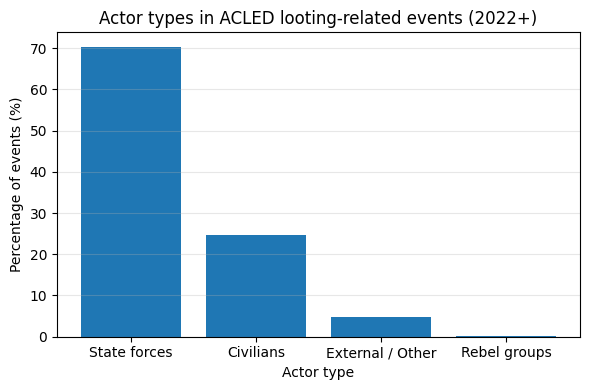

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(actor_pct_looting.index, actor_pct_looting.values)
plt.title("Actor types in ACLED looting-related events (2022+)")
plt.ylabel("Percentage of events (%)")
plt.xlabel("Actor type")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

**Output**
Actor types (looting-related events)

When focusing only on ACLED events explicitly classified as looting or appropriation-related, state forces dominate the actor distribution. This reflects ACLED’s tendency to record looting as part of broader strategic or occupation-related developments, rather than as isolated acts.

Combined with the nearest-event analysis, this suggests that cultural looting operates across multiple layers: as a coercive practice at the local level and as an organized strategy within territorial control.

A. Damaged sites (UNESCO)

*   Events → remote violence
*  Actors → state / external
* Mechanism → bombing


B. Stolen objects, nearest event

 * Events → attack / arrests / coercion  
* Actors → civilians + external
* Mechanism → control and repression


Were cultural sites looted before being destroyed, or were they primarily targets of symbolic destruction?

Risposta supportata dai dati:

Destruction
→ avviene soprattutto tramite bombardamenti remoti
→ colpisce i siti come bersagli strutturali e simbolici

Looting
→ avviene in contesti di occupazione e controllo territoriale
→ associato a violenza sui civili e presenza militare stabile

Non è la stessa violenza.
Non avviene nello stesso modo.
Non risponde alla stessa logica.

Questo suggerisce una doppia strategia di cultural harm:

cancellazione simbolica (destruction),

appropriazione sistematica (looting).

## Timeline: cultural harm vs ACLED contexts

Timeline: cultural harm vs ACLED contexts

The graph places three different levels of phenomena on the same timeline 2014–present:
* Left axis (cultural datasets)
  * Stolen objects (GUR) → number of cultural objects stolen per year

  * UNESCO damaged sites → number of cultural sites damaged per year

These two are specific cultural events.
Asse destro (ACLED – contesto di violenza)
* Right axis (ACLED – context of violence)
Two separate curves:

  * ACLED destruction context (Explosions/Remote violence + Battles) → measures the intensity of structural destructive violence

  * ACLED occupation & symbolic violence context (Violence against civilians + Strategic developments) → measures occupation, territorial control, coercion

ACLED does not measure cultural assets, but the military and political context in which those assets are destroyed or looted.

Before addressing symbolic or intentional forms of cultural harm,it is necessary to establish whether damaged cultural sites are primarily affected within the core dynamics of armed conflict.


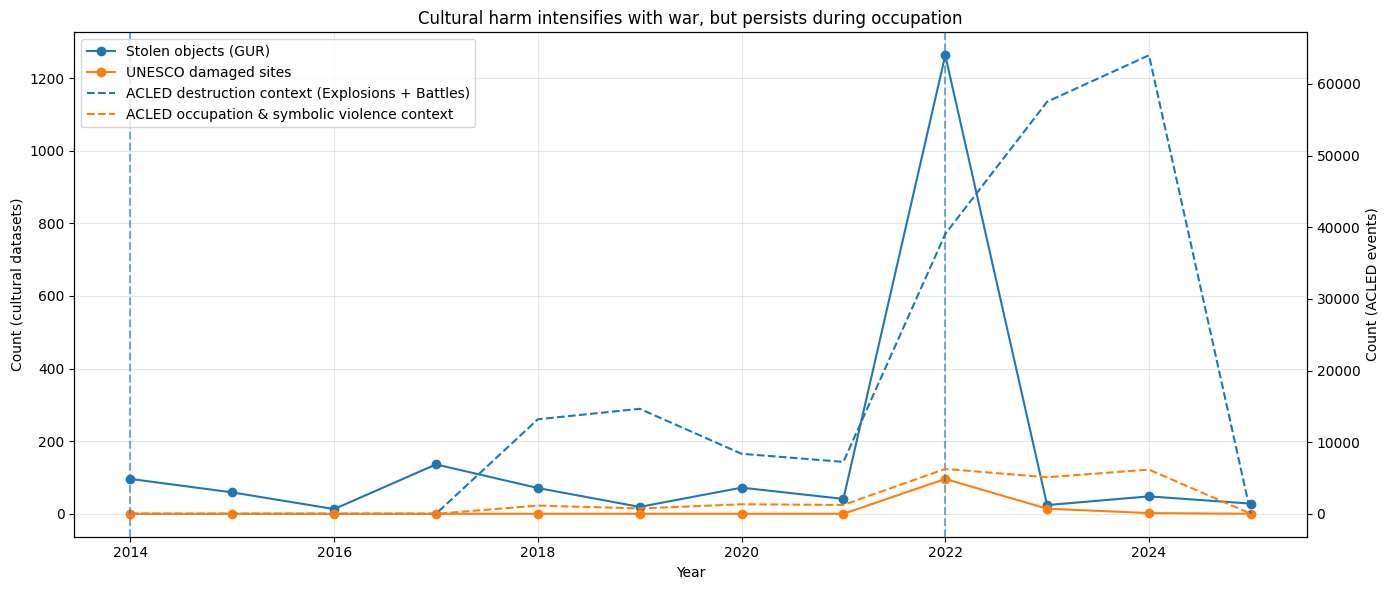

ACLED destruction (total): 204039
ACLED looting/occupation (total): 21977


In [ ]:
YEAR_MIN = 2014   # metti None per non filtrare
YEAR_MAX = None   # es. 2025, oppure None

# -----------------------
# 1) YEARS: STOLEN + UNESCO
# -----------------------
stolen_timeline_year = pd.to_numeric(stolen["year_clean_num"], errors="coerce")
unesco_timeline_year = pd.to_numeric(unesco["UNESCO_Year"], errors="coerce")

if YEAR_MIN is not None:
    stolen_timeline_year = stolen_timeline_year.where(stolen_timeline_year >= YEAR_MIN)
    unesco_timeline_year = unesco_timeline_year.where(unesco_timeline_year >= YEAR_MIN)
if YEAR_MAX is not None:
    stolen_timeline_year = stolen_timeline_year.where(stolen_timeline_year <= YEAR_MAX)
    unesco_timeline_year = unesco_timeline_year.where(unesco_timeline_year <= YEAR_MAX)

stolen_year = stolen_timeline_year.dropna().astype(int).value_counts().sort_index()
unesco_year = unesco_timeline_year.dropna().astype(int).value_counts().sort_index()

# -----------------------
# 2) ACLED: prepare year + two contexts
# -----------------------
acled_tmp = acled.copy()
acled_tmp["ACLED_Date"] = pd.to_datetime(acled_tmp["ACLED_Date"], errors="coerce")
acled_tmp["ACLED_Year"] = acled_tmp["ACLED_Date"].dt.year

if YEAR_MIN is not None:
    acled_tmp = acled_tmp[acled_tmp["ACLED_Year"] >= YEAR_MIN]
if YEAR_MAX is not None:
    acled_tmp = acled_tmp[acled_tmp["ACLED_Year"] <= YEAR_MAX]

# Context buckets (coerenti con quello che avete trovato)
acled_destruct = acled_tmp[acled_tmp["ACLED_EventType"].isin([
    "Explosions/Remote violence",
    "Battles"
])].copy()

acled_lootctx = acled_tmp[acled_tmp["ACLED_EventType"].isin([
    "Violence against civilians",
    "Strategic developments"
])].copy()

acled_destruct_year = acled_destruct["ACLED_Year"].dropna().astype(int).value_counts().sort_index()
acled_lootctx_year = acled_lootctx["ACLED_Year"].dropna().astype(int).value_counts().sort_index()

# -----------------------
# 3) ALIGN YEARS
# -----------------------
all_years = sorted(set(stolen_year.index)
                   .union(set(unesco_year.index))
                   .union(set(acled_destruct_year.index))
                   .union(set(acled_lootctx_year.index)))

stolen_aligned = stolen_year.reindex(all_years, fill_value=0)
unesco_aligned = unesco_year.reindex(all_years, fill_value=0)
acled_destruct_aligned = acled_destruct_year.reindex(all_years, fill_value=0)
acled_lootctx_aligned = acled_lootctx_year.reindex(all_years, fill_value=0)


# -----------------------
# 4) PLOT (dual y-axis)
# -----------------------
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left axis: cultural datasets
ax1.plot(all_years, stolen_aligned.values, marker="o", label="Stolen objects (GUR)")
ax1.plot(all_years, unesco_aligned.values, marker="o", label="UNESCO damaged sites")
ax1.set_xlabel("Year")
ax1.set_ylabel("Count (cultural datasets)")
ax1.grid(alpha=0.3)

# Right axis: ACLED
ax2 = ax1.twinx()
ax2.plot(all_years, acled_destruct_aligned.values, linestyle="--", marker=None,
         label="ACLED destruction context (Explosions + Battles)")
ax2.plot(all_years, acled_lootctx_aligned.values, linestyle="--", marker=None,
         label="ACLED occupation & symbolic violence context")
ax2.set_ylabel("Count (ACLED events)")

# Reference lines
ax1.axvline(2014, linestyle="--", alpha=0.6)
ax1.axvline(2022, linestyle="--", alpha=0.6)

# Title
ax1.set_title("Cultural harm intensifies with war, but persists during occupation")

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.show()

# Optional: quick sanity print
print("ACLED destruction (total):", int(acled_destruct_aligned.sum()))
print("ACLED looting/occupation (total):", int(acled_lootctx_aligned.sum()))


In [ ]:
print(acled_tmp["ACLED_Year"].min())
print(acled_tmp["ACLED_Date"].sort_values().head(10))

2018
0    2018-01-01
19   2018-01-01
18   2018-01-01
17   2018-01-01
16   2018-01-01
15   2018-01-01
14   2018-01-01
12   2018-01-01
11   2018-01-01
10   2018-01-01
Name: ACLED_Date, dtype: datetime64[ns]


**Output**

The timeline shows a clear structural break in 2022, when cultural harm sharply increases alongside the escalation of the war in Ukraine. While armed violence is present from earlier years, large-scale damage to cultural sites and systematic looting emerge primarily with the 2022 invasion. Damage to heritage sites closely follows peaks in high-intensity violence, whereas looting and other forms of cultural harm also persist during occupation and periods of control. This suggests that cultural damage cannot be explained solely as collateral damage of combat, but also reflects organized practices of appropriation and symbolic domination.


Although ACLED data for Ukraine start in 2018, the timeline begins in 2014 because all datasets are aligned on a common yearly axis. Cultural datasets (UNESCO and GUR) include observations from 2014 onward. For years without ACLED events (2014–2017), ACLED values are set to zero, producing a flat baseline that may visually suggest earlier activity. All ACLED counts are based strictly on the ACLED_Date field; references to earlier years in descriptions are contextual only and not used in the analysis.

## Spatial comparison Damaged sites+ looting+ acled
Before performing any spatial joins, we first inspect whether the three phenomena
under analysis—violent conflict events, looted cultural objects, and damaged heritage sites—
are geographically co-located.

This visualization overlays:
- ACLED conflict events,
- locations of stolen cultural objects,
- UNESCO- damaged sites.

The goal is not to establish causality, but to assess whether a spatial relationship exists
that justifies further correlation analysis.

ACLED filtered: (203548, 31)
Stolen filtered: (2287, 24)
UNESCO filtered: (232, 26)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


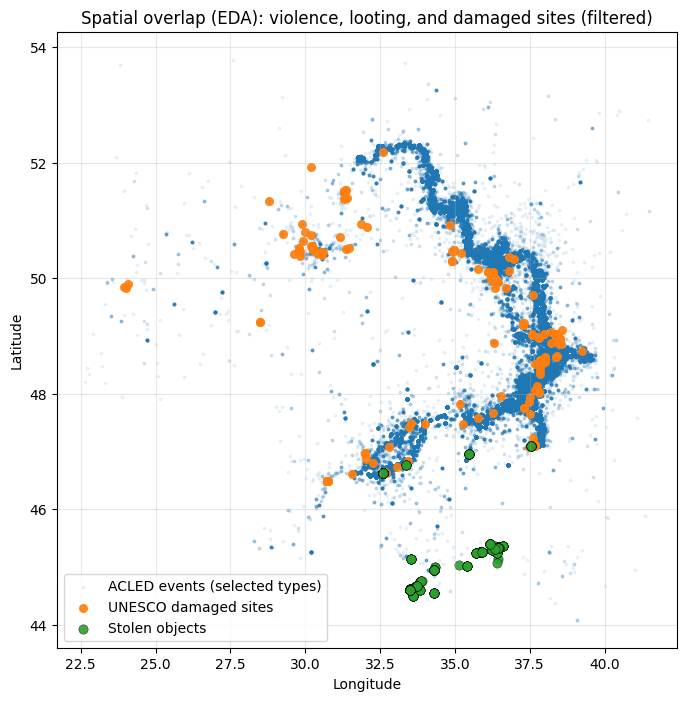

In [ ]:
# Bounding box "larga" per Ucraina (per togliere outlier assurdi)
def in_ukraine_bbox(lat, lon):
    return (lat >= 44) & (lat <= 53.8) & (lon >= 22) & (lon <= 41.5)

# ACLED subset
acled_subset = acled[acled["ACLED_EventType"].isin([
    "Looting/property destruction",
    "Explosions/Remote violence",
    "Battles"
])].copy()

# Keep only plausible Ukraine coords
acled_subset = acled_subset[
    in_ukraine_bbox(acled_subset["ACLED_Lat"], acled_subset["ACLED_Lon"])
]

# Stolen coords
stolen_geo = stolen.dropna(subset=["latitude_num", "longitude_num"]).copy()
stolen_geo = stolen_geo[in_ukraine_bbox(stolen_geo["latitude_num"], stolen_geo["longitude_num"])]

# UNESCO coords
unesco_geo = unesco.dropna(subset=["LAT", "LON"]).copy()
unesco_geo = unesco_geo[in_ukraine_bbox(unesco_geo["LAT"], unesco_geo["LON"])]

print("ACLED filtered:", acled_subset.shape)
print("Stolen filtered:", stolen_geo.shape)
print("UNESCO filtered:", unesco_geo.shape)

plt.figure(figsize=(8, 8))

# ACLED background (tiny + very transparent)
plt.scatter(
    acled_subset["ACLED_Lon"],
    acled_subset["ACLED_Lat"],
    s=3,
    alpha=0.08,
    label="ACLED events (selected types)"
)

# UNESCO (bigger)
plt.scatter(
    unesco_geo["LON"],
    unesco_geo["LAT"],
    s=30,
    alpha=0.9,
    label="UNESCO damaged sites"
)

# Stolen objects (biggest + edge to pop out)
plt.scatter(
    stolen_geo["longitude_num"],
    stolen_geo["latitude_num"],
    s=45,
    alpha=0.9,
    label="Stolen objects",
    edgecolors="black",
    linewidths=0.3
)

plt.title("Spatial overlap (EDA): violence, looting, and damaged sites (filtered)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(alpha=0.3)
plt.show()



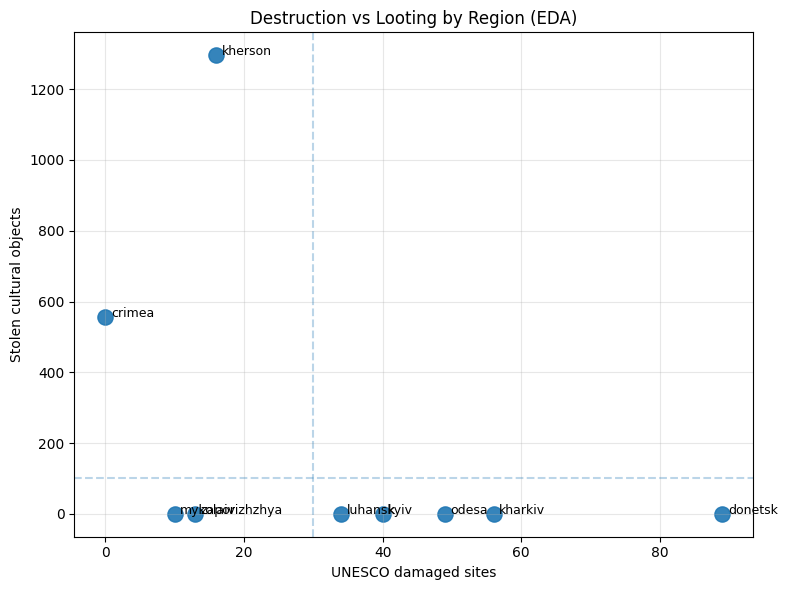

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(
    region_summary["damaged_sites"],
    region_summary["stolen_objects"],
    s=120,
    alpha=0.9
)

# Etichette corrette
for _, row in region_summary.iterrows():
    plt.text(
        row["damaged_sites"] + 0.8,
        row["stolen_objects"] + 0.8,
        str(row["Region_label"]),
        fontsize=9
    )

plt.axhline(100, linestyle="--", alpha=0.3)
plt.axvline(30, linestyle="--", alpha=0.3)


plt.title("Destruction vs Looting by Region (EDA)")
plt.xlabel("UNESCO damaged sites")
plt.ylabel("Stolen cultural objects")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Output

In the graph ‘Destruction vs Looting by Region’:

* X axis = destruction (UNESCO)

* Y axis = looting (stolen objects)

* each point = one region

The graph clearly shows that:
there is no linear correlation between destruction and looting and two distinct patterns of cultural violence emerge.

* Regions of destruction: Donetsk, Kharkiv, Odesa -->Many sites damaged
Almost no objects stolen → destruction linked to high-intensity warfare

* Regions of appropriation:Kherson, Crimea
-->Few or no UNESCO sites damaged. Many objects stolen → systematic, non-accidental looting.

The regional comparison reveals a clear asymmetry: areas heavily affected by military destruction are not the same areas where cultural looting occurs. Looting concentrates in regions under prolonged occupation, while destruction prevails along active frontlines.


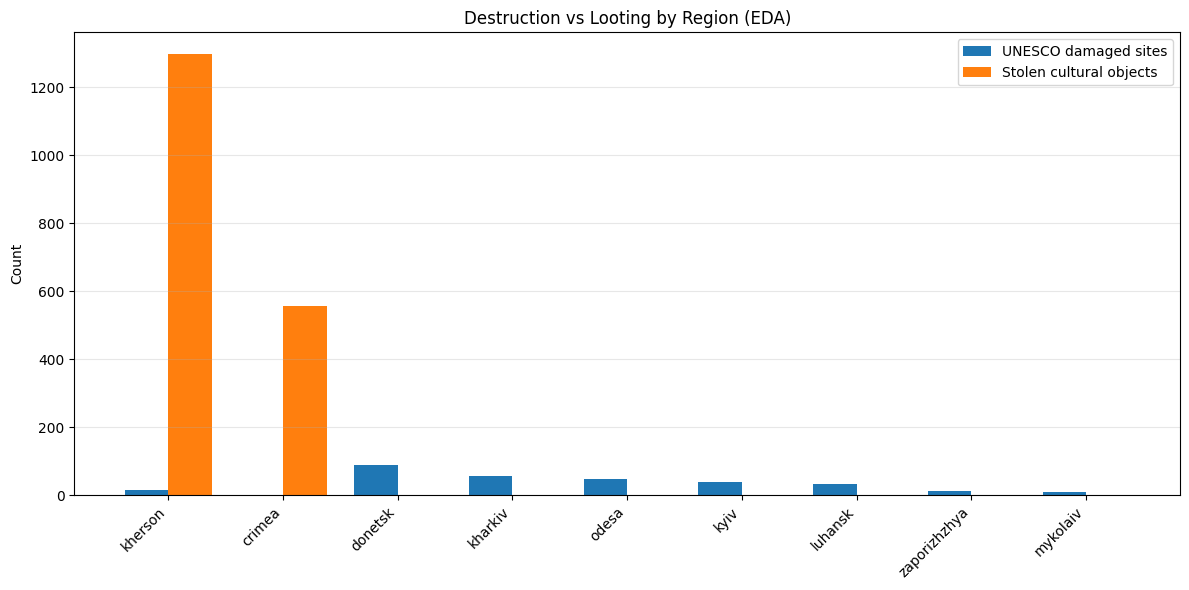

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Usa la tabella finale ---
df = region_summary.copy()

# Se hai ancora 0 come label, sistemiamo prima
df["Region_label"] = df["Region_label"].replace(0, np.nan)
df["Region_label"] = df["Region_label"].fillna(df["Region_norm"]).fillna(df["Region_proxy"])

# Teniamo solo le regioni con almeno un evento
df = df[(df["damaged_sites"] > 0) | (df["stolen_objects"] > 0)]

# Ordiniamo per numero totale (leggibilità)
df["total"] = df["damaged_sites"] + df["stolen_objects"]
df = df.sort_values("total", ascending=False)

regions = df["Region_label"]
damaged = df["damaged_sites"]
stolen = df["stolen_objects"]

x = np.arange(len(regions))
width = 0.38

plt.figure(figsize=(12, 6))

# Barre affiancate
plt.bar(
    x - width/2,
    damaged,
    width,
    label="UNESCO damaged sites",
)

plt.bar(
    x + width/2,
    stolen,
    width,
    label="Stolen cultural objects",
)

plt.xticks(x, regions, rotation=45, ha="right")
plt.ylabel("Count")
plt.title("Destruction vs Looting by Region (EDA)")
plt.legend()
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


The grouped bar chart highlights a clear regional dissociation between cultural destruction and looting.
While eastern regions such as Donetsk and Kharkiv concentrate the majority of damaged cultural sites, looting is almost absent.
Conversely, Kherson and Crimea show extremely high levels of cultural appropriation with comparatively limited or no UNESCO-recorded destruction.
This pattern suggests that destruction and looting follow distinct territorial and operational logics.

UNESCO points: 109 | STOLEN points: 1363


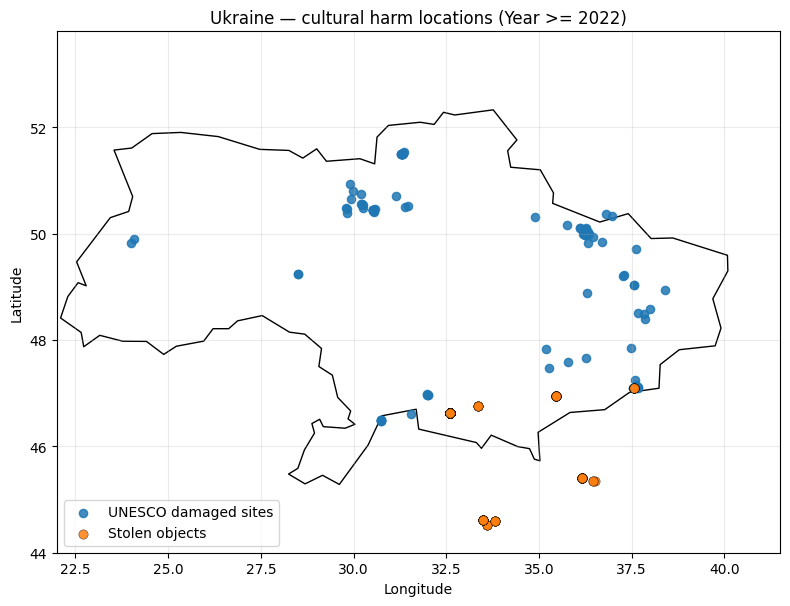

In [ ]:
!pip -q install geopandas shapely pyproj fiona

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re # Needed for extract_lat_lon

# --- Reload and preprocess stolen and unesco dataframes ---
# (copied from initial setup to ensure correct DataFrame objects are used)
URL_STOLEN = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/main/data_stolen/stolen_objects_ukraine_cleaned.csv"
URL_UNESCO = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/main/raw_data/unesco_damage_sites.csv"

stolen = pd.read_csv(URL_STOLEN)
unesco = pd.read_csv(URL_UNESCO)

# UNESCO MINIMAL PREP (relevant for this cell)
unesco["UNESCO_Date"] = pd.to_datetime(unesco.get("Date of damage (first reported)"), errors="coerce")
unesco["UNESCO_Year"] = unesco["UNESCO_Date"].dt.year
if "Geo location" in unesco.columns:
    coords = unesco["Geo location"].astype(str).str.split(",", expand=True)
    if coords.shape[1] >= 2:
        unesco["LAT"] = pd.to_numeric(coords[0].str.strip(), errors="coerce")
        unesco["LON"] = pd.to_numeric(coords[1].str.strip(), errors="coerce")
    else:
        unesco["LAT"] = np.nan
        unesco["LON"] = np.nan
else:
    unesco["LAT"] = np.nan
    unesco["LON"] = np.nan


# STOLEN NORMALIZATION (relevant for this cell)
def extract_lat_lon(gmaps_url):
    if pd.isna(gmaps_url):
        return (np.nan, np.nan)
    s = str(gmaps_url)
    m = re.search(r"[?&]q=([-0-9.]+)\s*,\s*([-0-9.]+)", s)
    if m:
        return (float(m.group(1)), float(m.group(2)))
    m = re.search(r"@([-0-9.]+)\s*,\s*([-0-9.]+)", s)
    if m:
        return (float(m.group(1)), float(m.group(2)))
    return (np.nan, np.nan)

year_incident = pd.to_numeric(stolen["year_incident"], errors="coerce") if "year_incident" in stolen.columns else pd.Series(np.nan, index=stolen.index)
year_timeline = pd.to_numeric(stolen["year_for_timeline"], errors="coerce") if "year_for_timeline" in stolen.columns else pd.Series(np.nan, index=stolen.index)
year_event = year_incident.fillna(year_timeline)
year_event = year_event.where((year_event >= 1900) & (year_event <= 2100))
stolen["year_clean_num"] = year_event

if ("latitude" in stolen.columns) and ("longitude" in stolen.columns):
    stolen["latitude_num"] = pd.to_numeric(stolen["latitude"], errors="coerce")
    stolen["longitude_num"] = pd.to_numeric(stolen["longitude"], errors="coerce")
else:
    if "google_maps_link" in stolen.columns:
        latlon = stolen["google_maps_link"].apply(lambda x: pd.Series(extract_lat_lon(x)))
        stolen["latitude_num"] = pd.to_numeric(latlon[0], errors="coerce")
        stolen["longitude_num"] = pd.to_numeric(latlon[1], errors="coerce")
    else:
        stolen["latitude_num"] = np.nan
        stolen["longitude_num"] = np.nan

# -------------------
# SETTINGS
# -------------------
YEAR_MIN = 2022          # metti None per non filtrare
USE_BBOX = True
ADD_ACLED = False        # <-- metti True se vuoi aggiungere ACLED
ACLED_YEAR_MIN = 2022    # coerente
ACLED_MODE = "two_layers"  # "two_layers" oppure "all_in_one"

def in_ukraine_bbox(lat, lon):
    return (lat >= 44) & (lat <= 53.8) & (lon >= 22) & (lon <= 41.5)

# -------------------
# 1) UNESCO points
# -------------------
unesco_map = unesco.copy()
unesco_map = unesco_map.dropna(subset=["LAT", "LON"])

if YEAR_MIN is not None and "UNESCO_Year" in unesco_map.columns:
    unesco_map = unesco_map[unesco_map["UNESCO_Year"] >= YEAR_MIN]

if USE_BBOX:
    unesco_map = unesco_map[in_ukraine_bbox(unesco_map["LAT"], unesco_map["LON"])]

gdf_unesco = gpd.GeoDataFrame(
    unesco_map,
    geometry=gpd.points_from_xy(unesco_map["LON"], unesco_map["LAT"]),
    crs="EPSG:4326"
)

# -------------------
# 2) STOLEN points
# -------------------
stolen_map = stolen.copy()
stolen_map = stolen_map.dropna(subset=["latitude_num", "longitude_num"])

if YEAR_MIN is not None and "year_clean_num" in stolen_map.columns:
    stolen_map = stolen_map[stolen_map["year_clean_num"] >= YEAR_MIN]

if USE_BBOX:
    stolen_map = stolen_map[in_ukraine_bbox(stolen_map["latitude_num"], stolen_map["longitude_num"])]

gdf_stolen = gpd.GeoDataFrame(
    stolen_map,
    geometry=gpd.points_from_xy(stolen_map["longitude_num"], stolen_map["latitude_num"]),
    crs="EPSG:4326"
)

print("UNESCO points:", len(gdf_unesco), "| STOLEN points:", len(gdf_stolen))

# -------------------
# 3) Ukraine outline (GeoPandas datasets removed → use public Natural Earth GeoJSON)
# -------------------
NE_URL = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(NE_URL).to_crs("EPSG:4326")

# Natural Earth usa spesso 'NAME' come colonna
name_col = "NAME" if "NAME" in world.columns else ("name" if "name" in world.columns else None)
if name_col is None:
    raise ValueError("Could not find country name column in Natural Earth file.")

ukraine = world[world[name_col] == "Ukraine"]

# -------------------
# 4) OPTIONAL: ACLED layer (light)
# -------------------
gdf_acled_destruct = None
gdf_acled_lootctx = None

if ADD_ACLED:
    # `acled` is a DataFrame in the kernel state, so no need to reload or reprocess it.
    # However, for full robustness, if `acled` were also a Series or modified, it would need
    # similar treatment to `stolen` and `unesco` here.
    acled_map = acled.copy()
    acled_map["ACLED_Date"] = pd.to_datetime(acled_map["ACLED_Date"], errors="coerce")

    if ACLED_YEAR_MIN is not None:
        acled_map = acled_map[acled_map["ACLED_Date"].dt.year >= ACLED_YEAR_MIN]

    acled_map = acled_map.dropna(subset=["ACLED_Lat", "ACLED_Lon"])
    if USE_BBOX:
        acled_map = acled_map[in_ukraine_bbox(acled_map["ACLED_Lat"], acled_map["ACLED_Lon"])]

    if ACLED_MODE == "two_layers":
        # destruction context
        acled_destruct = acled_map[acled_map["ACLED_EventType"].isin(["Explosions/Remote violence", "Battles"])].copy()
        # looting/occupation context
        acled_lootctx = acled_map[acled_map["ACLED_EventType"].isin(["Violence against civilians", "Strategic developments"])].copy()

        gdf_acled_destruct = gpd.GeoDataFrame(
            acled_destruct,
            geometry=gpd.points_from_xy(acled_destruct["ACLED_Lon"], acled_destruct["ACLED_Lat"]),
            crs="EPSG:4326"
        )
        gdf_acled_lootctx = gpd.GeoDataFrame(
            acled_lootctx,
            geometry=gpd.points_from_xy(acled_lootctx["ACLED_Lon"], acled_lootctx["ACLED_Lat"]),
            crs="EPSG:4326"
        )
        print("ACLED destruction ctx:", len(gdf_acled_destruct), "| ACLED looting ctx:", len(gdf_acled_lootctx))

    else:
        gdf_acled = gpd.GeoDataFrame(
            acled_map,
            geometry=gpd.points_from_xy(acled_map["ACLED_Lon"], acled_map["ACLED_Lat"]),
            crs="EPSG:4326"
        )
        print("ACLED events:", len(gdf_acled))

# -------------------
# 5) Plot
# -------------------
fig, ax = plt.subplots(figsize=(8, 8))

# outline
ukraine.plot(ax=ax, color="white", edgecolor="black", linewidth=1)

# optional ACLED (very light background)
if ADD_ACLED:
    if ACLED_MODE == "two_layers":
        gdf_acled_destruct.plot(ax=ax, markersize=3, alpha=0.05, label="ACLED: destruction context")
        gdf_acled_lootctx.plot(ax=ax, markersize=3, alpha=0.05, label="ACLED: looting/occupation context")
    else:
        gdf_acled.plot(ax=ax, markersize=3, alpha=0.05, label="ACLED events")

# UNESCO damaged sites
gdf_unesco.plot(ax=ax, markersize=35, alpha=0.85, label="UNESCO damaged sites")

# stolen objects
gdf_stolen.plot(ax=ax, markersize=45, alpha=0.85, label="Stolen objects", edgecolor="black", linewidth=0.3)

title_suffix = f"(Year >= {YEAR_MIN})" if YEAR_MIN is not None else "(All years)"
ax.set_title(f"Ukraine — cultural harm locations {title_suffix}")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(alpha=0.25)
ax.legend(loc="lower left")

# zoom Ukraine
ax.set_xlim(22, 41.5)
ax.set_ylim(44, 53.8)

plt.tight_layout()
plt.show()

ACLED destruction ctx: 160274 | ACLED looting ctx: 12960


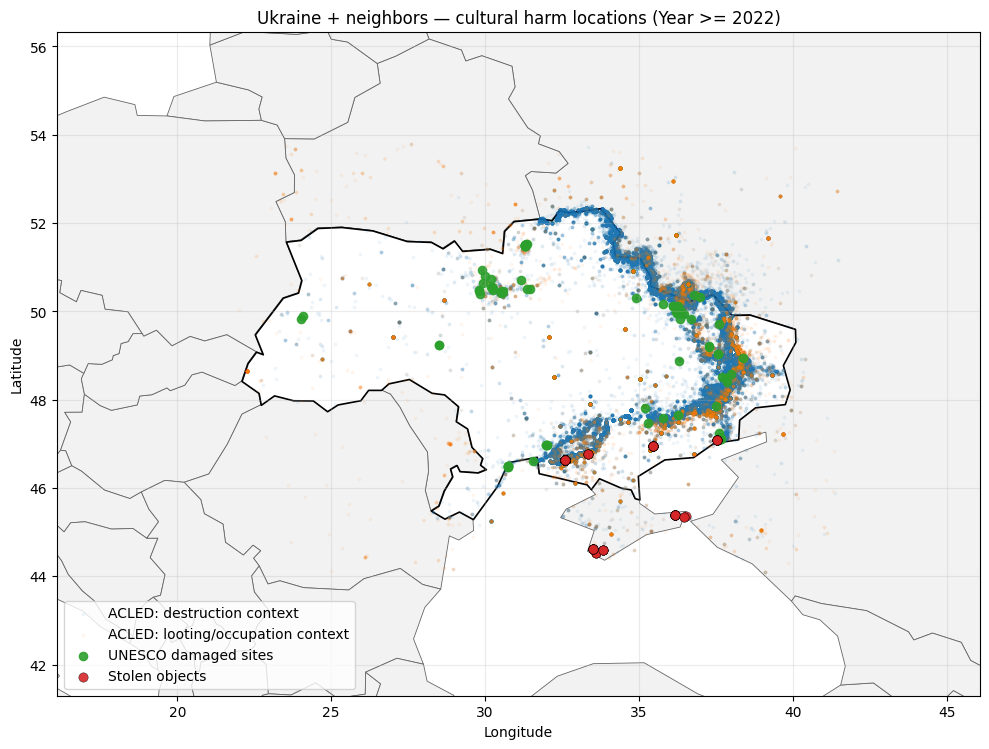

In [ ]:
# --- MAP (context): Ukraine + neighbors + UNESCO + Stolen ---

!pip -q install geopandas shapely pyproj fiona

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point

# -------------------
# SETTINGS
# -------------------
YEAR_MIN = 2022          # None per non filtrare
USE_BBOX = True

ADD_ACLED = True        # True to add ACLED as faint background layers
ACLED_YEAR_MIN = 2022
ACLED_MODE = "two_layers"  # "two_layers" or "all_in_one"

# Outline resolution: "50m" recommended. If you need more detail, use "10m".
# NE_SCALE = "50m"  # "50m" or "10m"

# bbox "larga" Ucraina (per outlier assurdi)
def in_ukraine_bbox(lat, lon):
    return (lat >= 44) & (lat <= 53.8) & (lon >= 22) & (lon <= 41.5)

# -------------------
# 1) Prepare UNESCO points
# -------------------
unesco_map = unesco.copy()
unesco_map = unesco_map.dropna(subset=["LAT", "LON"]).copy()
unesco_map["LAT"] = pd.to_numeric(unesco_map["LAT"], errors="coerce")
unesco_map["LON"] = pd.to_numeric(unesco_map["LON"], errors="coerce")
unesco_map = unesco_map.dropna(subset=["LAT", "LON"])

if YEAR_MIN is not None and "UNESCO_Year" in unesco_map.columns:
    unesco_map = unesco_map[unesco_map["UNESCO_Year"] >= YEAR_MIN]

if USE_BBOX:
    unesco_map = unesco_map[in_ukraine_bbox(unesco_map["LAT"], unesco_map["LON"])]

gdf_unesco = gpd.GeoDataFrame(
    unesco_map,
    geometry=gpd.points_from_xy(unesco_map["LON"], unesco_map["LAT"]),
    crs="EPSG:4326"
)

# -------------------
# 2) Prepare STOLEN points
# -------------------
stolen_map = stolen.copy()
stolen_map = stolen_map.dropna(subset=["latitude_num", "longitude_num"]).copy()
stolen_map["latitude_num"]  = pd.to_numeric(stolen_map["latitude_num"], errors="coerce")
stolen_map["longitude_num"] = pd.to_numeric(stolen_map["longitude_num"], errors="coerce")
stolen_map = stolen_map.dropna(subset=["latitude_num", "longitude_num"])

# sanity check (evita lat/lon scambiate o coordinate rotte)
stolen_map = stolen_map[
    stolen_map["latitude_num"].between(-90, 90) &
    stolen_map["longitude_num"].between(-180, 180)
]

if YEAR_MIN is not None and "year_clean_num" in stolen_map.columns:
    stolen_map = stolen_map[stolen_map["year_clean_num"] >= YEAR_MIN]

if USE_BBOX:
    stolen_map = stolen_map[in_ukraine_bbox(stolen_map["latitude_num"], stolen_map["longitude_num"])]

gdf_stolen = gpd.GeoDataFrame(
    stolen_map,
    geometry=gpd.points_from_xy(stolen_map["longitude_num"], stolen_map["latitude_num"]),
    crs="EPSG:4326"
)

# -------------------
# 3) Load countries (Natural Earth) + get Ukraine polygon
# -------------------
NE_URL = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(NE_URL).to_crs("EPSG:4326")

name_col = "NAME" if "NAME" in world.columns else ("name" if "name" in world.columns else None)
if name_col is None:
    raise ValueError("Could not find country name column in Natural Earth file.")

ukraine = world[world[name_col] == "Ukraine"].copy()
if len(ukraine) == 0:
    raise ValueError("Ukraine polygon not found in Natural Earth file.")

ukr_geom = ukraine.geometry.iloc[0]

# -------------------
# 4) OPTIONAL: ACLED layers (very light background)
# -------------------
gdf_acled_destruct = None
gdf_acled_lootctx = None
gdf_acled = None

if ADD_ACLED:
    acled_map = acled.copy()

    # parse date if needed
    if "ACLED_Date" in acled_map.columns:
        acled_map["ACLED_Date"] = pd.to_datetime(acled_map["ACLED_Date"], errors="coerce")

    # year filter
    if ACLED_YEAR_MIN is not None and "ACLED_Date" in acled_map.columns:
        acled_map = acled_map[acled_map["ACLED_Date"].dt.year >= ACLED_YEAR_MIN]

    # require coords
    acled_map = acled_map.dropna(subset=["ACLED_Lat", "ACLED_Lon"])

    # bbox filter
    if USE_BBOX:
        acled_map = acled_map[in_ukraine_bbox(acled_map["ACLED_Lat"], acled_map["ACLED_Lon"])]

    if ACLED_MODE == "two_layers":
        acled_destruct = acled_map[acled_map["ACLED_EventType"].isin(["Explosions/Remote violence", "Battles"])].copy()
        acled_lootctx = acled_map[acled_map["ACLED_EventType"].isin(["Violence against civilians", "Strategic developments"])].copy()

        gdf_acled_destruct = gpd.GeoDataFrame(
            acled_destruct,
            geometry=gpd.points_from_xy(acled_destruct["ACLED_Lon"], acled_destruct["ACLED_Lat"]),
            crs="EPSG:4326"
        )
        gdf_acled_lootctx = gpd.GeoDataFrame(
            acled_lootctx,
            geometry=gpd.points_from_xy(acled_lootctx["ACLED_Lon"], acled_lootctx["ACLED_Lat"]),
            crs="EPSG:4326"
        )
        print("ACLED destruction ctx:", len(gdf_acled_destruct), "| ACLED looting ctx:", len(gdf_acled_lootctx))
    else:
        gdf_acled = gpd.GeoDataFrame(
            acled_map,
            geometry=gpd.points_from_xy(acled_map["ACLED_Lon"], acled_map["ACLED_Lat"]),
            crs="EPSG:4326"
        )
        print("ACLED events:", len(gdf_acled))


# -------------------
# 5) Create a "context window" (neighbors)
# -------------------
# estendi un po' oltre Ucraina per vedere paesi intorno e mare
minx, miny, maxx, maxy = ukr_geom.bounds
padx, pady = 6.0, 4.0
xlim = (minx - padx, maxx + padx)
ylim = (miny - pady, maxy + pady)

context = world.cx[xlim[0]:xlim[1], ylim[0]:ylim[1]].copy()

# -------------------
# 6) Plot
# -------------------
fig, ax = plt.subplots(figsize=(10, 8))

# neighbors background
context.plot(ax=ax, color="#f2f2f2", edgecolor="#666666", linewidth=0.6)

# highlight Ukraine
ukraine.plot(ax=ax, color="white", edgecolor="black", linewidth=1.2)

# optional ACLED background (very light)
if ADD_ACLED:
    if ACLED_MODE == "two_layers":
        gdf_acled_destruct.plot(ax=ax, markersize=3, alpha=0.05, label="ACLED: destruction context")
        gdf_acled_lootctx.plot(ax=ax, markersize=3, alpha=0.05, label="ACLED: looting/occupation context")
    else:
        gdf_acled.plot(ax=ax, markersize=3, alpha=0.05, label="ACLED events")

# UNESCO
gdf_unesco.plot(
    ax=ax,
    markersize=35,
    alpha=0.9,
    label="UNESCO damaged sites"
)

# STOLEN
gdf_stolen.plot(
    ax=ax,
    markersize=45,
    alpha=0.9,
    label="Stolen objects",
    edgecolor="black",
    linewidth=0.3
)

title_suffix = f"(Year >= {YEAR_MIN})" if YEAR_MIN is not None else "(All years)"
ax.set_title(f"Ukraine + neighbors — cultural harm locations {title_suffix}")

ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(alpha=0.25)
ax.legend(loc="lower left")

plt.tight_layout()
plt.show()


### Map

This map shows the geographical distribution of damage and looting of cultural heritage in Ukraine since 2022, placing cultural data within its actual territorial context.

Four levels of information are represented:
* UNESCO damaged sites (green dots): damaged or destroyed cultural sites;
* Stolen objects (red dots): locations from which cultural objects have been looted;
* ACLED – destruction context (light blue dots): violent events associated with physical destruction (bombings and battles);
* ACLED – looting/occupation context (light orange dots): events associated with violence against civilians and strategic development, indicative of occupation and territorial control.

The map also includes neighbouring countries, making the relationship between territory, borders, sea and occupied areas (in particular Crimea) immediately legible.






**Output**

Main results (spatial reading)
1. Destruction: continuous pattern along front lines:
Damaged cultural sites (green) are mainly distributed along a continuous east–southeast axis, which coincides with the main lines of military intensity.

This distribution visually overlaps with ACLED events of destruction context, confirming that: **the destruction of cultural sites** **occurs** mainly in contexts of **remote violence and bombing**;
the sites affected are not isolated, but **located in areas of systemic military pressure**.

This reinforces the quantitative results showing the prevalence of Explosions / Remote violence as the main mechanism of damage.



2. Looting: localised and coastal clusters

Stolen cultural objects (red) do not follow the same linear pattern as destruction.
On the contrary, they form well-defined geographical clusters, particularly:

* in southern Ukraine;

* in Crimea and coastal areas.

These clusters overlap mainly with ACLED events of looting/occupation context, and much less with direct combat events.
Visually, it emerges that **looting is not linked to the active front** and **occurs in areas of stable territorial control, consistent with phases of occupation**.

3. Spatial separation between destruction and appropriation

The map highlights a clear geographical distinction:

* destruction is widespread, continuous and associated with high-intensity military violence;

* looting is concentrated, localised and associated with contexts of occupation.

This spatial separation supports **the interpretation that destruction and looting are two different forms of cultural damage, with different operational logics**.

## Categories of Cultural damaged sites

* **religious site**: church, cathedral, chapel, house of prayer, monastery, memorial chapel
* **museum**: museum, gallery
* **archive**:
* **library**:
* **education**: university, school
* **building of historical/artistic interest**:
* **monument**:monument, memorial
* **other**:

these categories were already included in the dataset and, in addition, we extracted the following from the site names in the “other” category:

* **theatre / cultural institution**: teatri, house of culture, concert hall

To address inconsistencies in the original categorization, site types were recoded using a controlled semantic mapping based on the official UNESCO labels and the site names themselves. This approach reduces missing values and aligns the analysis with heritage-oriented classifications rather than functional ones.

In [ ]:
unesco["site_type"] = (
    unesco["Type of damanged site"]
    .astype(str)
    .str.lower()
    .str.strip()
)
unesco["title_en"] = unesco["Title of the damage site in English"].astype(str)

# -------------------------
# 1) REMOVE "REGION HEADER" ROWS (the fake NaNs)
# Esempio: "34 sites in the Luhansk Region"
# -------------------------
region_header_pattern = r"^\s*\d+\s+sites\s+in\s+the\s+.+\s+region\s*$"

mask_header = unesco["title_en"].str.lower().str.match(region_header_pattern, na=False)
print("Header rows detected (to remove):", int(mask_header.sum()))

unesco_clean = unesco.loc[~mask_header].copy()
unesco_clean = unesco[
    unesco["site_type"].notna() &
    (unesco["site_type"] != "") &
    (unesco["site_type"] != "other")
].copy()
site_type_counts = (
    unesco_clean
    .groupby("site_type")
    .size()
    .sort_values(ascending=False)
    .reset_index(name="damaged_sites")
)

site_type_counts


Header rows detected (to remove): 0


site_type  damaged_sites
0                                   religious site            128
1                                         monument             50
2  building of historical and/or artistic interest             47
3                                           museum             31
4                                        education             19
5                                              nan             18
6                                          library             13
7                                          archive              1

In the column ‘Unanamed 0’ there are lines such as 0 22 sites in the Chernihiv Region that cause a high number of nans in the categories.


In [ ]:
import re

header_col = "Unnamed: 0"

region_header_pattern = r"^\s*\d+\s+site(?:s)?\s+in\s+(?:the\s+)?.+?\s+region\s*$"

mask_header = (
    unesco[header_col]
    .astype(str)
    .str.strip()
    .str.match(region_header_pattern, flags=re.IGNORECASE, na=False)
)

print("Header rows detected (to remove):", int(mask_header.sum()))
print(unesco.loc[mask_header, header_col].head(20))

unesco_clean = unesco.loc[~mask_header].copy()


Header rows detected (to remove): 14
0          22 sites in the Chernihiv Region
23              40 sites in the Kyiv Region
64           56 sites in the Kharkiv Region
121     13 sites in the Zaporizhzhya Region
135          3 sites in the Zhytomyr Region
139          90 sites in the Donetsk Region
230          34 sites in the Luhansk Region
265             12 sites in the Sumy Region
278          9 sites in the Mykolaiv region
288         2 sites in the Vinnytsya region
291            49 sites in the Odesa region
341    2 site in the Dnipropetrovs’k region
344          11 sites in the Kherson region
361              3 sites in the Lviv region
Name: Unnamed: 0, dtype: object


keep the UNESCO categories + add
* **theatre / cultural institution**: theatres, houses of culture, concert halls

In [ ]:

def recode_type(row):
    raw = row["site_type"]
    title = str(row["title_en"]).lower()

    # ---- explicit keywords in title (override missing/raw) ----
    # religious
    if any(k in title for k in ["church", "cathedral", "chapel", "monastery", "house of prayer"]):
        return "religious site"

    # theatre / cultural institution
    if any(k in title for k in ["theatre", "theater", "concert hall", "house of culture", "philharmonic"]):
        return "theatre / cultural institution"

    # education
    if any(k in title for k in ["academy", "university", "conservatory"]):
        return "education"

    # museums / libraries / archives
    if "museum" in title or "gallery" in title:
        return "museum"
    if "library" in title:
        return "library"
    if "archive" in title:
        return "archive"

    # archaeological
    if "archaeological" in title:
        return "archaeological site"

    # ---- use raw when present ----
    if isinstance(raw, str) and raw not in [None, np.nan]:
        # normalize some UNESCO labels
        if raw in ["religious site", "museum", "library", "archive", "monument", "archaeological site", "education"]:
            return raw

        # "architectural monument of local importance" -> historical/artistic interest
        # (intercetta i casi tipo "Residential buildings ... (architectural monument...)")
        if "architectural" in title and "monument of local importance" in title:
            return "building of historical and/or artistic interest"

        if "building of historical" in raw:
            return "building of historical and/or artistic interest"

        # if raw says "other" keep it for now (but we can move some by title above)
        if raw == "other":
            return "other"

        # fallback: keep raw (rare)
        return raw

    # ---- if still missing ----
    # if architectural monument appears but raw missing
    if "architectural" in title and "monument of local importance" in title:
        return "building of historical and/or artistic interest"

    return "other"

unesco_clean["site_type_clean"] = unesco_clean.apply(recode_type, axis=1)

# -------------------------
# 3) OPTIONAL: Deduplicate obvious duplicates (like Shah Palace)
# Strategy: same (title_en + date + region) keep first
# You can turn OFF by setting DEDUP=False
DEDUP = True
if DEDUP:
    # build a stable key
    unesco_clean["dedup_key"] = (
        unesco_clean["title_en"].str.lower().str.strip()
        + " | " + unesco_clean["Region"].astype(str).str.lower().str.strip()
        + " | " + unesco_clean["Date of damage (first reported)"].astype(str).str.strip()
    )
    before = len(unesco_clean)
    unesco_clean = unesco_clean.drop_duplicates(subset=["dedup_key"], keep="first").copy()
    print("Dedup removed:", before - len(unesco_clean))

# -------------------------
# 4) COUNTS
# -------------------------
site_type_counts = (
    unesco_clean
    .groupby("site_type_clean")
    .size()
    .sort_values(ascending=False)
    .reset_index(name="damaged_sites")
)

print(site_type_counts)



Dedup removed: 0
                                   site_type_clean  damaged_sites
0                                   religious site            129
1                                         monument             50
2  building of historical and/or artistic interest             43
3                   theatre / cultural institution             31
4                                           museum             31
5                                            other             30
6                                        education             21
7                                          library             14
8                                          archive              1
9                                              nan              1


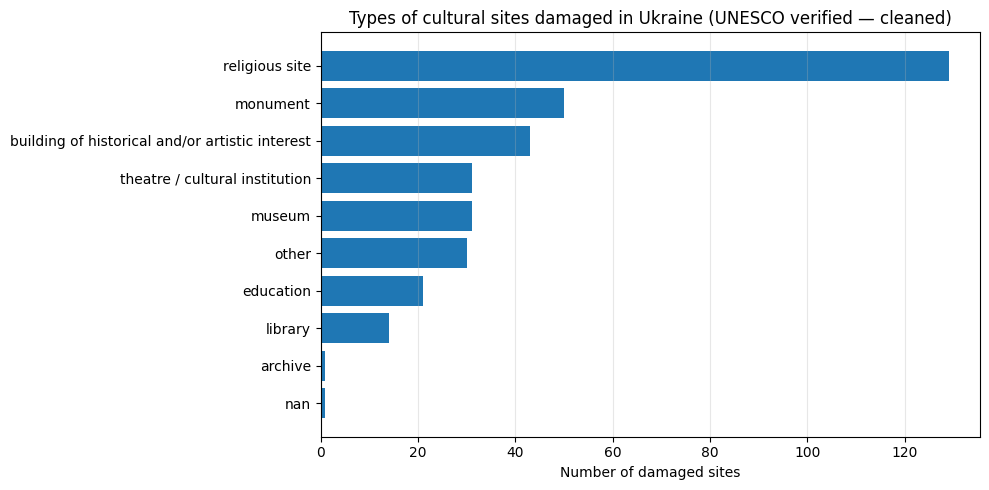

In [ ]:
# -------------------------
# 5) PLOT
# -------------------------
plt.figure(figsize=(10,5))
plt.barh(site_type_counts["site_type_clean"], site_type_counts["damaged_sites"])
plt.xlabel("Number of damaged sites")
plt.title("Types of cultural sites damaged in Ukraine (UNESCO verified — cleaned)")
plt.gca().invert_yaxis()
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

## Understanding which historical period the destroyed sites relate to

---


| Historical period                                                  | Years        |
| ------------------------------------------------------------------ | ------------ |
| **Kyivan Rus’**                                                    | 839–1054     |
| **Post-Kyivan Rus’ / Galicia–Volhynia and regional fragmentation** | 1054–1200    |
| **Mongol invasion and fragmented domination**                      | 1239–1600    |
| **Cossack Hetmanate**                                              | 1648–1764    |
| **Russian Empire**                                                 | 1764–1917    |
| **Early Independence**                                             | 1917–1921    |
| **Soviet period**                                                  | 1921–1991    |
| **Independent Ukraine**                                            | 1991–present |


Kyivan Rus’ (839–1054) represents the earliest East Slavic state, with Kyiv as its political and cultural center.
Following its decline, the territory entered a phase of political fragmentation (1054–1200), characterized by independent principalities such as Galicia–Volhynia, Chernihiv, Pereiaslav, and Kyiv. Notably, this period marks the first recorded use of the name Ukraine, referring to the Pereiaslav region.

From the Mongol invasion (1239) onward, the territorial unity of the region collapsed. Between the 13th and 16th centuries, Ukrainian lands were contested and governed by multiple powers, including the Golden Horde, the Polish–Lithuanian Commonwealth, the Ottoman Empire, and emerging Russian influence. This phase is therefore treated as a single period of fragmented domination.

The Cossack Hetmanate (1648–1764) emerged as a semi-autonomous political entity following the Khmelnytsky Uprising, before being gradually dismantled and incorporated into the Russian Empire, a process completed with the destruction of the Zaporizhian Sich in 1775.

After the collapse of the Russian Empire in 1917, Ukraine experienced a short-lived phase of early independence (1917–1921), followed by incorporation into the Soviet Union (1921–1991).
Since 1991, Ukraine has existed as an independent state.

This periodization allows us to analyze whether the destruction of cultural heritage disproportionately affects sites associated with specific historical layers of Ukrainian identity.


In [ ]:
import re
import numpy as np
import pandas as pd

def extract_year_built(text):
    """
    Estrae un anno di costruzione approssimato da:
    - anno preciso (1850)
    - range (1851–1852 → 1851)
    - secolo (XIXth century → 1850)

    Restituisce NaN se non interpretabile.
    """
    if pd.isna(text):
        return np.nan

    s = str(text).lower()

    # --- 1) anno a 4 cifre (priorità massima) ---
    m = re.search(r"\b(1[0-9]{3}|20[0-2][0-9])\b", s)
    if m:
        year = int(m.group(1))
        if 800 <= year <= 2025:
            return float(year)

    # --- 2) secoli (approssimazione controllata) ---
    if "xix" in s or "19th century" in s:
        return 1850
    if "xviii" in s or "18th century" in s:
        return 1750
    if "xx" in s or "20th century" in s:
        return 1950
    if "xvii" in s or "17th century" in s:
        return 1650
    if "xvi" in s or "16th century" in s:
        return 1550

    return np.nan
unesco["year_built_num"] = unesco["Year of construction"].apply(extract_year_built)

def historical_period(year):
    if pd.isna(year):
        return np.nan
    year = int(year)

    if year <= 1054:
      return "Kyivan Rus’ (839–1054)"
    elif year <= 1200:
        return "Galicia–Volhynia / Ruthenia (1054–1200)"
    elif year <= 1600:
        return "Mongol invasion & divided domination (1239–1600)"
    elif year <= 1764:
        return "Cossack Hetmanate (1648–1764)"
    elif year <= 1917:
        return "Russian Empire (1764–1917)"
    elif year <= 1921:
        return "Early Independence (1917–1921)"
    elif year <= 1991:
        return "Soviet period (1921–1991)"
    else:
        return "Independent Ukraine (1991–present)"

unesco["historical_period"] = unesco["year_built_num"].apply(historical_period)

period_counts = (
    unesco
    .dropna(subset=["historical_period"])
    .groupby("historical_period")
    .size()
    .reset_index(name="damaged_sites")
    .sort_values("damaged_sites", ascending=False)
)

period_counts


historical_period  damaged_sites
4                        Russian Empire (1764–1917)             67
5                         Soviet period (1921–1991)             46
2                Independent Ukraine (1991–present)             44
0                     Cossack Hetmanate (1648–1764)              4
1                    Early Independence (1917–1921)              4
3  Mongol invasion & divided domination (1239–1600)              1

The year of construction was extracted using a hierarchical approach: exact years and year ranges were prioritized, while century-based descriptions were converted into approximate mid-century values. Records without interpretable temporal information were excluded to avoid arbitrary classification.

In [ ]:
total_sites = len(unesco)
with_year = unesco["year_built_num"].notna().sum()
without_year = total_sites - with_year
total_sites, with_year, without_year

total_sites, with_year, without_year
unesco["historical_period"].value_counts(dropna=False)

historical_period
NaN                                                 199
Russian Empire (1764–1917)                           67
Soviet period (1921–1991)                            46
Independent Ukraine (1991–present)                   44
Early Independence (1917–1921)                        4
Cossack Hetmanate (1648–1764)                         4
Mongol invasion & divided domination (1239–1600)      1
Name: count, dtype: int64

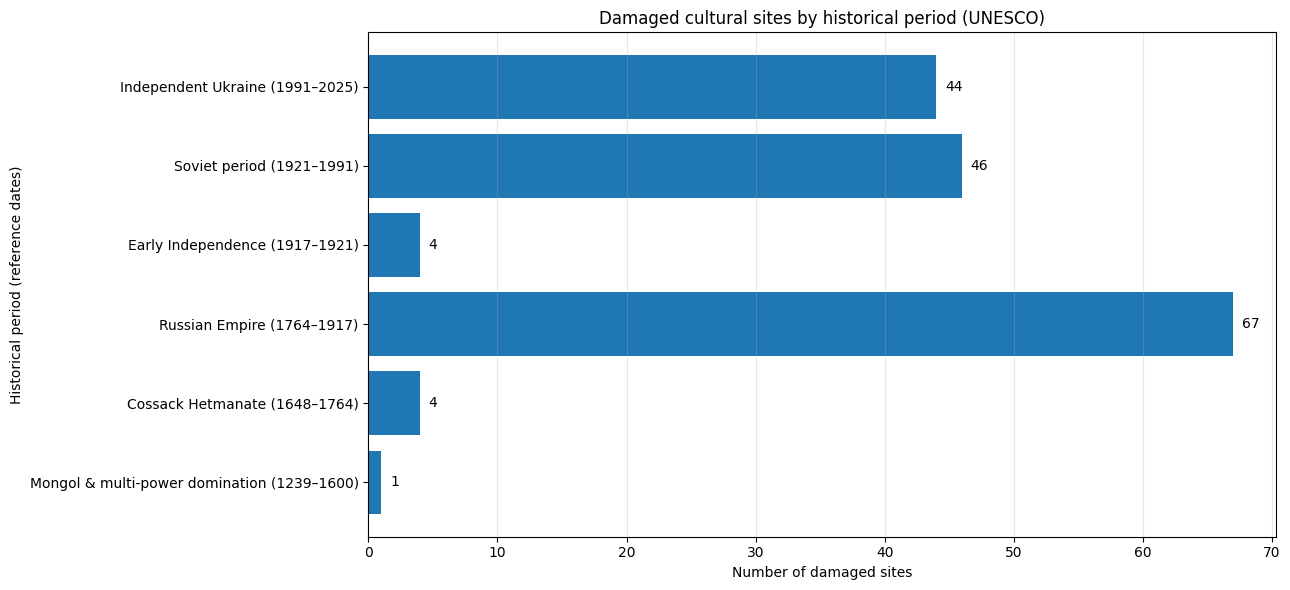

Coverage (construction year parsed): 166/365 (45.5%)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

plt.style.use("default")

# ------------------------------------------------------------
# 1) Extract a usable construction year (handles years, ranges, centuries)
# ------------------------------------------------------------
def extract_year_extended(text):
    if pd.isna(text):
        return np.nan
    s = str(text).strip().lower()

    # a) ranges like "1851–1852" or "1851-1852" → take first year
    m = re.search(r"\b(1[0-9]{3}|20[0-2][0-9])\s*[–-]\s*(1[0-9]{3}|20[0-2][0-9])\b", s)
    if m:
        return float(m.group(1))

    # b) explicit 4-digit year anywhere
    m = re.search(r"\b(1[0-9]{3}|20[0-2][0-9])\b", s)
    if m:
        return float(m.group(1))

    # c) centuries (very approximate mid-century)
    #    examples: "xixth century", "19th century", "end of xix - beginning of xx"
    if ("xix" in s) or ("19th century" in s) or ("19 century" in s):
        return 1850.0
    if ("xviii" in s) or ("18th century" in s) or ("18 century" in s):
        return 1750.0
    if ("xxi" in s) or ("21st century" in s) or ("21 century" in s):
        return 2010.0
    if ("xx" in s) or ("20th century" in s) or ("20 century" in s):
        return 1950.0

    return np.nan

unesco["year_built_num_ext"] = unesco["Year of construction"].apply(extract_year_extended)
unesco["year_built_num_ext"] = unesco["year_built_num_ext"].where(
    (unesco["year_built_num_ext"] >= 800) & (unesco["year_built_num_ext"] <= 2025)
)

# ------------------------------------------------------------
# 2) New Ukrainian historical periodization (your updated scheme)
# ------------------------------------------------------------
def historical_period_ua(year):
    if pd.isna(year):
        return np.nan
    y = int(year)

    if y <= 1054:
        return "Kyivan Rus’ (839–1054)"
    elif y <= 1200:
        return "Galicia–Volhynia & fragmentation (1054–1200)"
    elif y <= 1600:
        return "Mongol & multi-power domination (1239–1600)"
    elif y <= 1764:
        return "Cossack Hetmanate (1648–1764)"
    elif y <= 1917:
        return "Russian Empire (1764–1917)"
    elif y <= 1921:
        return "Early Independence (1917–1921)"
    elif y <= 1991:
        return "Soviet period (1921–1991)"
    else:
        return "Independent Ukraine (1991–2025)"

unesco["historical_period_new"] = unesco["year_built_num_ext"].apply(historical_period_ua)

# Counts
period_counts_new = (
    unesco.dropna(subset=["historical_period_new"])
         .groupby("historical_period_new")
         .size()
         .reset_index(name="damaged_sites")
)

# Explicit order (so the chart follows the timeline)
order_new = [
    "Kyivan Rus’ (839–1054)",
    "Galicia–Volhynia & fragmentation (1054–1200)",
    "Mongol & multi-power domination (1239–1600)",
    "Cossack Hetmanate (1648–1764)",
    "Russian Empire (1764–1917)",
    "Early Independence (1917–1921)",
    "Soviet period (1921–1991)",
    "Independent Ukraine (1991–2025)"
]
period_counts_new["historical_period_new"] = pd.Categorical(
    period_counts_new["historical_period_new"], categories=order_new, ordered=True
)
period_counts_new = period_counts_new.sort_values("historical_period_new")

# ------------------------------------------------------------
# 3) BAR CHART (with dates already in the labels)
# ------------------------------------------------------------
plt.figure(figsize=(13, 6))
bars = plt.barh(period_counts_new["historical_period_new"], period_counts_new["damaged_sites"])

plt.title("Damaged cultural sites by historical period (UNESCO)")
plt.xlabel("Number of damaged sites")
plt.ylabel("Historical period (reference dates)")
plt.grid(axis="x", alpha=0.3)

# value labels
maxv = period_counts_new["damaged_sites"].max()
for b in bars:
    w = b.get_width()
    plt.text(w + maxv*0.01, b.get_y() + b.get_height()/2, f"{int(w)}", va="center")

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 4) Coverage print (how many sites got a construction year we could parse)
# ------------------------------------------------------------
total = len(unesco)
parsed = unesco["year_built_num_ext"].notna().sum()
print(f"Coverage (construction year parsed): {parsed}/{total} ({parsed/total*100:.1f}%)")


**Output**

This pattern reflects two intertwined dynamics.

First, sites from the imperial, Soviet, and post-1991 periods constitute a large share of Ukraine’s built cultural heritage, especially religious buildings, monuments, and public institutions located in urban centers.

Second, these periods correspond to key moments in the formation and contestation of Ukrainian national identity:

Imperial-era sites reflect processes of incorporation into the Russian Empire and subsequent policies of centralization and cultural hierarchy.

Soviet-era heritage embodies both repression and institutionalized culture, often framed within a shared but uneven Soviet narrative.

Sites from Independent Ukraine represent the most explicit expressions of post-Soviet national sovereignty and cultural self-definition.

The concentration of damage across these layers suggests that cultural harm disproportionately affects historical strata where identity, memory, and political belonging are most visibly articulated.


#**Linked4Resilience: Dataset scope and reliability**

Linked4Resilience (L4R) is a research knowledge graph and it aggregates cultural-damage mentions from multiple open sources (news, public reports, and open datasets) and represents them as documented mentions (e.g., links to articles or Wikipedia pages) rather than institutionally validated records.

data source: https://zenodo.org/records/14569340

UNESCO reports 351 damaged cultural properties, but L4R includes only 211 because it applies strict data-quality filters. L4R keeps only records that can be unambiguously identified and reliably geolocated, which is essential for a geo-centric knowledge graph and for spatial joins.

The main exclusion criteria are:
- Unresolvable name ambiguity: if a label matches multiple places and available information is insufficient to identify the damaged one, the entry is excluded.
This quality-first choice reduces geocoding and reconciliation errors, but it introduces bias against generic names (e.g., “St Andrew’s Church – Kharkiv”).

- No verifiable location: if no reliable coordinates or address can be determined, the entry is excluded. Even verified damage reports may lack precise geolocation. However, without stable geo information the record cannot support mapping and spatial analysis, so it is discarded.

- Unstable or contradictory location over time
If the location changes repeatedly or remains uncertain during annotation, the entry is excluded. This removes noisy records, but it may also filter out real institutions with multiple sites or relocations, cases that are true but hard to model.


In [ ]:
!pip install rdflib requests -q

import requests
import pandas as pd
import re
import os
from rdflib import Dataset

# GitHub URL for the .trig file
PATH_L4R_TRIG_URL = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/raw_data/https___linked4resilience.eu_graphs_cultural-site-damage-events.trig"

LOCAL_TRIG_PATH = "cultural-site-damage-events.trig"

OUTPUT_DIR = "DisperseArt_InformationVisualization/csv"
OUTPUT_FILE = "cultural_damage_L4R.csv"
OUTPUT_PATH = os.path.join(OUTPUT_DIR, OUTPUT_FILE)

def download_file(url, local_path):
    """Downloads a file from a URL to a local path."""
    if not os.path.exists(local_path):
        print(f"Downloading file from GitHub...")
        response = requests.get(url)
        if response.status_code == 200:
            with open(local_path, 'wb') as f:
                f.write(response.content)
            print("✓ Download complete.")
        else:
            print(f"Error: Failed to download file. Status code: {response.status_code}")
            return False
    return True

def extract_linked4resilience_data(path):
    """Parses a local .trig file and extracts metadata using SPARQL."""
    if not os.path.exists(path):
        print(f"Error: Local file not found at {path}")
        return pd.DataFrame()

    g = Dataset()
    g.parse(path, format="trig")
    print(f"✓ Successfully parsed {len(g)} triples from the knowledge graph.")

    query = """
    PREFIX geo: <http://www.opengis.net/ont/geosparql#>
    PREFIX schema: <https://schema.org/>
    PREFIX vocab: <https://linked4resilience.eu/vocab/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

    SELECT ?site ?name ?address ?observationYear ?comment ?wikiUA ?newsLink ?wkt
    WHERE {
      GRAPH ?g {
        ?site geo:hasGeometry ?geom .
        ?geom geo:asWKT ?wkt .
        OPTIONAL { ?site schema:name ?name . }
        OPTIONAL { ?site schema:address ?address . }
        OPTIONAL { ?site schema:observationTime ?observationYear . }
        OPTIONAL { ?site rdfs:comment ?comment . }
        OPTIONAL { ?site vocab:wikipediaUkrainian ?wikiUA . }
        OPTIONAL { ?site vocab:wasMentionedIn ?newsLink . }
      }
    }
    """

    results = g.query(query)
    extracted_records = []

    for row in results:
        # Extract Lat/Lon from WKT string: "POINT(lon lat)"
        wkt_text = str(row["wkt"])
        lon, lat = None, None
        coord_match = re.search(r"POINT\s*\(\s*([-0-9\.]+)\s+([-0-9\.]+)\s*\)", wkt_text, flags=re.IGNORECASE)
        if coord_match:
            lon, lat = float(coord_match.group(1)), float(coord_match.group(2))

        extracted_records.append({
            "URI": str(row["site"]),
            "Site_Name": str(row["name"]) if row["name"] else None,
            "Address": str(row["address"]) if row["address"] else None,
            "Observation_Year": str(row["observationYear"]) if row["observationYear"] else None,
            "Comment": str(row["comment"]) if row["comment"] else None,
            "Wiki_UA_Link": str(row["wikiUA"]) if row["wikiUA"] else None,
            "News_Link": str(row["newsLink"]) if row["newsLink"] else None,
            "Latitude": lat,
            "Longitude": lon
        })

    return pd.DataFrame(extracted_records)


if download_file(PATH_L4R_TRIG_URL, LOCAL_TRIG_PATH):

    df_l4r = extract_linked4resilience_data(LOCAL_TRIG_PATH)

    if not df_l4r.empty:
        if not os.path.exists(OUTPUT_DIR):
            os.makedirs(OUTPUT_DIR)
            print(f"✓ Directory created: {OUTPUT_DIR}")

        df_l4r.to_csv(OUTPUT_PATH, index=False)
        print(f"✓ L4R Metadata Extraction Complete: {df_l4r.shape[0]} entities saved to {OUTPUT_PATH}")

        display(df_l4r.head(3))
    else:
        print("Error: DataFrame is empty. Check the .trig file parsing.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.2/587.2 kB 5.2 MB/s eta 0:00:00
✓ Download complete.
✓ Successfully parsed 2910 triples from the knowledge graph.
✓ Directory created: DisperseArt_InformationVisualization/csv
✓ L4R Metadata Extraction Complete: 227 entities saved to DisperseArt_InformationVisualization/csv/cultural_damage_L4R.csv


URI  \
0  https://linked4resilience.eu/data/cultural-sit...   
1  https://linked4resilience.eu/data/cultural-sit...   
2  https://linked4resilience.eu/data/cultural-sit...   

                          Site_Name  \
0  St. Nicholas Church  - Borivs'ke   
1   Library branch n°1 – Chasiv Yar   
2   House of Culture – Vysokopillya   

                                             Address Observation_Year  \
0                    Borivske, Luhansk region, 93493             None   
1  г. Часов Яр, ул. Целинников, 2, Vulytsya Horʹk...             2023   
2  Vyzvolyteliv St, 55, Vysokopillya, Kherson Obl...             2022   

                             Comment Wiki_UA_Link  \
0         not sure about the damages         None   
1  Completely destroyed city/village         None   
2                               None         None   

                                           News_Link   Latitude  Longitude  
0  https://telegazeta.com.ua/content/yak-ros-yani...  48.861715  38.555127  
1                                               None  48.586222  37.834087  
2  https://suspilne.media/kherson/308338-visokopi...  47.498092  33.528664

# **UNESCO and ICOM Protection Analysis**


**How effective is international heritage protection when cultural heritage is exposed to large-scale warfare?**

This visualization addresses the “protection gap” between what is formally recognized by UNESCO (World Heritage List and Tentative List) and what is actually reported as damaged on the ground.

UNESCO lists represent a selective and institutional definition of  heritage, shaped by long-term nomination and evaluation processes. Damage reports, by contrast, describe a much broader set of cultural entities affected by conflict, including many sites without international designation.

By putting the two registers on the same visual scale, the chart makes a structural asymmetry immediately visible: a limited number of protected sites versus a much larger number of damaged sites that fall outside UNESCO’s scope.

This visualization combines two institutional datasets: UNESCO protection lists (World Heritage and Tentative List) and Linked4Resilience selected reports of damaged cultural sites in Ukraine

In [ ]:
import pandas as pd
import altair as alt

URL_UNESCO_PROTETTI = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/processed_data/2_ukraine_list_qid_coord.csv"
URL_UNESCO_DANNEGGIATI = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/processed_data/cultural_damage_l4R_wiki_enriched.csv"

GRID_COLUMNS = 21

MACRO_COLORS = {
    "UNESCO protection": "#F1C40F",
    "Unprotected damaged sites": "#2471A3"
}
MACRO_ORDER = list(MACRO_COLORS.keys())

DAMAGE_CATEGORY_LABELS = [
    "Religious Heritage",
    "Museums & Arts",
    "Libraries & Archives",
    "Other Historic Sites",
]

def map_damage_category(row):
    text = f"{row.get('name','')} {row.get('instance_of_label','')} {row.get('Title of the damage site in English','')}".lower()
    if any(k in text for k in ["religious", "church", "cathedral", "monastery", "собор"]):
        return "Religious Heritage"
    if any(k in text for k in ["museum", "музей", "gallery"]):
        return "Museums & Arts"
    if any(k in text for k in ["library", "archive"]):
        return "Libraries & Archives"
    return "Other Historic Sites"

df_p = pd.read_csv(URL_UNESCO_PROTETTI, sep=";")
df_p["category"] = df_p["category"].str.strip()

df_d = pd.read_csv(URL_UNESCO_DANNEGGIATI)
df_d["mapped_cat"] = df_d.apply(map_damage_category, axis=1)

waffle = []

for _, r in df_p.iterrows():
    waffle.append({
        "name": r["name"],
        "macro": "UNESCO protection",
        "damage_cat": "",
        "status": "Protected"
    })

for _, r in df_d.iterrows():
    waffle.append({
        "name": r.get("name") or r.get("Title of the damage site in English"),
        "macro": "Unprotected damaged sites",
        "damage_cat": r["mapped_cat"],
        "status": "Damaged"
    })

df = pd.DataFrame(waffle)

df["macro"] = pd.Categorical(df["macro"], MACRO_ORDER, ordered=True)
df["damage_cat"] = pd.Categorical(df["damage_cat"], DAMAGE_CATEGORY_LABELS, ordered=True)
df = df.sort_values(["macro", "damage_cat"]).reset_index(drop=True)

df["idx"] = range(len(df))
df["x"] = df["idx"] % GRID_COLUMNS
df["y"] = df["idx"] // GRID_COLUMNS

damage_filter = alt.param(
    name="damage_filter",
    bind=alt.binding_radio(
        options=["None"] + DAMAGE_CATEGORY_LABELS,
        name="Highlight damaged type:"
    ),
    value="None"
)

chart = (
    alt.Chart(df)
    .add_params(damage_filter)
    .transform_calculate(
        opacity_expr="damage_filter == 'None' || datum.status != 'Damaged' || datum.damage_cat == damage_filter ? 1 : 0.25"
    )
    .mark_square(size=380)
    .encode(
        x=alt.X("x:O", axis=None),
        y=alt.Y("y:O", axis=None),
        color=alt.Color(
            "macro:N",
            scale=alt.Scale(domain=MACRO_ORDER, range=list(MACRO_COLORS.values())),
            legend=None
        ),
        opacity=alt.Opacity("opacity_expr:Q", scale=None),
        tooltip=[
            alt.Tooltip("name:N", title="Site"),
            alt.Tooltip("macro:N", title="Protection"),
            alt.Tooltip("damage_cat:N", title="Type"),
            alt.Tooltip("status:N", title="Status"),
        ]
    )
    .properties(width=550, height=550, background="white")
    .configure_view(strokeWidth=0)
)

chart


alt.Chart(...)

The central ambition of this analysis is to evaluate the real-world efficacy of international protection. UNESCO maintains that the World Heritage designation provides a layer of safety and visibility to cultural landmarks. However, in the context of the invasion of Ukraine, does this legal "shield" actually translate into physical immunity, or is it merely a bureaucratic label?

The analysis begins by assessing whether UNESCO-protected sites and the dataset of damaged cultural sites refer to the same entities, using Wikidata QIDs as a matching key. To be even more throughout we decided to cross UNESCO dataset too thinking it could provide more precise QID reconciliation matches in the reconciliation process.


In [ ]:
import pandas as pd

URL_UNESCO_LIST = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/processed_data/2_ukraine_list_qid_coord.csv"
URL_UNESCO_DAMAGED = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/processed_data/unesco-damage-sites-qid.csv"
URL_L4R = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/processed_data/cultural_damage_l4R_wiki_enriched.csv"


def run_matching_analysis():
    print("Avvio caricamento dati con correzione separatori...")

    try:
        # Specifichiamo sep=';' per la lista UNESCO perché il tuo file usa quel formato
        df_u_list = pd.read_csv(URL_UNESCO_LIST, sep=';', on_bad_lines='skip')

        # Per gli altri, manteniamo la ricerca automatica del separatore
        df_u_damaged = pd.read_csv(URL_UNESCO_DAMAGED, sep=None, engine='python', on_bad_lines='skip')
        df_l4r = pd.read_csv(URL_L4R, sep=None, engine='python', on_bad_lines='skip')

        print("✓ Caricamento completato correttamente.")
    except Exception as e:
        print(f"Errore nel caricamento: {e}")
        return

    # --- 2. FUNZIONE DI ESTRAZIONE MIGLIORATA ---
    def extract_qids(df, column):
        # Cerchiamo la colonna ignorando maiuscole e spazi
        actual_col = None
        for c in df.columns:
            if c.strip().lower() == column.lower():
                actual_col = c
                break

        if not actual_col:
            print(f"Colonna '{column}' non trovata. Disponibili: {list(df.columns)[:3]}...")
            return set()

        # Pulizia: rimuove spazi, converte in stringa e tiene solo valori che iniziano con 'Q'
        qids = df[actual_col].astype(str).str.strip()
        return set(qids[qids.str.contains('Q', na=False)].unique())

    # --- 3. ESECUZIONE MATCHING ---
    qids_world_heritage = extract_qids(df_u_list, 'QID')
    qids_unesco_dmg = extract_qids(df_u_damaged, 'qid')
    qids_l4r_dmg = extract_qids(df_l4r, 'wikidata_id')

    matches_unesco = qids_world_heritage.intersection(qids_unesco_dmg)
    matches_l4r = qids_world_heritage.intersection(qids_l4r_dmg)


    print(f"Siti UNESCO World Heritage totali: {len(qids_world_heritage)}")
    print(f"Siti Danneggiati (UNESCO Report):   {len(qids_unesco_dmg)}")
    print(f"Siti Danneggiati (L4R Local):     {len(qids_l4r_dmg)}")
    print("-" * 45)
    print(f"➤ Match UNESCO-UNESCO: {len(matches_unesco)}")
    print(f"➤ Match UNESCO-L4R:    {len(matches_l4r)}")
    print("="*45)

run_matching_analysis()

Avvio caricamento dati con correzione separatori...
✓ Caricamento completato correttamente.
Siti UNESCO World Heritage totali: 24
Siti Danneggiati (UNESCO Report):   49
Siti Danneggiati (L4R Local):     194
---------------------------------------------
➤ Match UNESCO-UNESCO: 0
➤ Match UNESCO-L4R:    0


This initial comparison yields no direct matches, suggesting that, at the level of linked identifiers, the three datasets describe distinct sets of sites. However, this result cannot be interpreted as definitive evidence that protected sites were not affected.

QID reconciliation, performed using OpenRefine, is sensitive to incomplete records, partial matches, and ambiguities in site names, especially in multilingual and conflict-related datasets. As a consequence, the absence of shared identifiers may reflect limitations of the reconciliation process rather than an actual lack of overlap.

To address this uncertainty, the analysis is extended through a spatial matching approach. Instead of relying on identifiers, sites are compared using geographic coordinates.

Since the official UNESCO endangered heritage dataset does not provide coordinates, these are retrieved through SPARQL queries to Wikidata.

Key Technical Actions:

- SPARQL-based coordinate enrichment: the script queries Wikidata (property P625) to retrieve missing coordinates for UNESCO sites identified by QIDs.
- Identifier validation and deduplication: QIDs are filtered for validity (must be strings starting with “Q”) and queried as a unique list to reduce redundant requests.
- Format normalization (WKT → “lat, lon”): Wikidata returns coordinates as Point(lon lat); the script parses and reorders them into a consistent "lat, lon" string.

In [ ]:
import pandas as pd
import requests
import io
from google.colab import files

URL_RAW_INPUT = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/processed_data/unesco_ukraine_lists_qid.csv"

def get_wikidata_coordinates(qids):
    """Interroga Wikidata per ottenere le coordinate (P625) di una lista di QID."""
    endpoint_url = "https://query.wikidata.org/sparql"

    # Pulizia e validazione QID
    valid_qids = [q for q in qids if isinstance(q, str) and q.startswith('Q')]
    if not valid_qids:
        return {}

    # Formattazione per la query SPARQL
    qid_formatted = " ".join([f"wd:{q}" for q in valid_qids])

    query = f"""
    SELECT ?item ?coords WHERE {{
      VALUES ?item {{ {qid_formatted} }}
      ?item wdt:P625 ?coords.
    }}
    """

    headers = {
        'User-Agent': 'UNESCO-Bot/1.0 (https://example.org/; user@example.com)',
        'Accept': 'application/sparql-results+json'
    }

    try:
        response = requests.get(endpoint_url, params={'query': query, 'format': 'json'}, headers=headers)
        response.raise_for_status()
        data = response.json()

        results = {}
        for row in data['results']['bindings']:
            qid = row['item']['value'].split('/')[-1]
            # Wikidata restituisce: Point(long lat). Convertiamo in "lat, lon"
            raw_coords = row['coords']['value'].replace('Point(', '').replace(')', '')
            lon, lat = raw_coords.split(' ')
            results[qid] = f"{lat}, {lon}"
        return results
    except Exception as e:
        print(f"Errore durante l'interrogazione Wikidata: {e}")
        return {}

def run_process():
    # 1. Caricamento Dati da GitHub
    print(f"Scarico il file da: {URL_RAW_INPUT}...")
    try:
        response = requests.get(URL_RAW_INPUT)
        response.raise_for_status()
        # Leggiamo usando il punto e virgola come separatore
        df = pd.read_csv(io.StringIO(response.text), sep=';')
        # Pulizia nomi colonne per evitare KeyError
        df.columns = df.columns.str.strip().str.replace('\ufeff', '')
    except Exception as e:
        print(f"Errore nel caricamento: {e}")
        return

    # 2. Recupero QID univoci
    if 'QID' not in df.columns:
        print(f"Errore: Colonna 'QID' non trovata. Colonne disponibili: {df.columns.tolist()}")
        return

    unique_qids = df['QID'].dropna().unique().tolist()
    print(f"Recupero coordinate per {len(unique_qids)} siti tramite Wikidata SPARQL...")

    # 3. Chiamata API
    coords_map = get_wikidata_coordinates(unique_qids)
    print(f"Trovate coordinate per {len(coords_map)} siti.")

    # 4. Aggiornamento delle coordinate nel DataFrame
    def update_coords(row):
        # Se 'coordinates' non esiste, creiamola, altrimenti aggiorniamo solo i vuoti
        current_val = str(row.get('coordinates', '')).strip()
        if not current_val or current_val == 'nan':
            return coords_map.get(row['QID'], "")
        return current_val

    df['coordinates'] = df.apply(update_coords, axis=1)

    output_name = "unesco_ukraine_enriched_coords.csv"
    df.to_csv(output_name, sep=';', index=False, encoding='utf-8-sig')

    print(f"PROCESSO COMPLETATO!")

if __name__ == "__main__":
    run_process()

Scarico il file da: https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/processed_data/unesco_ukraine_lists_qid.csv...
Recupero coordinate per 24 siti tramite Wikidata SPARQL...
Trovate coordinate per 19 siti.
PROCESSO COMPLETATO!


Now we test every protected site against the recorded damage incidents to see how close the war truly got to the protected heart of Ukraine.

Important about this step:

- Geodesic Calculation: We use the geodesic().meters function from the geopy library. This is crucial for forensic accuracy, as it calculates distance based on the WGS-84 ellipsoid (the actual shape of the Earth), ensuring our "80.1 meters" result for Chernihiv is scientifically indisputable.

- The 1,000m Filter: We defined a 1km radius as our "Zone of Critical Proximity." Within this range, an explosion is not just a distant event; it is a direct threat to the structural and contextual integrity of the World Heritage site.

- Intersection Mapping: The resulting report_df is our "evidence folder." It lists every time a bomb fell near a protected monument, effectively creating a list of "Security Breaches" that the official UNESCO lists had previously kept separate.

In [ ]:
# 1. Installazione librerie necessarie
!pip -q install geopy altair

import pandas as pd
import altair as alt
from geopy.distance import geodesic
import re

# --- CONFIGURAZIONE URL ---
URL_UNESCO_PROTETTI = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/processed_data/2_ukraine_list_qid_coord.csv"
URL_UNESCO_DANNEGGIATI = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/processed_data/cultural_damage_l4R_wiki_enriched.csv"

# --- FUNZIONE DI PARSING ---
def parse_coords(val):
    if pd.isna(val) or str(val).strip() == "" or str(val).lower() == "nan":
        return None
    nums = re.findall(r"[-+]?\d*\.\d+|\d+", str(val))
    if len(nums) >= 2:
        return (float(nums[0]), float(nums[1]))
    return None

# --- CARICAMENTO E PULIZIA DATI ---
# Carichiamo i siti protetti
df_p = pd.read_csv(URL_UNESCO_PROTETTI, sep=";")
df_p["p_coords"] = df_p["coordinates"].apply(parse_coords)
df_p = df_p.dropna(subset=["p_coords"]).reset_index(drop=True)

# Carichiamo i siti danneggiati
df_d = pd.read_csv(URL_UNESCO_DANNEGGIATI)
# Assicuriamoci che latitudine e longitudine siano numeri validi
df_d['latitude'] = pd.to_numeric(df_d['latitude'], errors='coerce')
df_d['longitude'] = pd.to_numeric(df_d['longitude'], errors='coerce')
# Eliminiamo le righe senza coordinate per evitare il ValueError: Point coordinates must be finite
df_d = df_d.dropna(subset=['latitude', 'longitude']).reset_index(drop=True)
df_d["d_coords"] = list(zip(df_d["latitude"], df_d["longitude"]))

# --- LOGICA DI INTERSEZIONE (Il tuo codice originale) ---
intersections = []

print(f"Calcolo delle distanze per {len(df_p)} siti protetti e {len(df_d)} segnalazioni di danno...")

for _, p in df_p.iterrows():
    for _, d in df_d.iterrows():
        try:
            # Calcolo distanza geodesica in metri
            dist_m = geodesic(p['p_coords'], d['d_coords']).meters

            # Analizziamo solo siti entro 1km di distanza
            if dist_m <= 1000:
                intersections.append({
                    'UNESCO_Protected_Name': p['name'],
                    'UNESCO_Damaged_Name': d.get('name', d.get('Title of the damage site in English')),
                    'Distance_m': round(dist_m, 1),
                    'Category': p.get('category', 'N/A'),
                    'Damage_Date': d.get('Date of damage (first reported)', '2022-2023')
                })
        except Exception:
            continue

report_df = pd.DataFrame(intersections)

# --- CATEGORIZZAZIONE E VISUALIZZAZIONE ---
if report_df.empty:
    print("Nessun danno trovato entro il raggio di 1km dai siti protetti.")
else:
    def categorize_distance(dist_m):
        if dist_m <= 100: return "0-100m: Coincidenza (Stesso Sito)"
        elif dist_m <= 500: return "100-500m: Pericolo Immediato"
        return "500-1000m: Prossimità Elevata"

    report_df['Fascia_Distanza'] = report_df['Distance_m'].apply(categorize_distance)

    # Creazione del grafico Altair
    chart_proximity = alt.Chart(report_df).mark_bar().encode(
        x=alt.X('count()', title="Numero di Siti Danneggiati"),
        y=alt.Y('Fascia_Distanza:N',
                sort=["0-100m: Coincidenza (Stesso Sito)",
                      "100-500m: Pericolo Immediato",
                      "500-1000m: Prossimità Elevata"],
                title="Distanza dal Sito UNESCO"),
        color=alt.Color('Fascia_Distanza:N', scale=alt.Scale(
            domain=["0-100m: Coincidenza (Stesso Sito)", "100-500m: Pericolo Immediato", "500-1000m: Prossimità Elevata"],
            range=['#7b241c', '#c0392b', '#e67e22']
        ), legend=None),
        tooltip=['UNESCO_Protected_Name', 'UNESCO_Damaged_Name', 'Distance_m', 'Damage_Date']
    ).properties(
        title="Incrocio Spaziale: Siti UNESCO e Danneggiati nella stessa zona",
        width=600,
        height=300
    )

    display(chart_proximity)

Calcolo delle distanze per 31 siti protetti e 387 segnalazioni di danno...


alt.Chart(...)

This ranking allows us to move from the generic sites to the specific locations where the attacks got closer to the UNESCO site.

In [ ]:
# Classifica dei siti UNESCO per "Affronto" (numero di danni entro 1km e distanza minima)
classifica_assedio = report_df.groupby('UNESCO_Protected_Name').agg(
    Numero_Attacchi=('Distance_m', 'count'),
    Distanza_Minima=('Distance_m', 'min')
).sort_values(by='Distanza_Minima')

print("SITI UNESCO SOTTO ASSEDIO (Classificati per vicinanza del danno):")
print(classifica_assedio)

SITI UNESCO SOTTO ASSEDIO (Classificati per vicinanza del danno):
                                                    Numero_Attacchi  \
UNESCO_Protected_Name                                                 
Historic Centre of Tchernigov, 9th—13th centuries                17   
The Historic Centre of Odesa                                    116   
Derzhprom (the State Industry Building)                           5   
Kyiv: Saint-Sophia Cathedral and Related Monast...               32   
Mykolayiv Astronomical Observatory                                4   

                                                    Distanza_Minima  
UNESCO_Protected_Name                                                
Historic Centre of Tchernigov, 9th—13th centuries              80.1  
The Historic Centre of Odesa                                  229.5  
Derzhprom (the State Industry Building)                       608.8  
Kyiv: Saint-Sophia Cathedral and Related Monast...            791.8  
Mykolayiv Astron

Now choosing the site most prone to attacks we create the visualization.

By isolating the Historic Centre of Chernihiv, we visualize the buffer zone" (or lack thereof) surrounding a World Heritage Site. It transforms coordinates into a "Ballistic Target" view.

We use a scatter plot with concentric rings to represent distance thresholds (100m, 250m, 500m). This makes the "Survival Margin" immediately visible. The closer a red dot is to the central gold star, the more severe the failure of the international protection shield.

We represent the UNESCO site as the dead center. This emphasizes its status as the "protected" core, but the rings give it a target feeling.

By adding labels to the most immediate threats, we give a face to the destruction. Seeing the name of a specific theater or library just a few meters from the "protected" star humanizes the data and anchors the "80.1 meters" fact in reality.

In [ ]:
!pip -q install geopy

import pandas as pd
import altair as alt
from geopy.distance import geodesic
import re
import math
import os
from IPython.display import display, HTML

# --- CONFIGURAZIONE URL ---
URL_UNESCO_PROTETTI = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/processed_data/2_ukraine_list_qid_coord.csv"
URL_UNESCO_DANNEGGIATI = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/processed_data/cultural_damage_l4R_wiki_enriched.csv"
UNESCO_LOGO_URL = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/WEB_SITE/html/viz/img/UNESCO_logo.svg.png"

TARGET_SITE = "Historic Centre of Tchernigov, 9th—13th centuries"

UNESCO_SITE_INFO = {
    "name": "Historic Centre of Tchernigov, 9th—13th centuries",
    "location": "Chernihiv, Ukraine",
    "category": "Cultural Heritage",
    "inscription_year": "1989",
    "criteria": "(ii), (iv)",
    "description": (
        "The historic centre of Chernihiv preserves architectural monuments from the 9th to 13th centuries, "
        "including the Transfiguration Cathedral, Boris and Gleb Cathedral, and the Pyatnytska Church, "
        "representing the architectural school of the medieval Kyivan Rus."
    ),
}

def parse_coords(val):
    if pd.isna(val) or str(val).strip() == "" or str(val).lower() == "nan":
        return None
    nums = re.findall(r"[-+]?\d*\.\d+|\d+", str(val))
    if len(nums) >= 2:
        return (float(nums[0]), float(nums[1]))
    return None

def circle_points(radius_m, n_points=120):
    """Crea i punti per il disegno dei cerchi concentrici."""
    pts = []
    for i in range(n_points + 1):
        t = 2 * math.pi * i / n_points
        pts.append({
            "x": radius_m * math.cos(t),
            "y": radius_m * math.sin(t),
            "r": radius_m,
            "order": i
        })
    return pd.DataFrame(pts)

print("Scaricamento e analisi dei dati...")
df_p = pd.read_csv(URL_UNESCO_PROTETTI, sep=";")
df_d = pd.read_csv(URL_UNESCO_DANNEGGIATI)

# Pulizia coordinate
df_p["p_coords"] = df_p["coordinates"].apply(parse_coords)
# Rilevamento automatico colonna coordinate danneggiati
d_coord_col = df_d.columns[df_d.columns.str.contains("Geo|coord|latitude", case=False)][0]

if "latitude" in d_coord_col.lower():
    # Se le colonne sono separate (lat/lon)
    df_d["d_coords"] = list(zip(pd.to_numeric(df_d['latitude'], errors='coerce'),
                                pd.to_numeric(df_d['longitude'], errors='coerce')))
else:
    df_d["d_coords"] = df_d[d_coord_col].apply(parse_coords)

df_p = df_p.dropna(subset=["p_coords"])
df_d = df_d.dropna(subset=["d_coords"])

intersections = []
for _, p in df_p.iterrows():
    for _, d in df_d.iterrows():
        try:
            dist = geodesic(p["p_coords"], d["d_coords"]).meters
            if dist <= 1000:
                intersections.append({
                    "UNESCO_Protected_Name": p["name"],
                    "UNESCO_Damaged_Name": d.get("name") or d.get("Title of the damage site in English"),
                    "Distance_m": round(dist, 1),
                })
        except: continue

df_int = pd.DataFrame(intersections)
df_focus = df_int[df_int["UNESCO_Protected_Name"] == TARGET_SITE].copy()

if df_focus.empty:
    print(f"Nessun impatto trovato entro 1km per: {TARGET_SITE}")
else:
    print(f"Trovati {len(df_focus)} siti danneggiati vicino a {TARGET_SITE}")
    df_focus = df_focus.reset_index(drop=True)
    min_dist = float(df_focus["Distance_m"].min())

    # Posizionamento radiale dei punti impatto
    n = len(df_focus)
    df_focus["angle"] = [2 * math.pi * i / n for i in range(n)]
    df_focus["x"] = df_focus.apply(lambda r: r["Distance_m"] * math.cos(r["angle"]), axis=1)
    df_focus["y"] = df_focus.apply(lambda r: r["Distance_m"] * math.sin(r["angle"]), axis=1)

    ring_radii = [250, 500, 1000]
    rings_df = pd.concat([circle_points(r) for r in ring_radii], ignore_index=True)
    domain_max = 1120

    # 1. Anelli di distanza
    rings = alt.Chart(rings_df).mark_line(stroke="lightgray", strokeDash=[4, 4], strokeWidth=1).encode(
        x=alt.X("x:Q", scale=alt.Scale(domain=[-domain_max, domain_max]), axis=None),
        y=alt.Y("y:Q", scale=alt.Scale(domain=[-domain_max, domain_max]), axis=None),
        detail="r:Q", order="order:Q"
    )

    # 2. Etichette anelli
    labels_df = pd.DataFrame({"x": [-(r + 60) for r in ring_radii], "y": [0]*3, "label": ["250m", "500m", "1km"]})
    ring_labels = alt.Chart(labels_df).mark_text(align="right", fontSize=11, color="#888").encode(
        x="x:Q", y="y:Q", text="label:N"
    )

    # 3. Logo UNESCO centrale
    center_logo = alt.Chart(pd.DataFrame([{"x": 0, "y": 0, "url": UNESCO_LOGO_URL}])).mark_image(width=60, height=60).encode(
        x="x:Q", y="y:Q", url="url:N",
        tooltip=alt.value(f"UNESCO Site: {TARGET_SITE}")
    )

    # 4. Punti di impatto (Danni)
    impacts = alt.Chart(df_focus).mark_circle(size=140, opacity=0.8, stroke="white", strokeWidth=1).encode(
        x="x:Q", y="y:Q",
        color=alt.Color("Distance_m:Q", scale=alt.Scale(domain=[0, 1000], range=["#C0392B", "#F4D03F", "#27AE60"]), legend=None),
        tooltip=[alt.Tooltip("UNESCO_Damaged_Name:N", title="Danno"), alt.Tooltip("Distance_m:Q", title="Distanza (m)")]
    )

    final_chart = (rings + ring_labels + center_logo + impacts).properties(
        width=500, height=500, background="white",
        title=alt.TitleParams(f"Mappa dei danni: {TARGET_SITE}", subtitle=[f"Distanza minima: {min_dist} metri"])
    ).configure_view(strokeWidth=0)

    display(final_chart)




Scaricamento e analisi dei dati...
Trovati 17 siti danneggiati vicino a Historic Centre of Tchernigov, 9th—13th centuries


alt.LayerChart(...)

The Historic Centre of Chernihiv provides a clear case study of the gap between international status and physical safety. Despite its World Heritage designation, geodesic measurements confirm that a verified damage event occurred within 80.1 meters of the site's perimeter.

This finding demonstrates that "Outstanding Universal Value" does not translate into a physical deterrent or a zone of immunity during active conflict. At this range, the structural and contextual integrity of the heritage site is compromised regardless of its formal protection status.

This reveals a structural gap between administrative recognition and operational safety. While UNESCO status provides institutional visibility and legal frameworks, spatial mapping indicates that these designations do not function as tactical safeguards.

Protected sites remain vulnerable to the physical realities of large-scale warfare, with their preservation often dictated by the geographic trajectory of combat rather than their international prestige.

Following on with the analysis, this section aligns two distinct perspectives: **the ICOM Red List and the database of Reported Stolen Objects.**

While the Red List serves as an institutional risk model—highlighting categories experts consider most vulnerable, the stolen objects dataset provides the empirical reality of what has been missing or expropriated. By comparing the relative weight of categories in both datasets, we evaluated how closely institutional expectations align with the actual choices made by looters on the ground.

The ICOM Red List is a qualitative tool consisting of typological objects. It does not function as an inventory, but as a guide for customs and law enforcement. However, the statistical distribution of these examples reflects ICOM’s strategic priorities. By dedicating more examples to one category over another, ICOM signals where it perceives the most systemic risk.

Comparing these institutional priorities with actual theft records allows us to measure how well academic risk profiles align with the actual choices made by looters on the ground.

A central methodological challenge of this project is category reconciliation, as the two data sources use different descriptive languages. We followed this choices:

- Mapping Logic: Specific keywords (e.g., "icon," "manuscript," "liturgical") are used to filter descriptive fields in the stolen objects dataset and map them to the five primary ICOM categories: Paintings, Archaeology, Icons, Books/Manuscripts, and Religious Objects.

- Archaeological Proxies: Because ICOM definitions for archaeology are highly contextual, the code uses a combination of material cues (e.g., "fibula," "amphora") and a chronological threshold (date ≤ 1500) to identify artifacts likely to fall under archaeological risk categories.

- Normalization: By calculating the "relative share" rather than raw numbers, the analysis compares ICOM’s strategic emphasis (how many examples they provide to alert customs) against the empirical composition of wartime theft.

In [ ]:
import pandas as pd
import altair as alt
import re
import os
from IPython.display import display, HTML

URL_RED_LIST = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/raw_data/red_list.csv"
URL_STOLEN = "https://raw.githubusercontent.com/csalguero10/DisperseArt_InformationVisualization/refs/heads/main/data_stolen/5_stolen_objects_final.csv"

# Soglia temporale per la distinzione archeologica (ICOM proxy)
ARCHAEOLOGY_DATE_THRESHOLD = 1500

def safe_str(x):
    return str(x).strip() if pd.notna(x) else ""

def text_blob(row, cols):
    return " ".join([str(row[c]) for c in cols if c in row.index and pd.notna(row[c])]).lower()

def extract_year(val):
    if pd.isna(val): return None
    if isinstance(val, (int, float)): return int(val)
    m = re.search(r"\b(\d{3,4})\b", str(val))
    return int(m.group(1)) if m else None

ICOM_CATEGORIES = ["PAINTINGS", "ARCHAEOLOGY", "ICONS", "BOOKS / MANUSCRIPTS", "RELIGIOUS OBJECTS"]

ICON_KW = [" icon ", " icons ", "ikon", "икона", "ікона"]
BOOKS_KW = ["manuscript", "book", "codex", "archive", "книга", "рукопис"]
RELIGIOUS_KW = ["chalice", "altar", "church", "cross", "liturgical", "церк", "храм", "свят"]
PAINTING_KW = ["painting", "oil on", "canvas", "полотно", "живопис"]
ARCH_CONTEXT_KW = ["excavation", "archaeological", "site", "burial", "археолог", "розкоп"]
ARCH_OBJ_STRONG = ["coin", "amphora", "fibula", "hoard"]
ARCH_OBJ_WEAK = ["pottery", "ceramic", "bronze", "stone", "ancient"]

def normalize_redlist(cat):
    cat_l = safe_str(cat).lower()
    if "painting" in cat_l: return "PAINTINGS"
    if "archaeolog" in cat_l: return "ARCHAEOLOGY"
    if "icon" in cat_l: return "ICONS"
    if any(x in cat_l for x in ["manuscript", "book"]): return "BOOKS / MANUSCRIPTS"
    if "religious" in cat_l: return "RELIGIOUS OBJECTS"
    return "OTHER"

def map_stolen_to_icom(row):
    cols = ["category", "title", "name", "description", "object_type", "materials"]
    blob = text_blob(row, cols)
    cat_raw = safe_str(row.get("category", "")).lower()

    if "icon" in cat_raw or any(k in blob for k in ICON_KW): return "ICONS"
    if any(x in cat_raw for x in ["manuscript", "book"]) or any(k in blob for k in BOOKS_KW): return "BOOKS / MANUSCRIPTS"

    year = extract_year(row.get("date_normalized")) or extract_year(row.get("date"))
    if any(k in blob for k in ARCH_CONTEXT_KW + ARCH_OBJ_STRONG) or (any(k in blob for k in ARCH_OBJ_WEAK) and year and year <= ARCHAEOLOGY_DATE_THRESHOLD):
        return "ARCHAEOLOGY"

    if "religious" in cat_raw or any(k in blob for k in RELIGIOUS_KW): return "RELIGIOUS OBJECTS"
    if "painting" in cat_raw or any(k in blob for k in PAINTING_KW): return "PAINTINGS"
    return "OTHER"

print("Caricamento e analisi dei dati...")
df_r = pd.read_csv(URL_RED_LIST)
df_s = pd.read_csv(URL_STOLEN)

df_r["cat_clean"] = df_r["category"].apply(normalize_redlist)
df_s["cat_clean"] = df_s.apply(map_stolen_to_icom, axis=1)

# Calcolo percentuali relative (per confrontare la priorità istituzionale vs realtà)
r_counts = df_r["cat_clean"].value_counts(normalize=True).to_dict()
s_counts = df_s["cat_clean"].value_counts(normalize=True).to_dict()

final_data = []
for cat in ICOM_CATEGORIES:
    final_data.append({"Category": cat, "Share": r_counts.get(cat, 0), "Source": "ICOM Red List (Alert Priority)"})
    final_data.append({"Category": cat, "Share": s_counts.get(cat, 0), "Source": "Actual Stolen Objects (Field Reality)"})

df_final = pd.DataFrame(final_data)


chart = alt.Chart(df_final).mark_bar(cornerRadiusTopLeft=4, cornerRadiusTopRight=4).encode(
    x=alt.X("Category:N", title=None, sort=ICOM_CATEGORIES, axis=alt.Axis(labelAngle=0)),
    xOffset="Source:N",
    y=alt.Y("Share:Q", axis=alt.Axis(format='%'), title="Peso Relativo (%)"),
    color=alt.Color("Source:N",
                    scale=alt.Scale(domain=["ICOM Red List (Alert Priority)", "Actual Stolen Objects (Field Reality)"],
                                    range=["#C0392B", "#7F8C8D"]),
                    legend=alt.Legend(orient="top", title=None)),
    tooltip=[alt.Tooltip("Category:N"), alt.Tooltip("Source:N"), alt.Tooltip("Share:Q", format=".1%")]
).properties(
    width=600,
    height=400,
    background="white",
    title="Red List Strategy vs. Actual Wartime Looting"
).configure_view(strokeWidth=0)

display(chart)

Caricamento e analisi dei dati...


alt.Chart(...)

The resulting comparison highlights a mismatch between institutional risk models and reported theft patterns.

A significant portion of stolen heritage consists of categories like paintings, which receive less emphasis in the Red List than archaeology. This gap likely reflects both actual looting patterns and the technical difficulty of defining 'archaeology' as a discrete category within raw datasets.

Ultimately, this reinforces the project's central finding: existing institutional frameworks only partially capture the reality of cultural harm in Ukraine, as looters target what is accessible rather than what is formally prioritised for protection.